In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [2]:
# Import modules
import numpy as np # maths

from time import time# timer for debug

    # gather results obtained from the runs

    # system commands
import os
    
    # interact with the C++ core and the Python core
import dimers as dim # C++ interface module
import KagomeFunctions as kf # "library" allowing to work on Kagome
import KagomeDrawing as kdraw # "library" allowing to plot Kagome
import Observables as obs #observables that can be used by the run script
import KagomeFT as kft #small functions to compute the FT
import AnalysisFunctions as af # functions to make the analysis code cleaner
    #plots using matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams.update({'font.size': 14, 'pgf.texsystem':'pdflatex'})

In [3]:
# Create a folder to save the pictures
foldername = '../../MFUs/Runs_04-09-20_EasyPhase_L12/'
foldername = '../../MFUs/Runs_15-09-20_EasyPhase_L12/'
#foldername = '../Analysis_PSI/Runs_12-11-19_ssfMagnField/'
results_foldername = 'Results_21-09-20_nsms524288_nips4/'

os.makedirs('./' + foldername + results_foldername, exist_ok = True)

filenamelist = ['KEasyPhase_L12_it0_nsm524288_folder/backup',
                'KEasyPhase_L12_it1_nsm524288_folder/backup',
                'KEasyPhase_L12_it2_nsm524288_folder/backup',
                'KEasyPhase_L12_it3_nsm524288_folder/backup',
                'KEasyPhase_L12_it4_nsm524288_folder/backup',
                'KEasyPhase_L12_it5_nsm524288_folder/backup',
                #'KEasyPhase_L12_it6_nsm524288_folder/backup',
                'KEasyPhase_L12_it7_nsm524288_folder/backup',
                #'KEasyPhase_L12_it8_nsm524288_folder/backup',
                'KEasyPhase_L12_it9_nsm524288_folder/backup',
                'KEasyPhase_L12_it10_nsm524288_folder/backup',
                'KEasyPhase_L12_it11_nsm524288_folder/backup',
                'KEasyPhase_L12_it12_nsm524288_folder/backup',
                'KEasyPhase_L12_it13_nsm524288_folder/backup',
                'KEasyPhase_L12_it14_nsm524288_folder/backup',
                'KEasyPhase_L12_it15_nsm524288_folder/backup',
                'KEasyPhase_L12_it16_nsm524288_folder/backup',
                'KEasyPhase_L12_it17_nsm524288_folder/backup',
                'KEasyPhase_L12_it18_nsm524288_folder/backup',
                'KEasyPhase_L12_it19_nsm524288_folder/backup',
                'KEasyPhase_L12_it20_nsm524288_folder/backup',
                'KEasyPhase_L12_it21_nsm524288_folder/backup',
                'KEasyPhase_L12_it22_nsm524288_folder/backup',
                'KEasyPhase_L12_it23_nsm524288_folder/backup',
                'KEasyPhase_L12_it24_nsm524288_folder/backup',
                'KEasyPhase_L12_it25_nsm524288_folder/backup',
                'KEasyPhase_L12_it26_nsm524288_folder/backup',
                'KEasyPhase_L12_it27_nsm524288_folder/backup',
                'KEasyPhase_L12_it28_nsm524288_folder/backup',
                'KEasyPhase_L12_it29_nsm524288_folder/backup',
                'KEasyPhase_L12_it30_nsm524288_folder/backup',
                'KEasyPhase_L12_it31_nsm524288_folder/backup'
               ]

filenamelist = ['KEasyPhase_L12_it0_nsm524288_folder/backup',
                'KEasyPhase_L12_it1_nsm524288_folder/backup',
                'KEasyPhase_L12_it2_nsm524288_folder/backup',
                'KEasyPhase_L12_it3_nsm524288_folder/backup'
               ]
filenamelist = ['KEasyPhase_L12_it0_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it1_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it2_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it3_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it4_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it5_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it6_nsm524288_nips4_folder/backup',
                'KEasyPhase_L12_it7_nsm524288_nips4_folder/backup'
               ]
n = len(filenamelist)

In [19]:
mergeruns = False
nb_drop = 0
kw = {'mergeruns':mergeruns}

[L, numsites, J1, J2, J3, J3st, J4, nb, num_in_bin, 
 htip, Ttip, pswitch, uponly, path,
 temperatures, nt,
 stat_temps, temperatures_plots, hfields, nh, 
 stat_hfields, hfields_plots, listfunctions, sref, ids2walker] = \
af.LoadParameters(foldername, filenamelist, **kw)

s_ijl, ijl_s = kdraw.createspinsitetable(L[0])
print("nb ", nb, "num_in_bin ", num_in_bin)
swapst_th, swapsh_th, swapst, swapsh = af.LoadSwaps(foldername, filenamelist, nb, num_in_bin, nh, nt, **kw)


failedth, failedssfth, failed, failedssf = \
af.LoadUpdates(foldername, filenamelist, nb, num_in_bin, [9*L[i]**2 for i in range(n)], **kw)


nb  [131072, 131072, 131072, 131072, 131072, 131072, 131072, 131072] num_in_bin  [4, 4, 4, 4, 4, 4, 4, 4]
[[-1622423740]
 [-1622412796]
 [-1622433861]
 [-1622424676]
 [-1622434331]
 [-1622426811]
 [-1622436577]
 [-1622415952]
 [-1622431506]
 [-1622437430]
 [-1622427019]
 [-1622423039]
 [-1622424678]
 [-1622436511]
 [-1622440548]
 [-1622453012]
 [-1622460003]
 [-1622475101]
 [-1622508366]
 [-1622536908]
 [-1622580353]
 [-1622635688]
 [-1622718454]
 [-1622848180]
 [-1622978093]
 [-1623130908]
 [-1623390520]
 [-1623719984]
 [-1624113298]
 [-1624593632]
 [-1625161294]
 [-1625892526]
 [-1626758843]
 [-1627852250]
 [-1629178673]
 [-1630726185]
 [-1632542271]
 [-1634672732]
 [-1637162357]
 [-1639997587]
 [-1643238704]
 [-1646931115]
 [-1651102192]
 [-1655813213]
 [-1661021756]
 [-1666808745]
 [-1673209500]
 [-1680266938]
 [-1688018236]
 [-1696441895]
 [-1705433757]
 [-1715134013]
 [-1725416068]
 [-1736117091]
 [-1747117948]
 [-1758490863]
 [-1769893955]
 [-1781633060]
 [-1793484308]
 [-180588

[[-1627036364]
 [-1627011747]
 [-1627031725]
 [-1627035662]
 [-1627020315]
 [-1627032244]
 [-1627021091]
 [-1627035013]
 [-1627051777]
 [-1627035379]
 [-1627037345]
 [-1627035957]
 [-1627051171]
 [-1627042197]
 [-1627049227]
 [-1627054419]
 [-1627057892]
 [-1627081181]
 [-1627090960]
 [-1627146973]
 [-1627165950]
 [-1627236690]
 [-1627269817]
 [-1627365382]
 [-1627511834]
 [-1627652037]
 [-1627895649]
 [-1628166177]
 [-1628512236]
 [-1628917596]
 [-1629476999]
 [-1630115418]
 [-1630929252]
 [-1631923204]
 [-1633103148]
 [-1634548259]
 [-1636254001]
 [-1638218609]
 [-1640506466]
 [-1643205602]
 [-1646289140]
 [-1649756484]
 [-1653650001]
 [-1658197886]
 [-1663260789]
 [-1668817403]
 [-1674966322]
 [-1681792786]
 [-1689082467]
 [-1697132105]
 [-1705729580]
 [-1714934775]
 [-1724635908]
 [-1734932556]
 [-1745796442]
 [-1757186118]
 [-1769008766]
 [-1781337779]
 [-1794120990]
 [-1807621643]
 [-1821552567]
 [-1835955731]
 [-1850658188]
 [-1865798122]
 [-1881043450]
 [-1896381409]
 [-1911496

In [20]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


(64, 216, 1)
plotting!


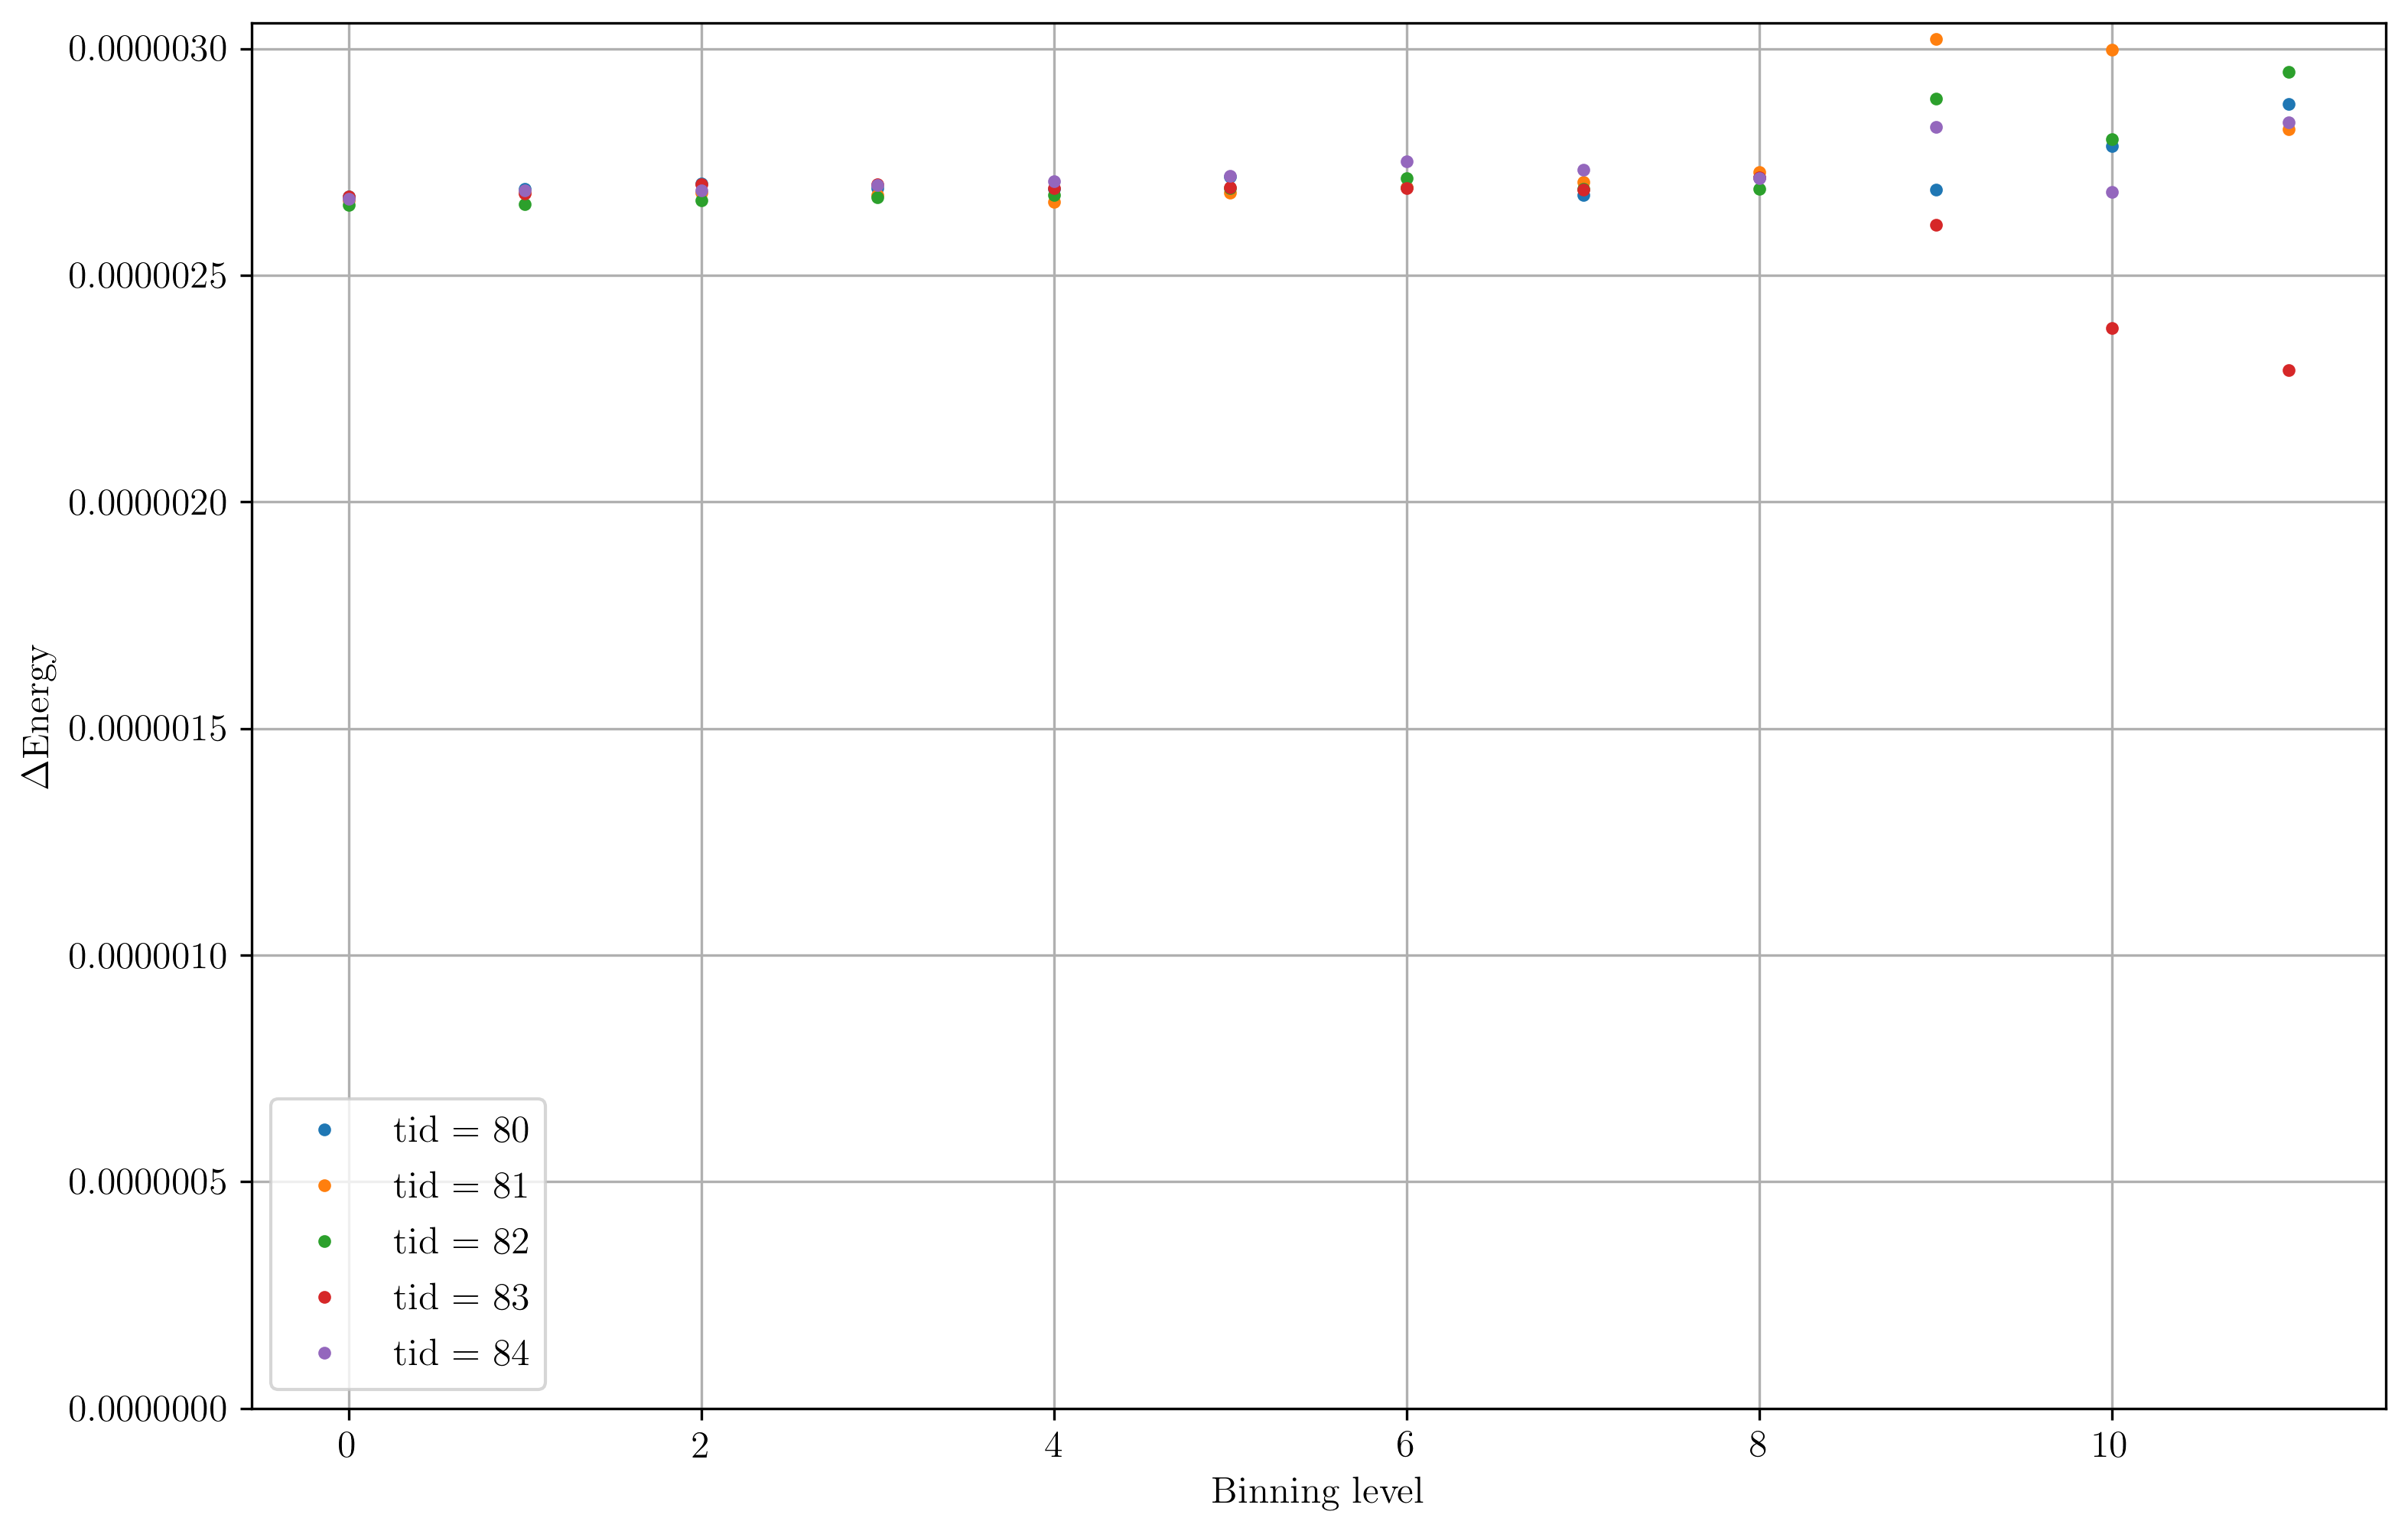

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


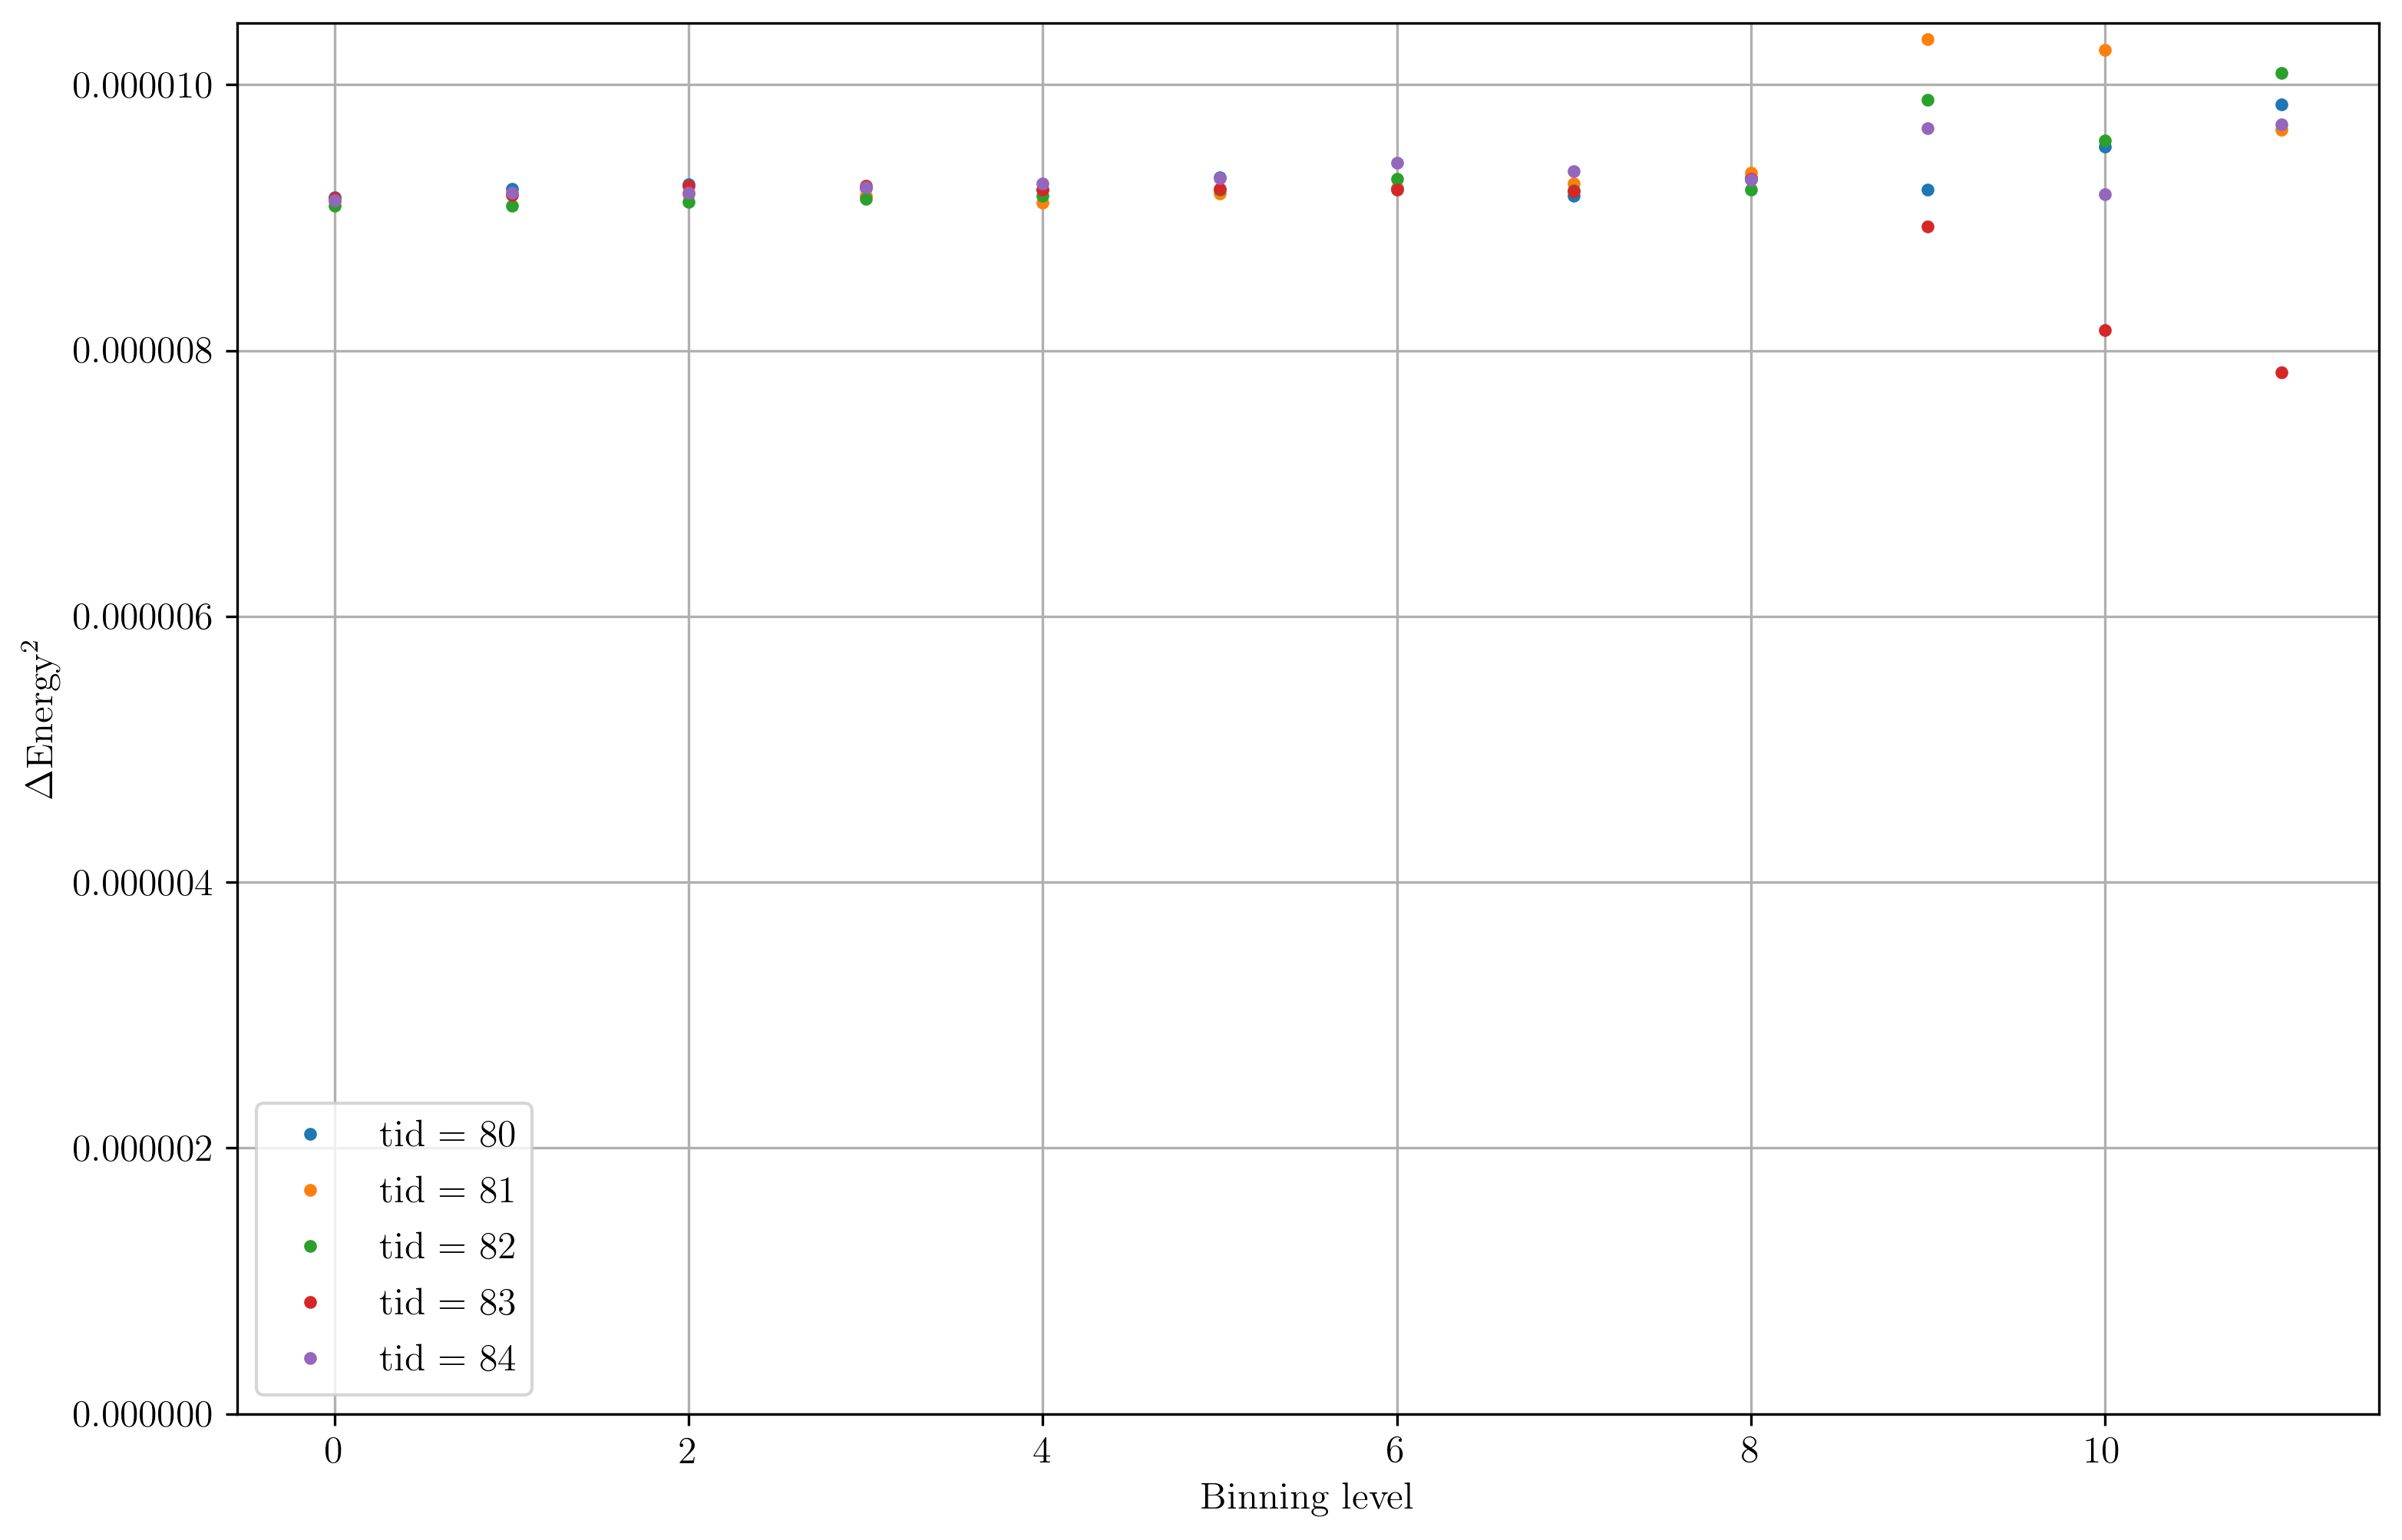

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 4.356648E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


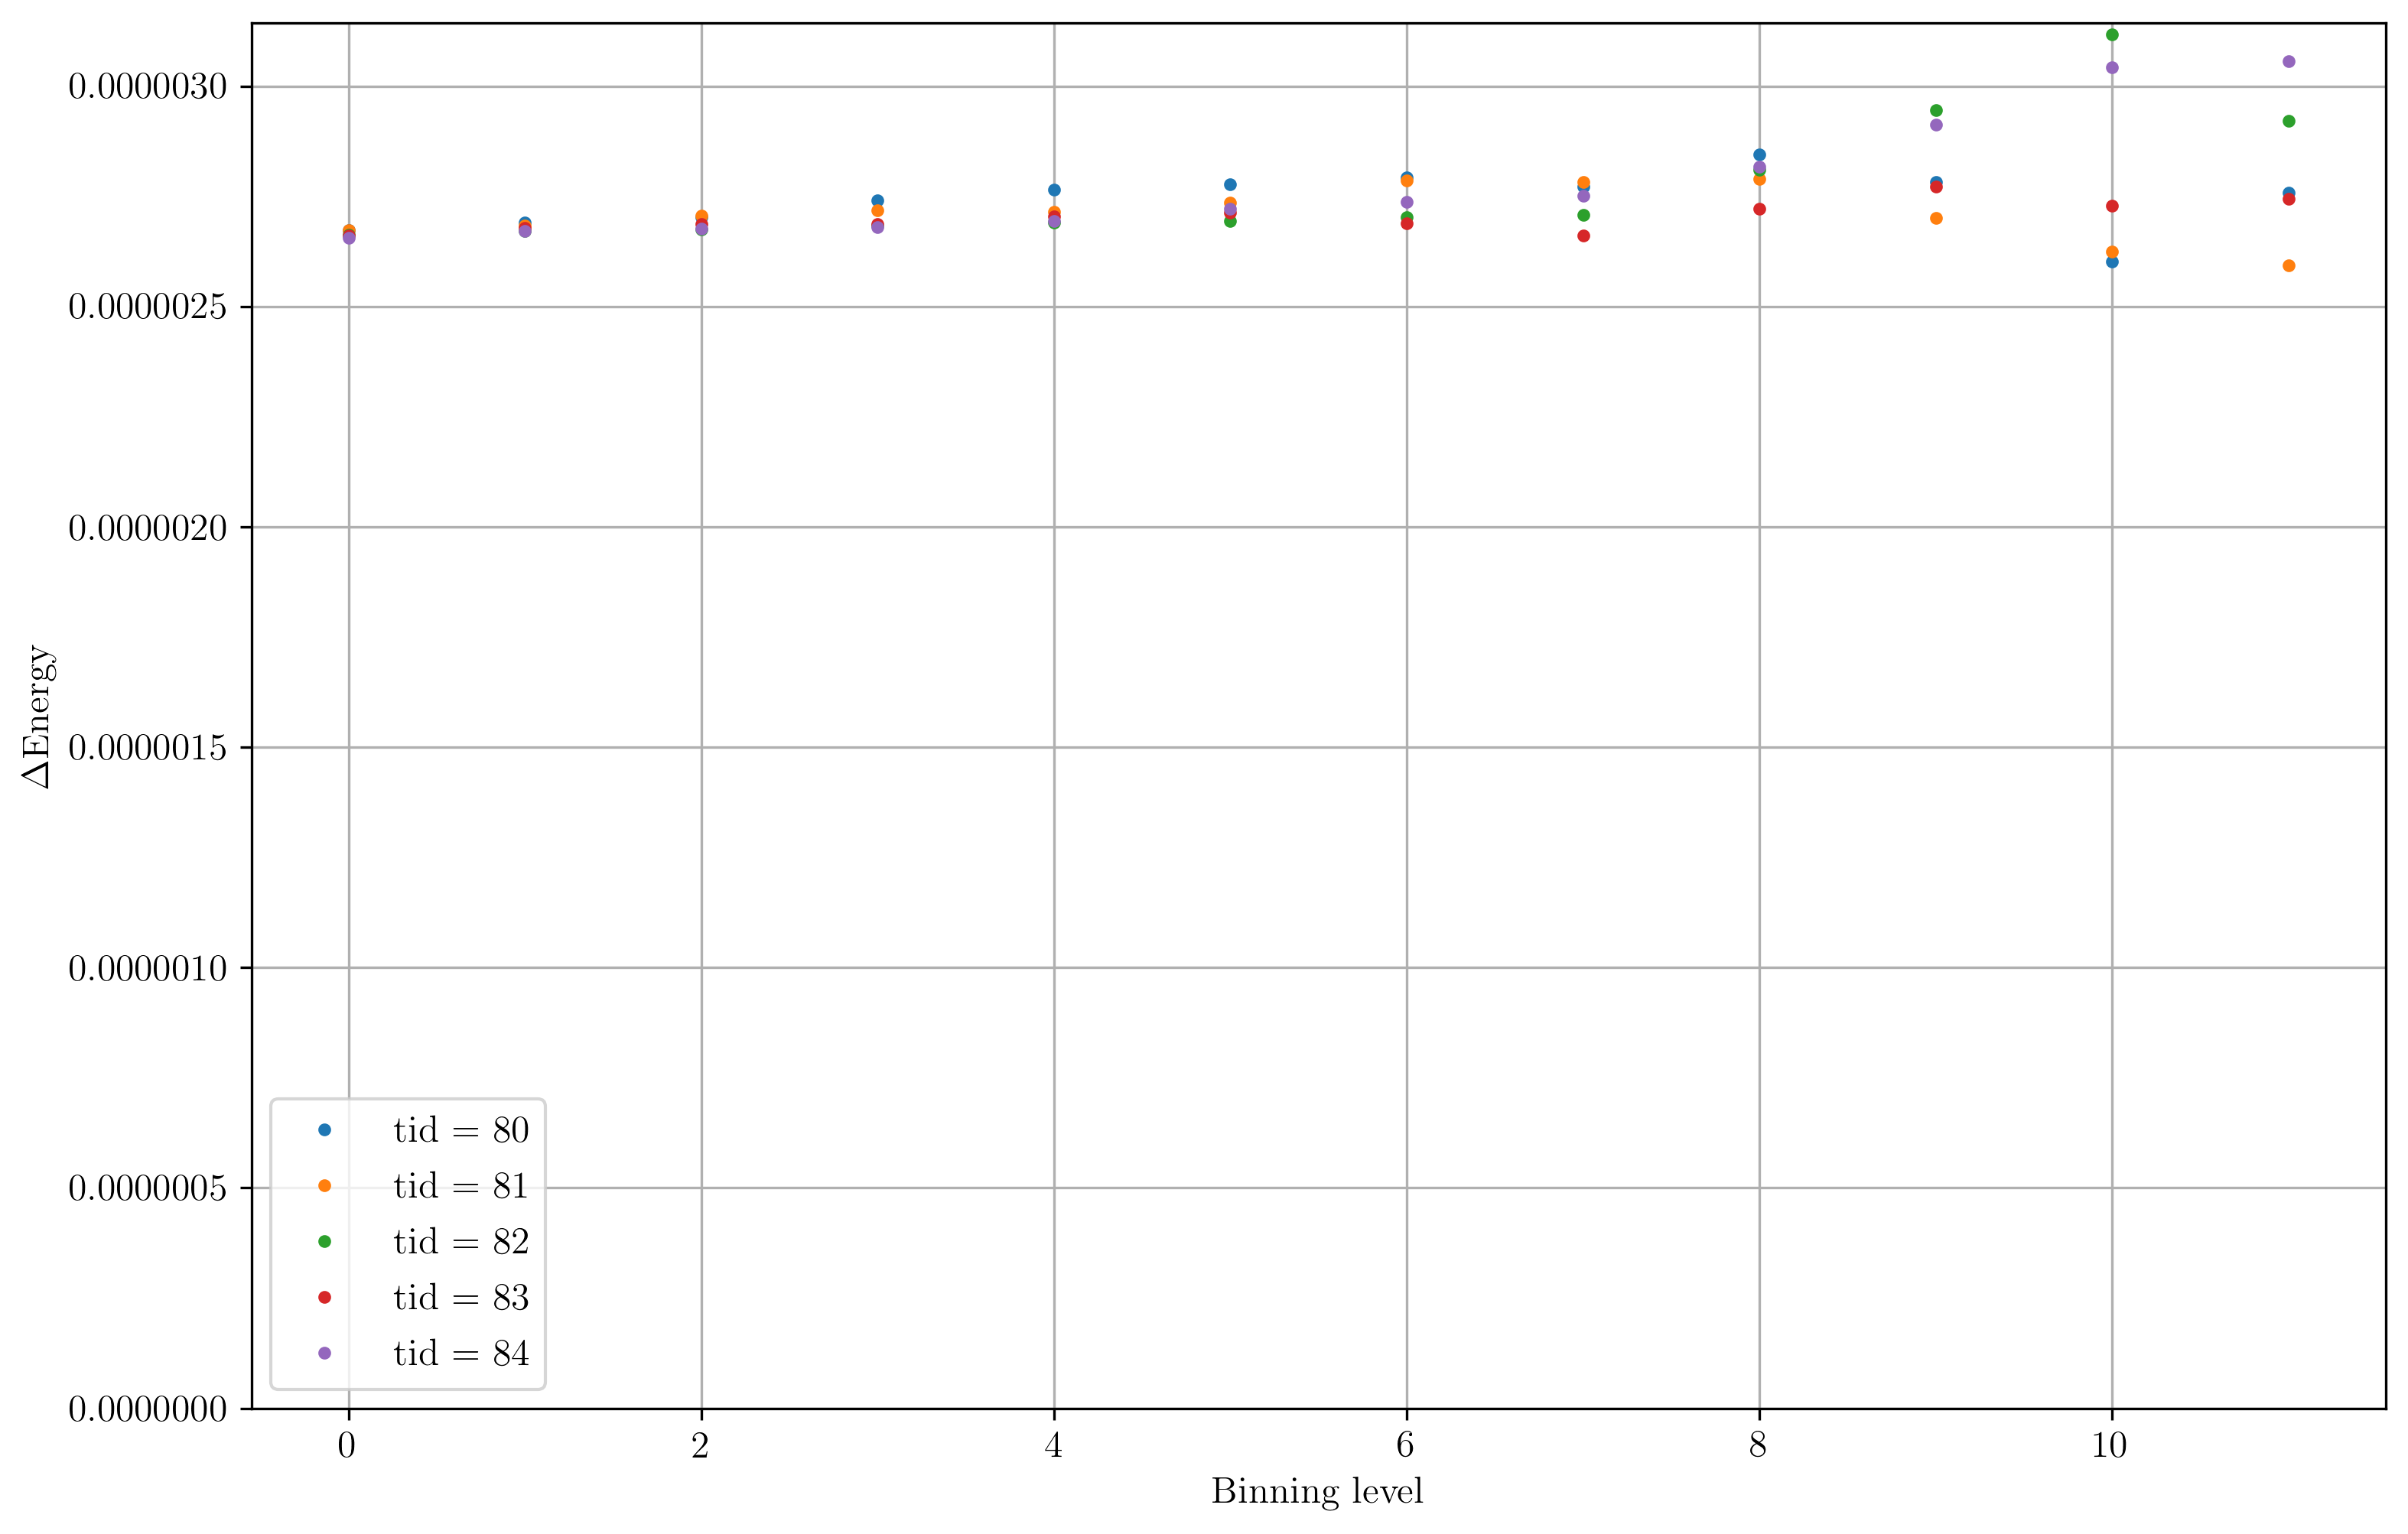

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


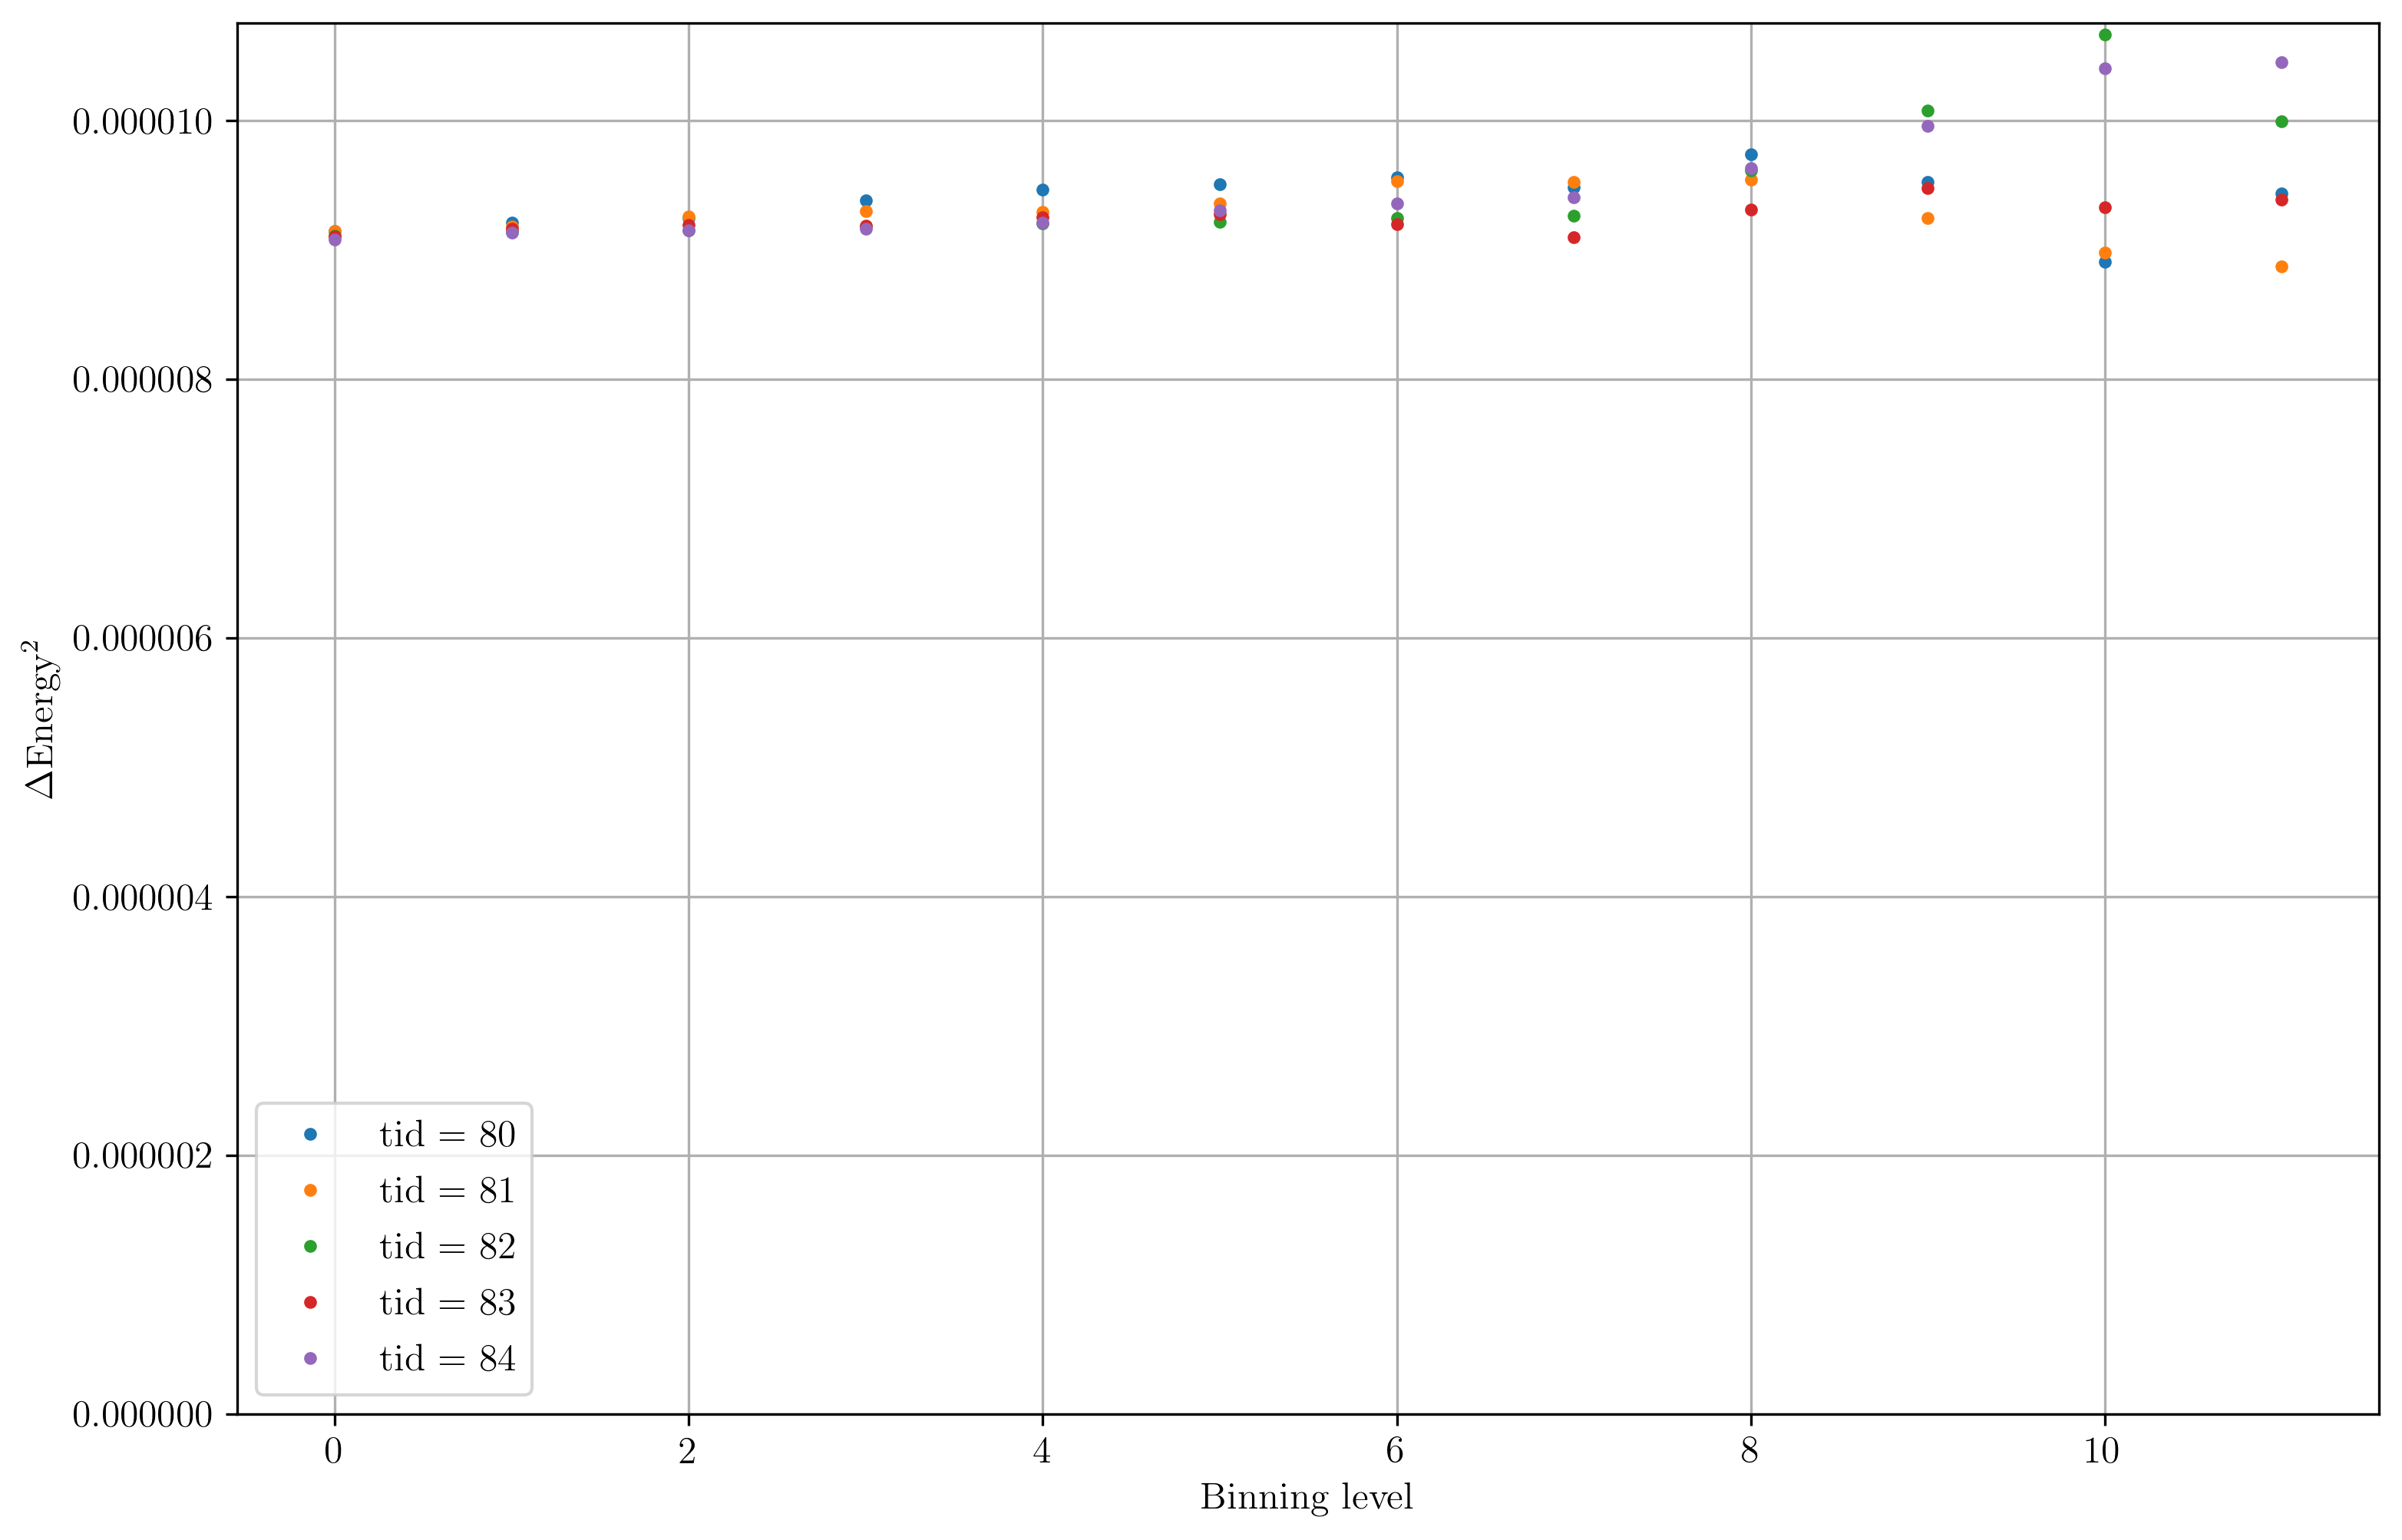

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 4.759893E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


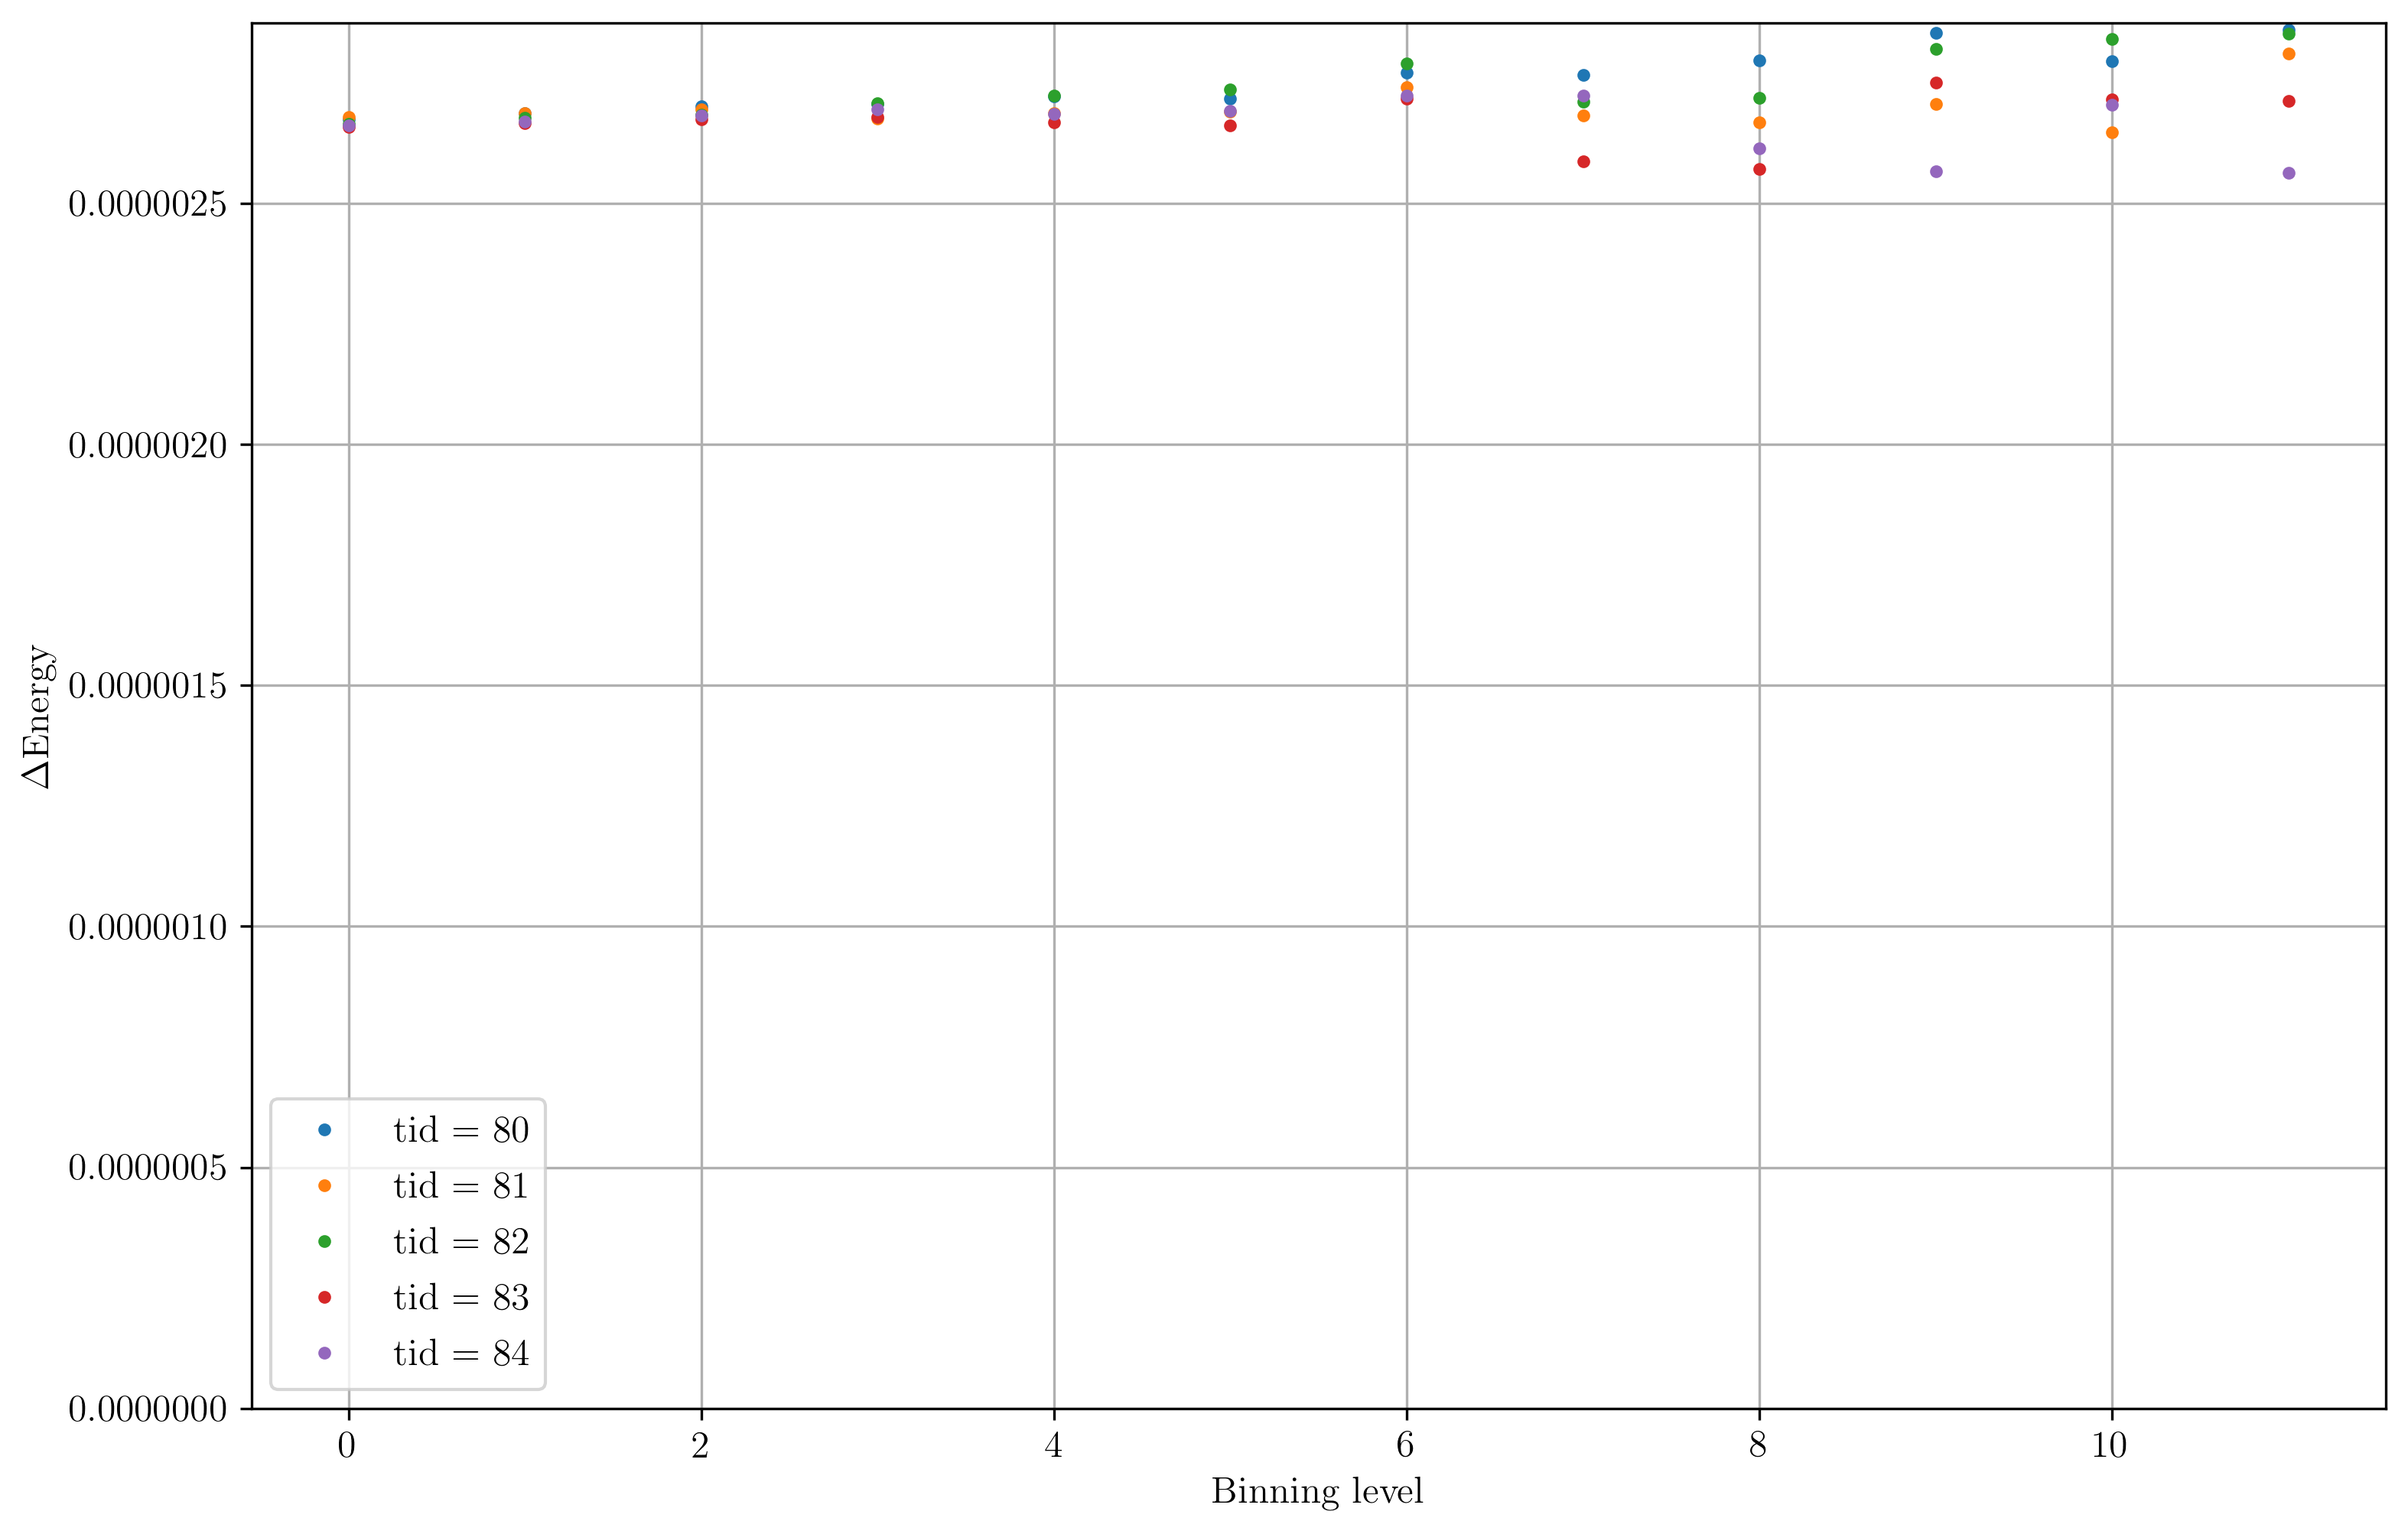

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


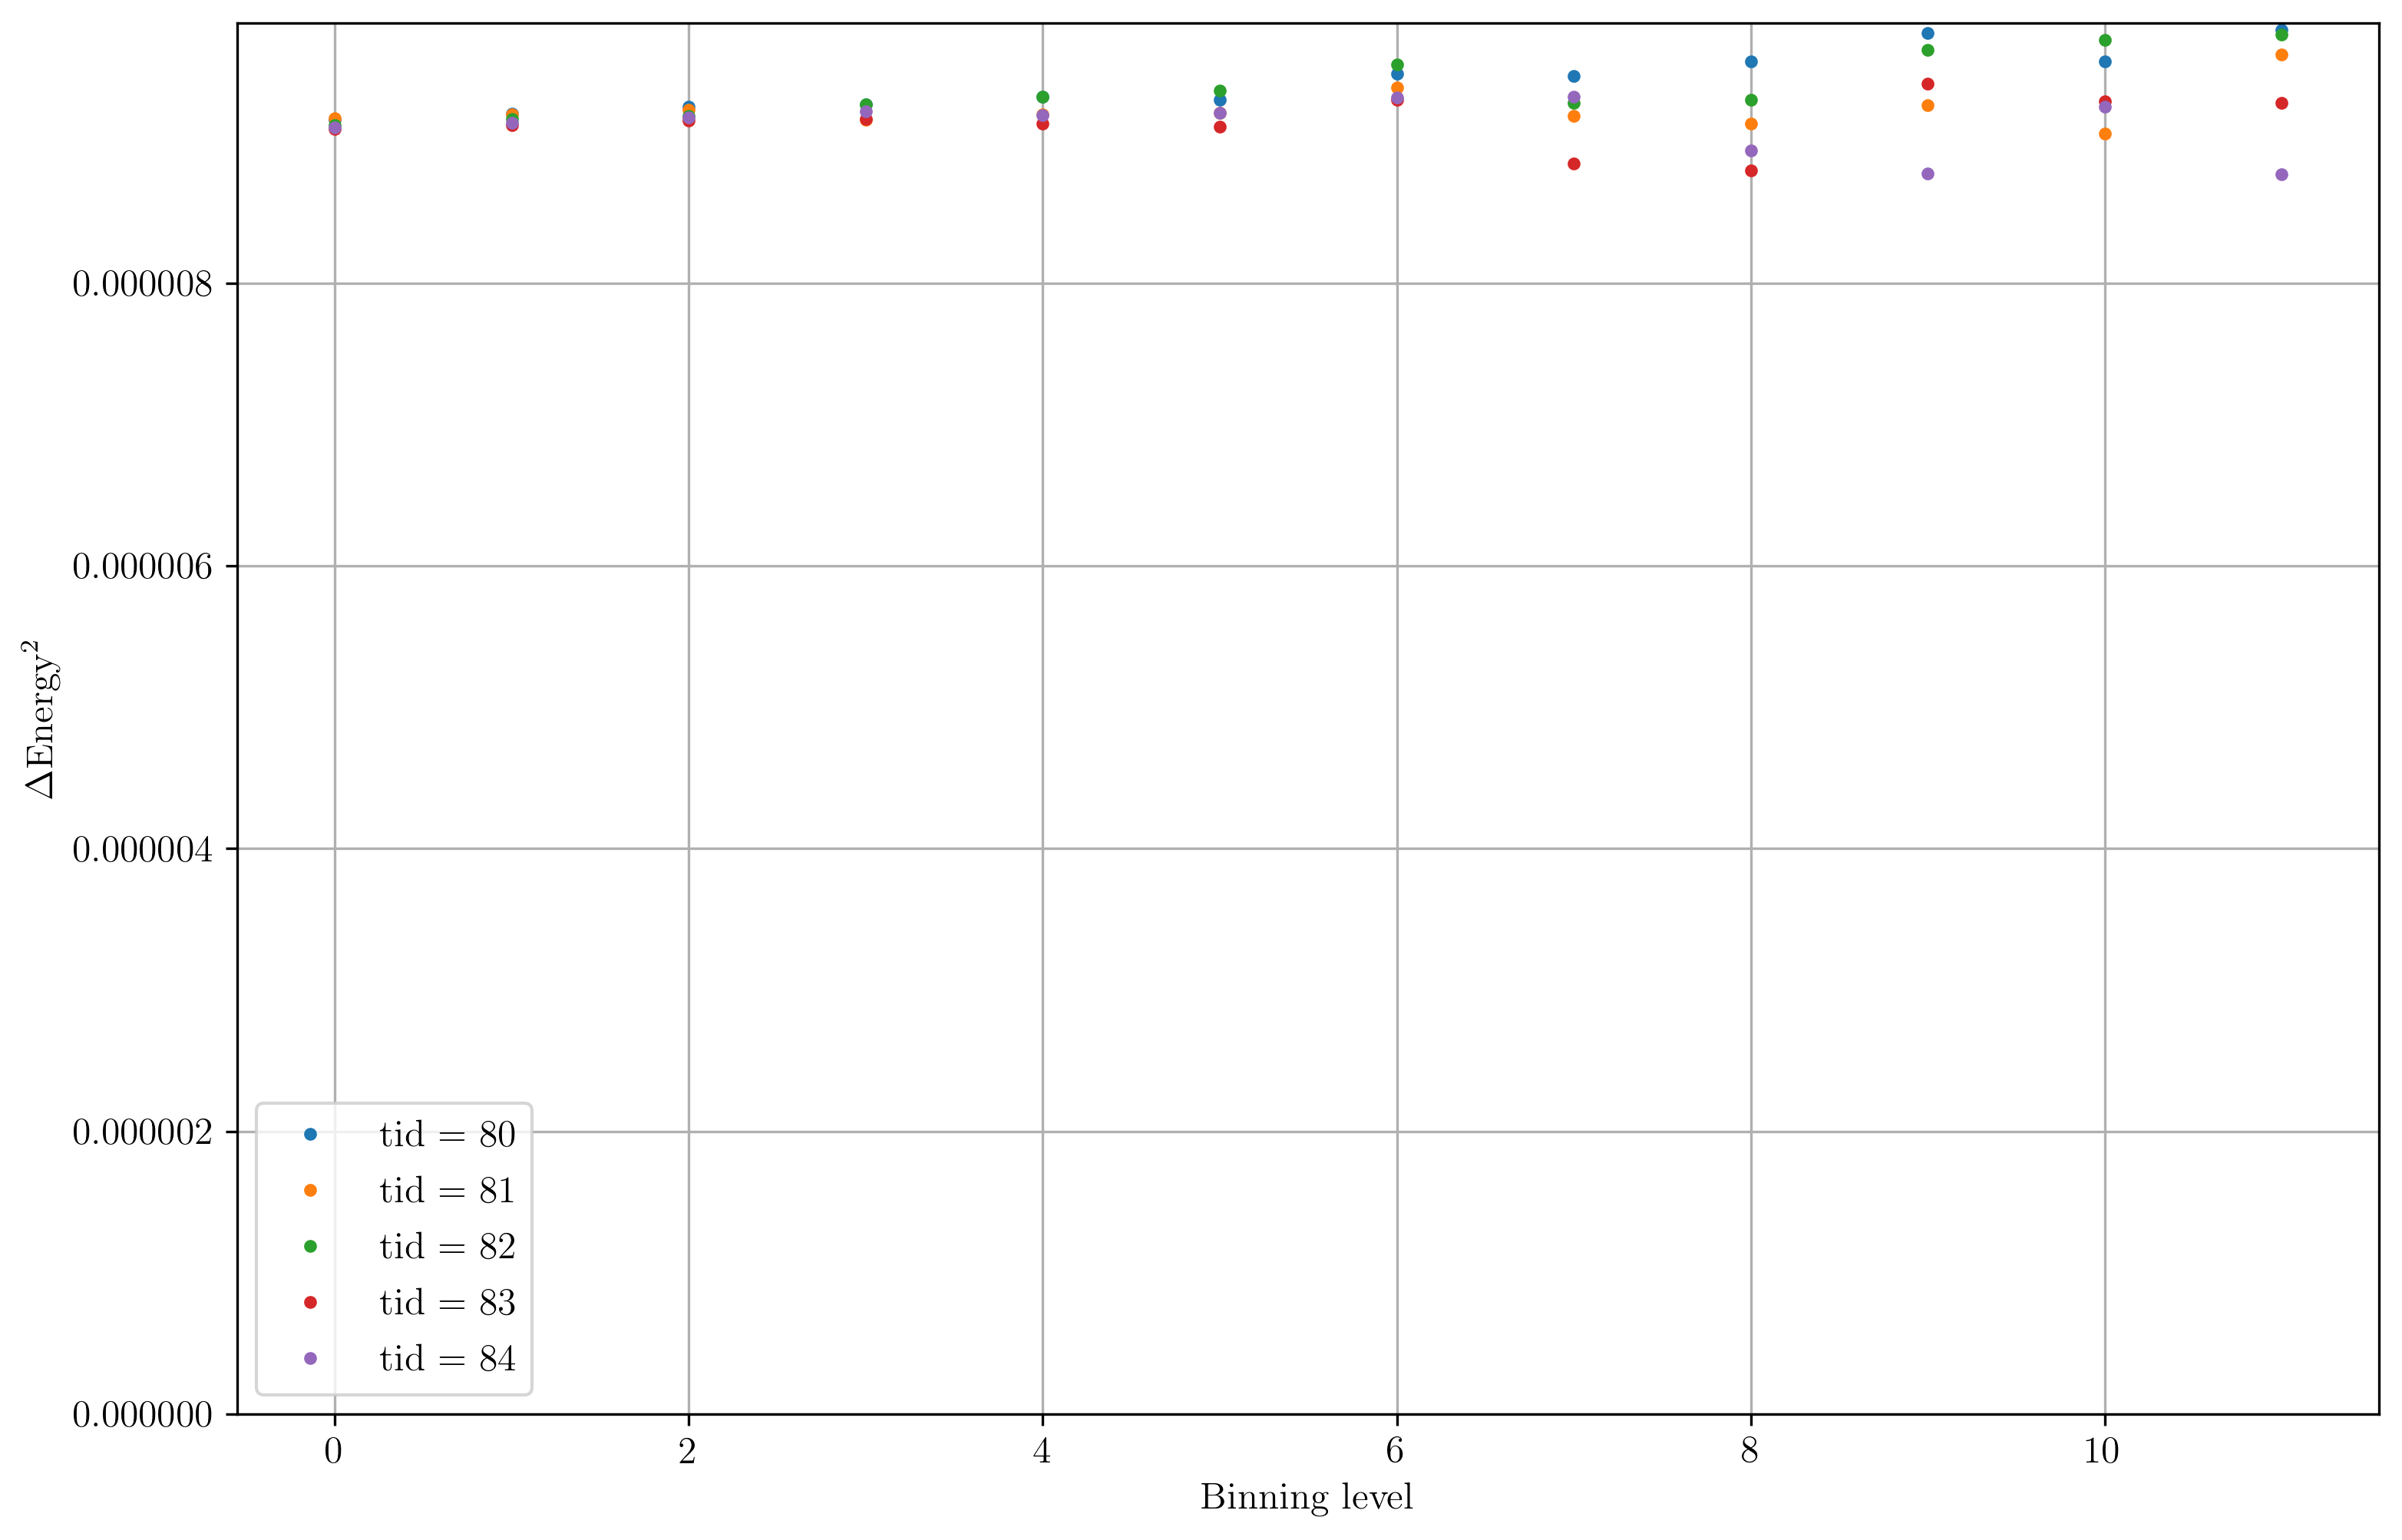

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 4.848270E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


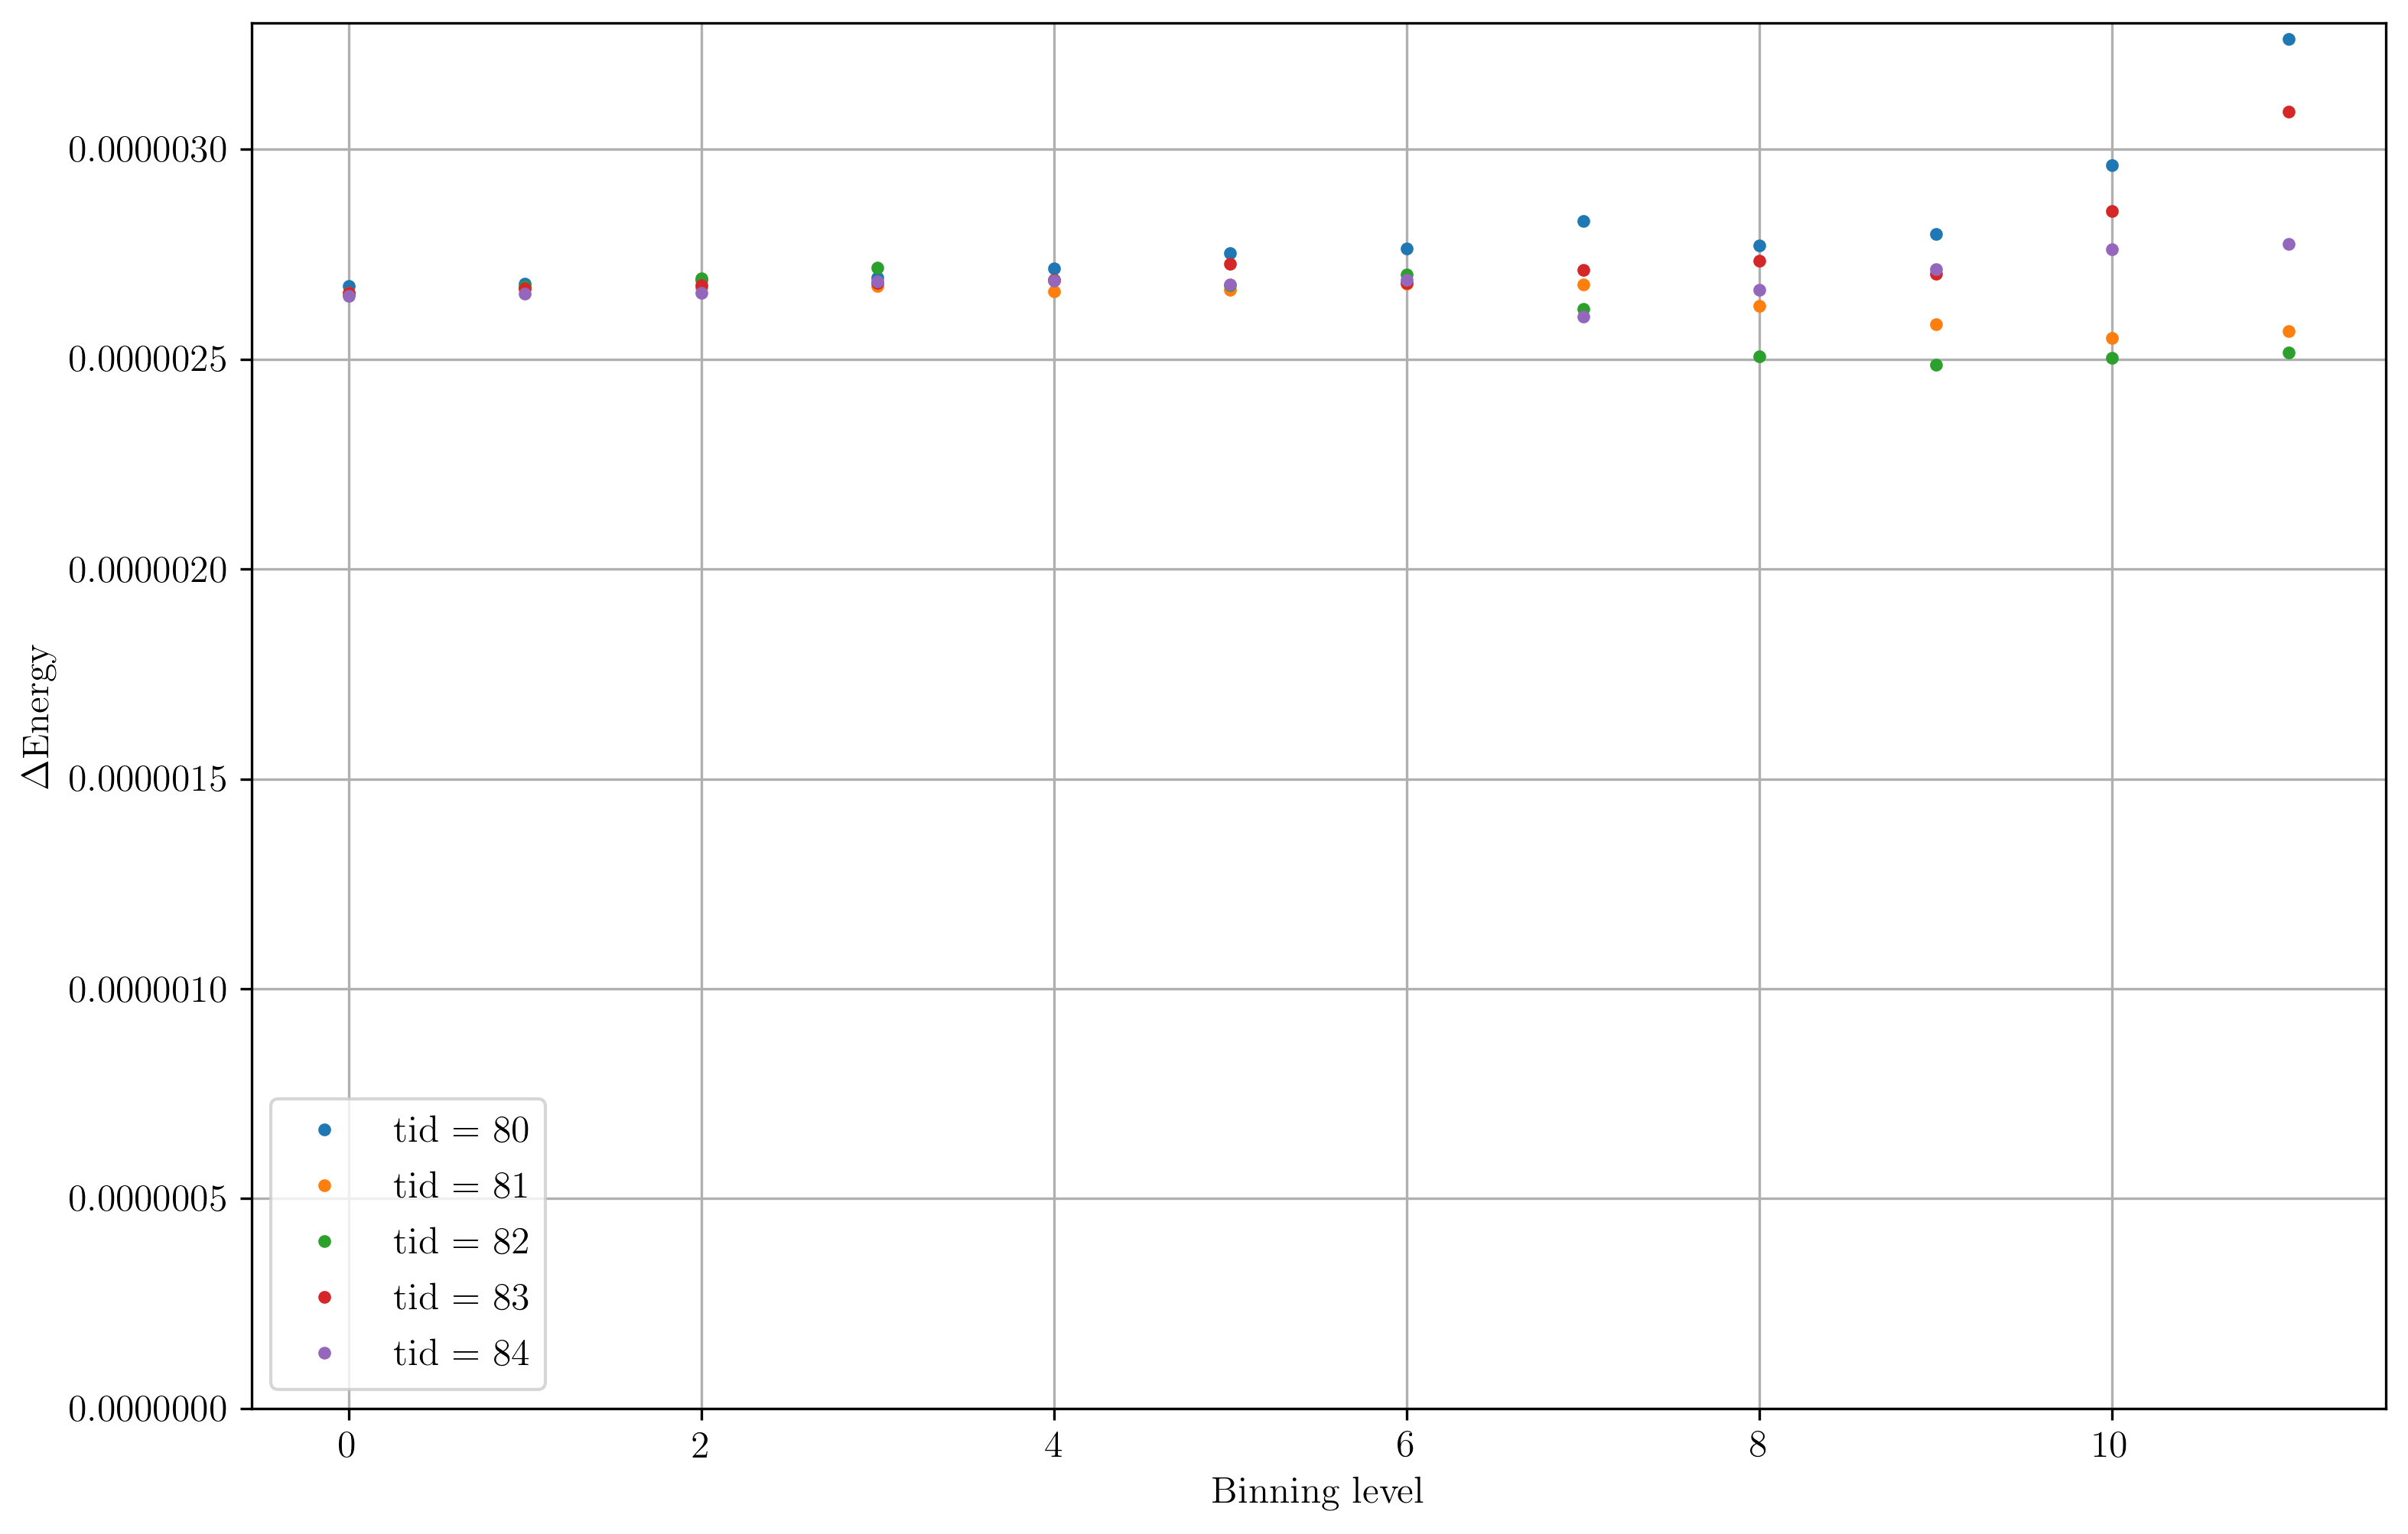

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


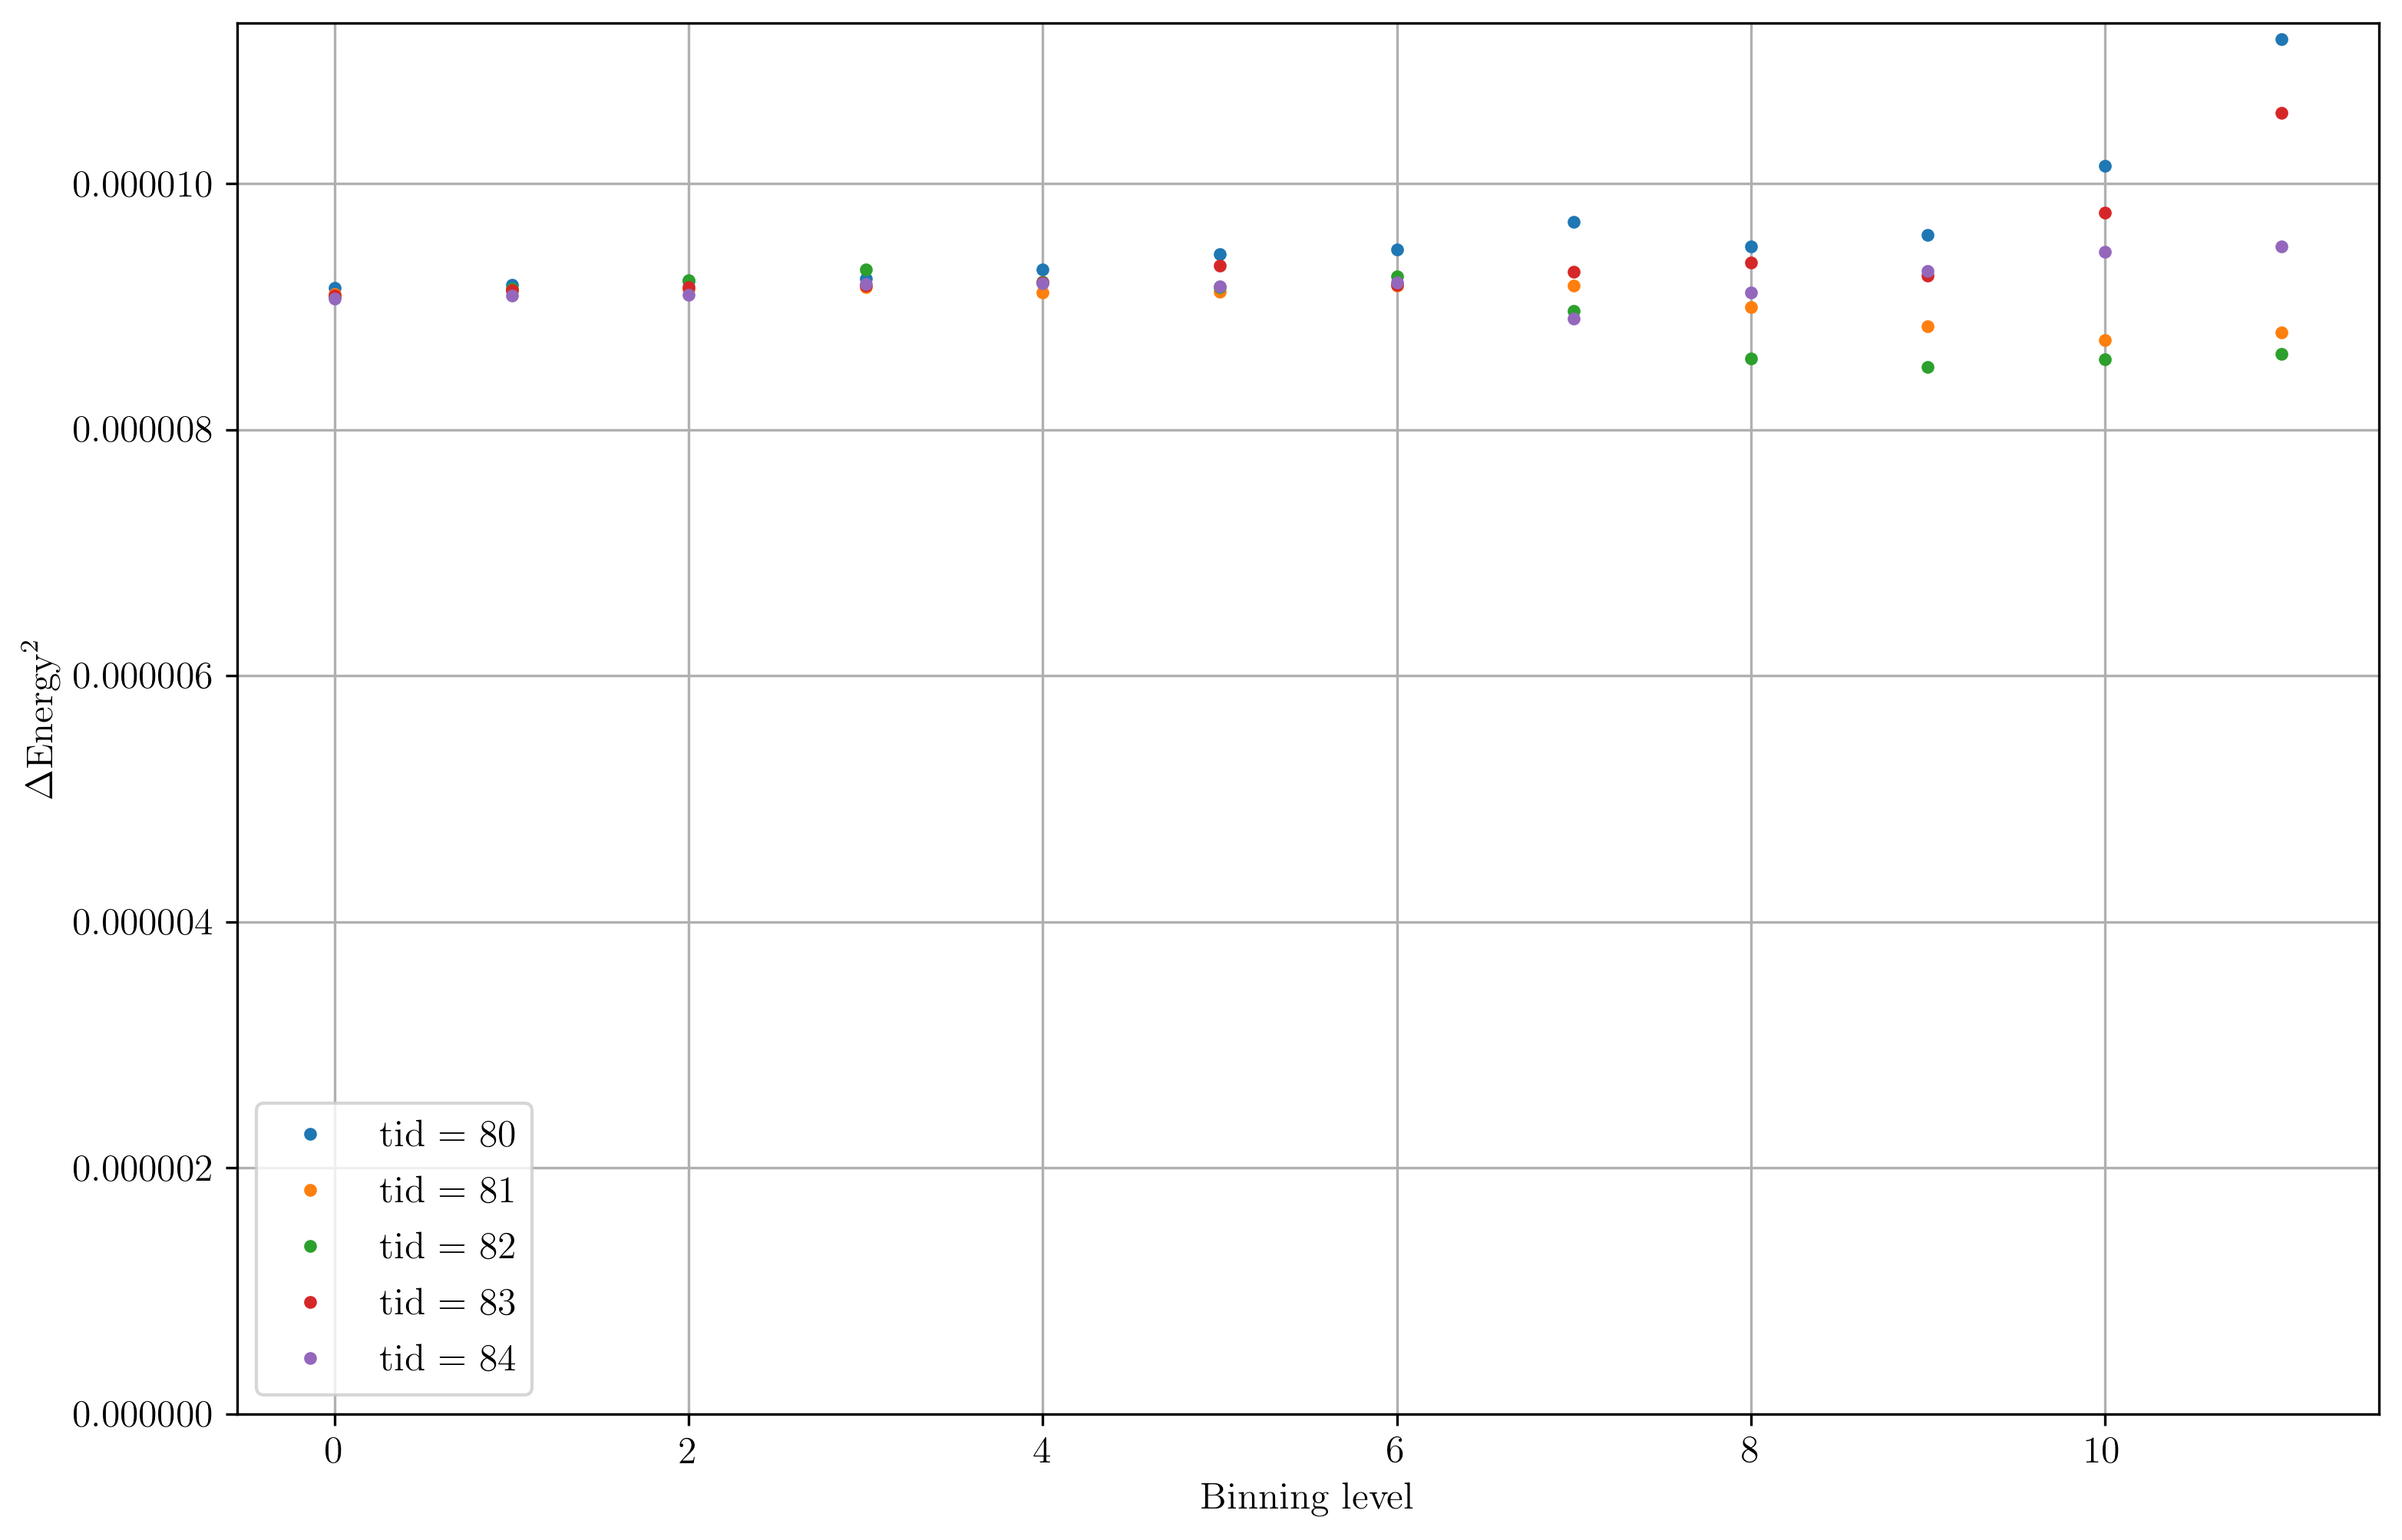

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 3.118045E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


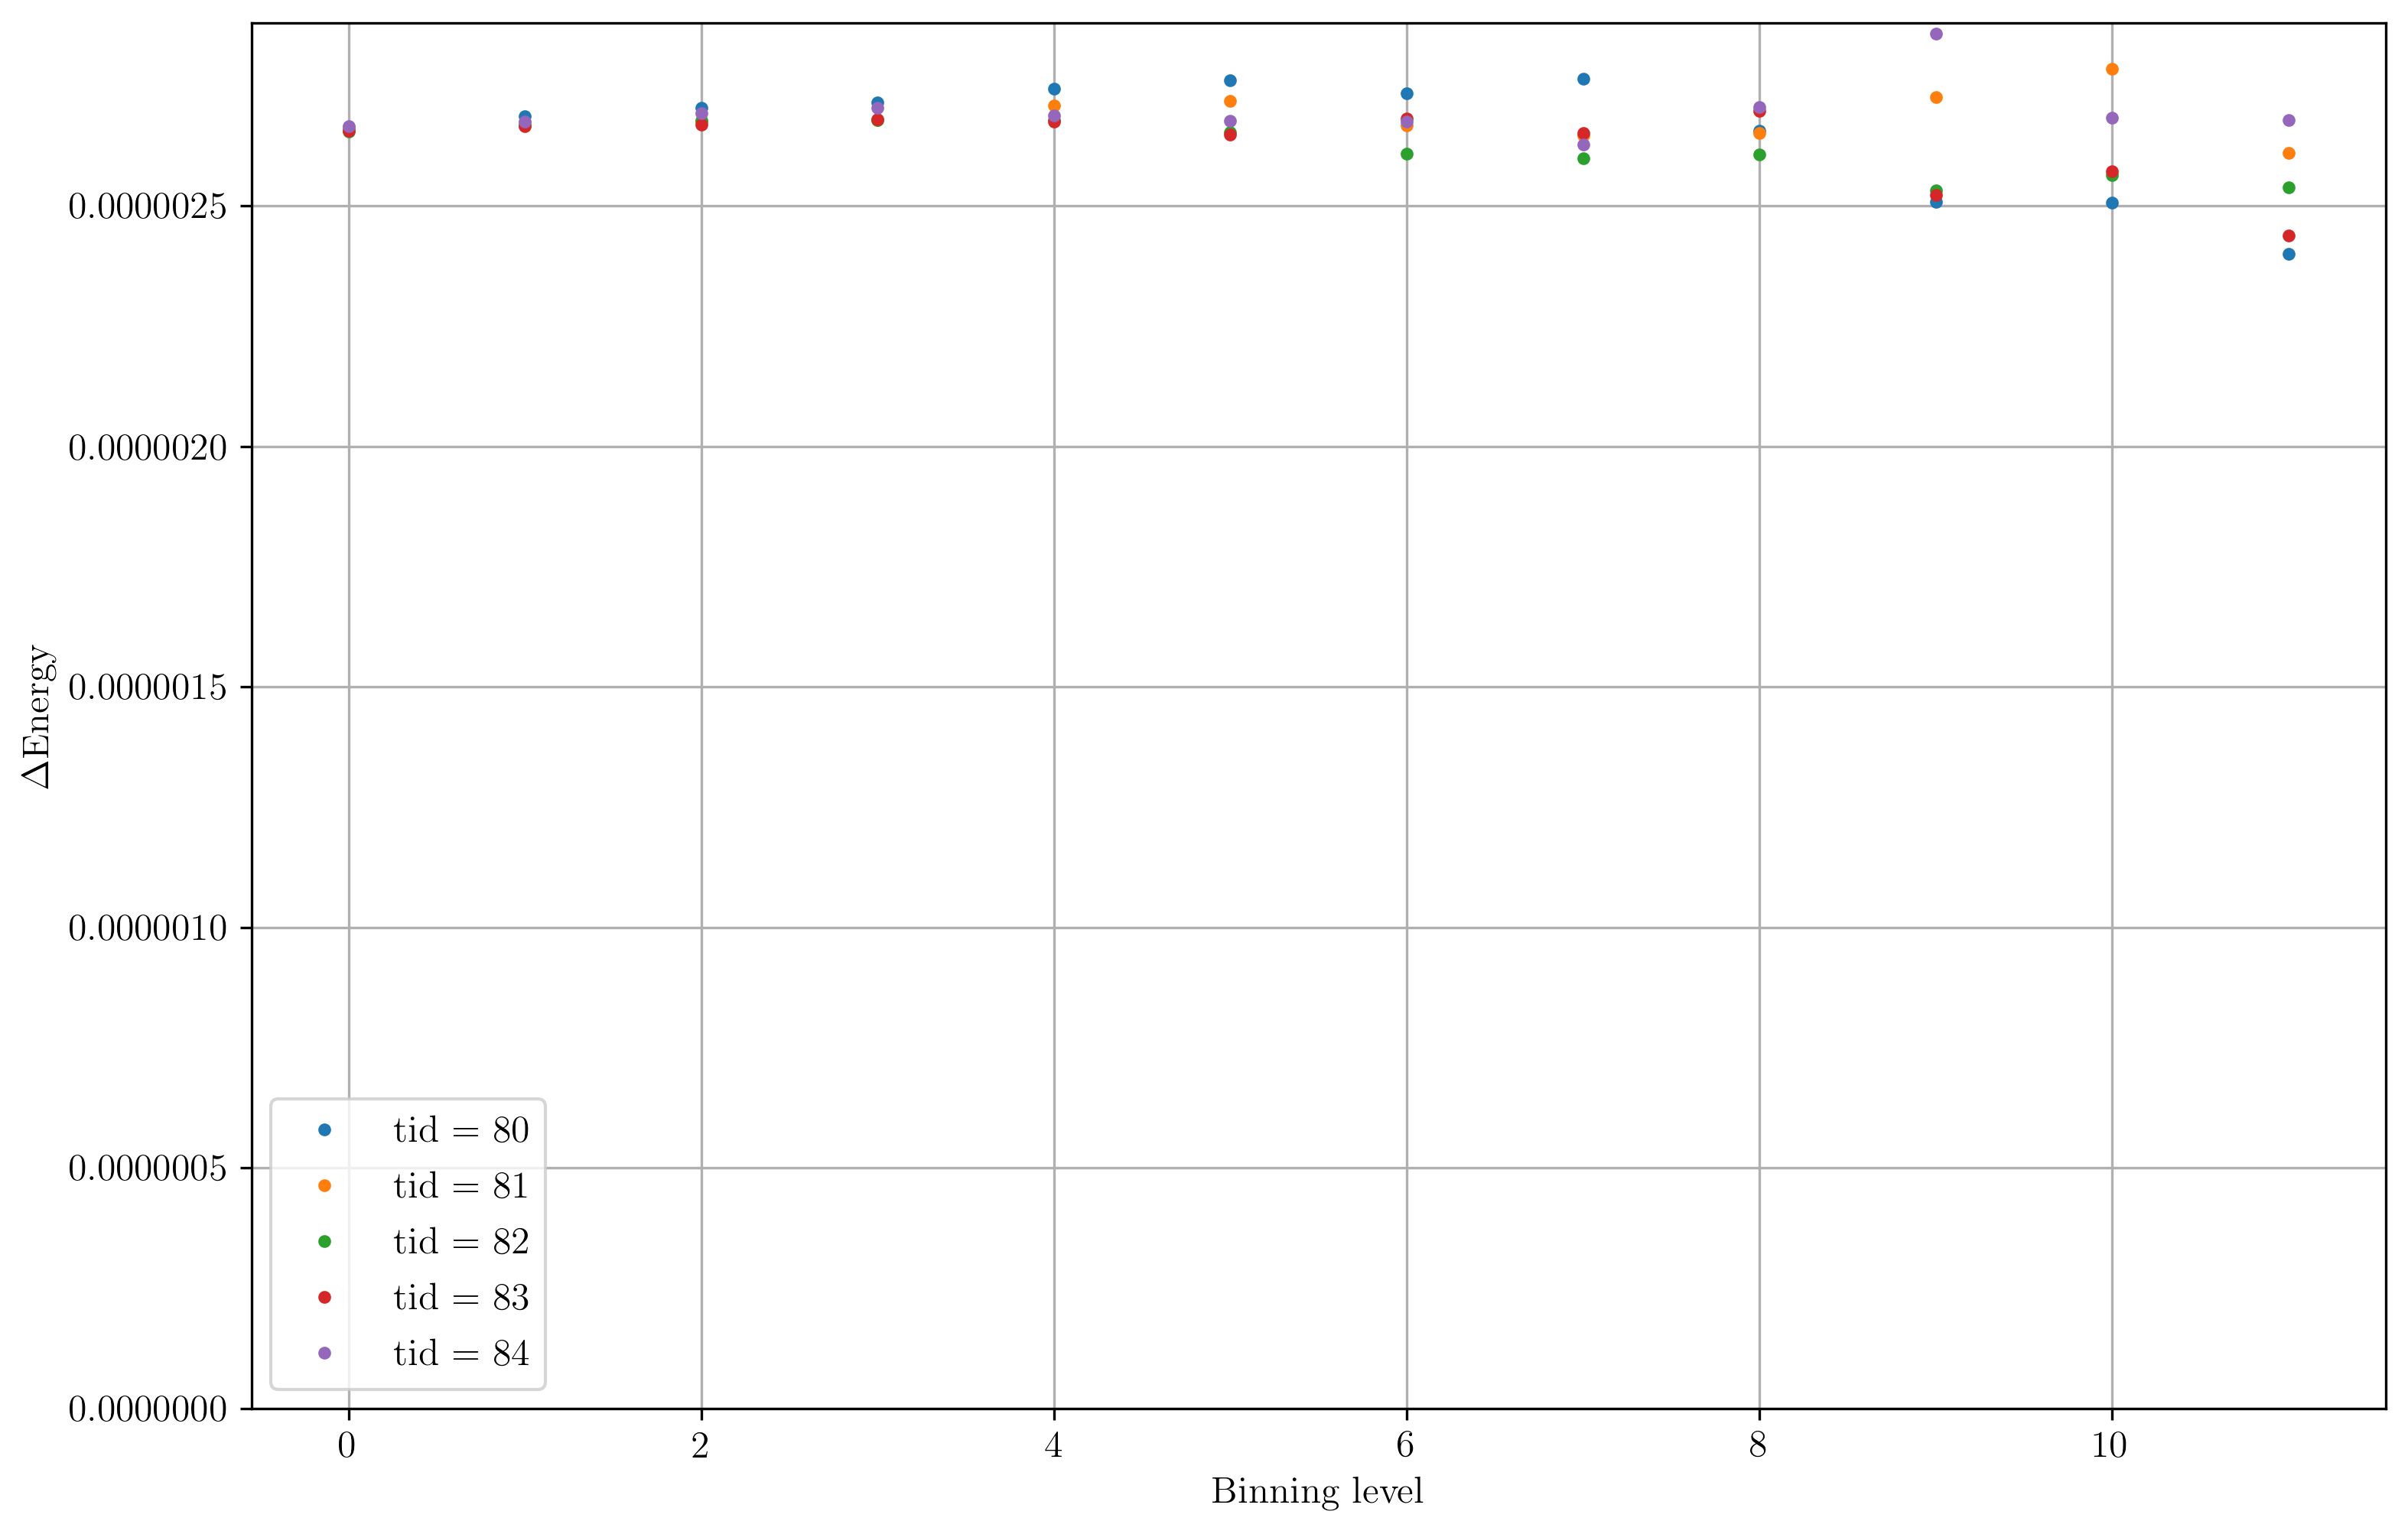

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


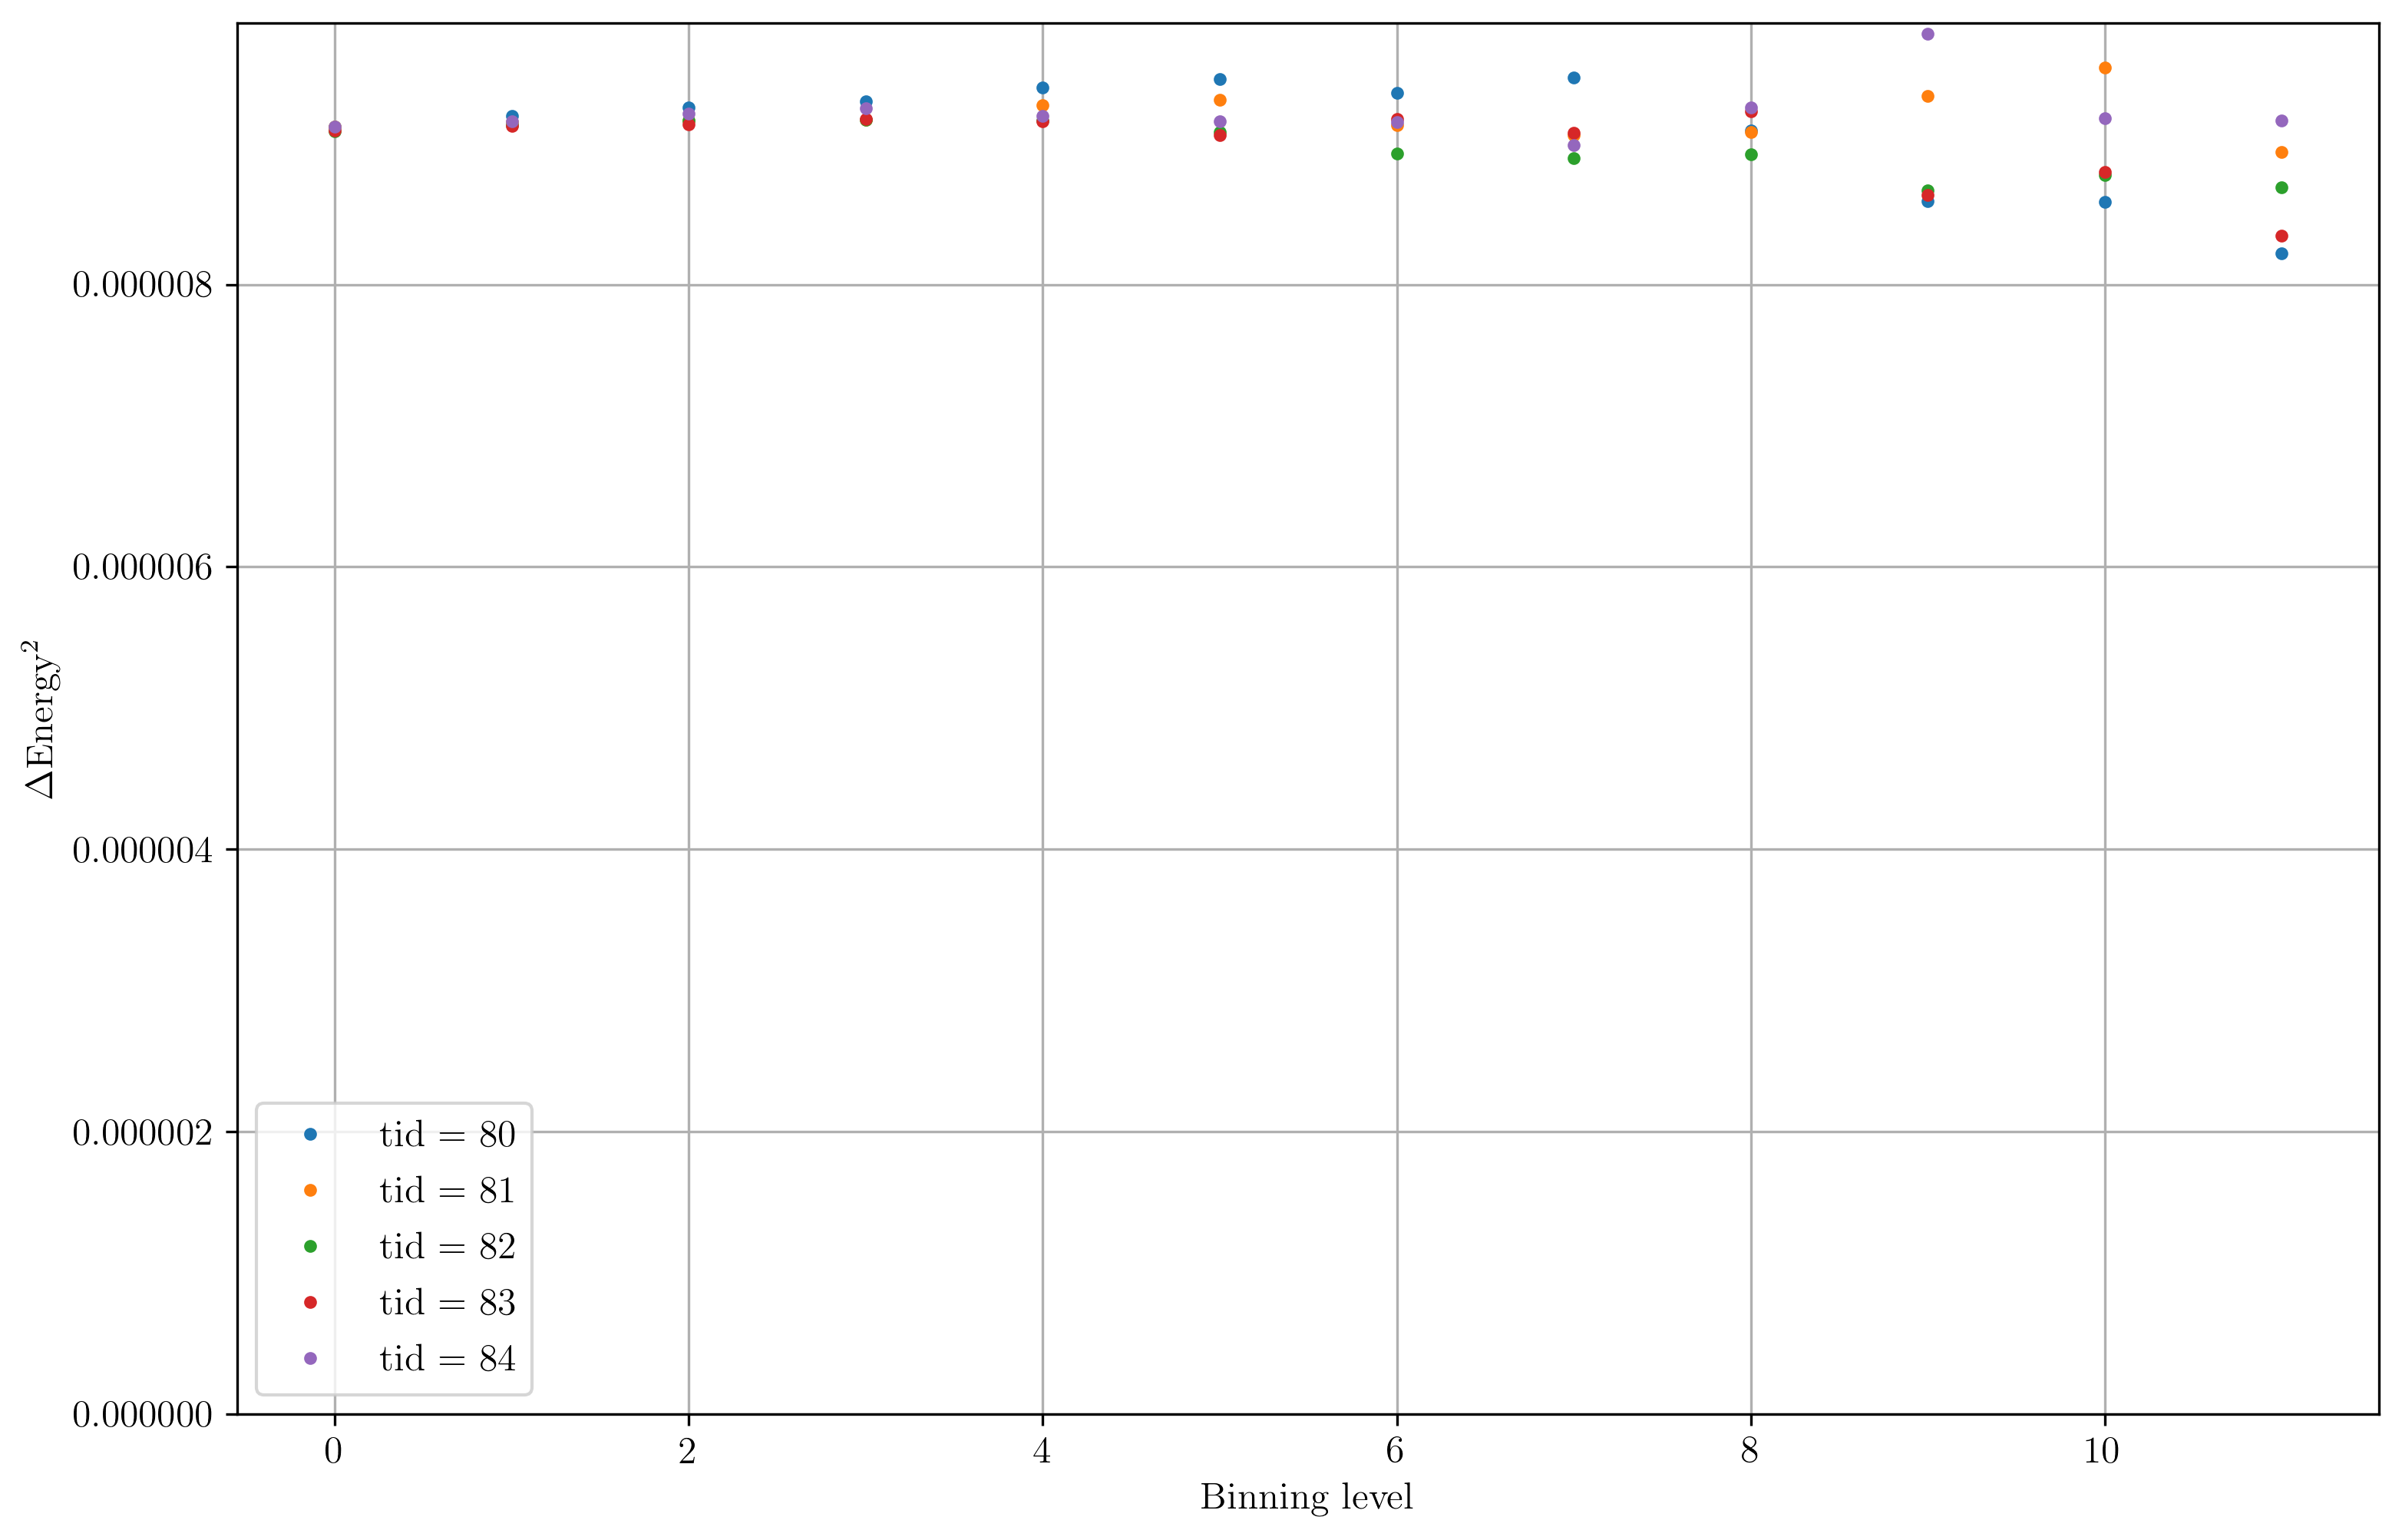

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.978067E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


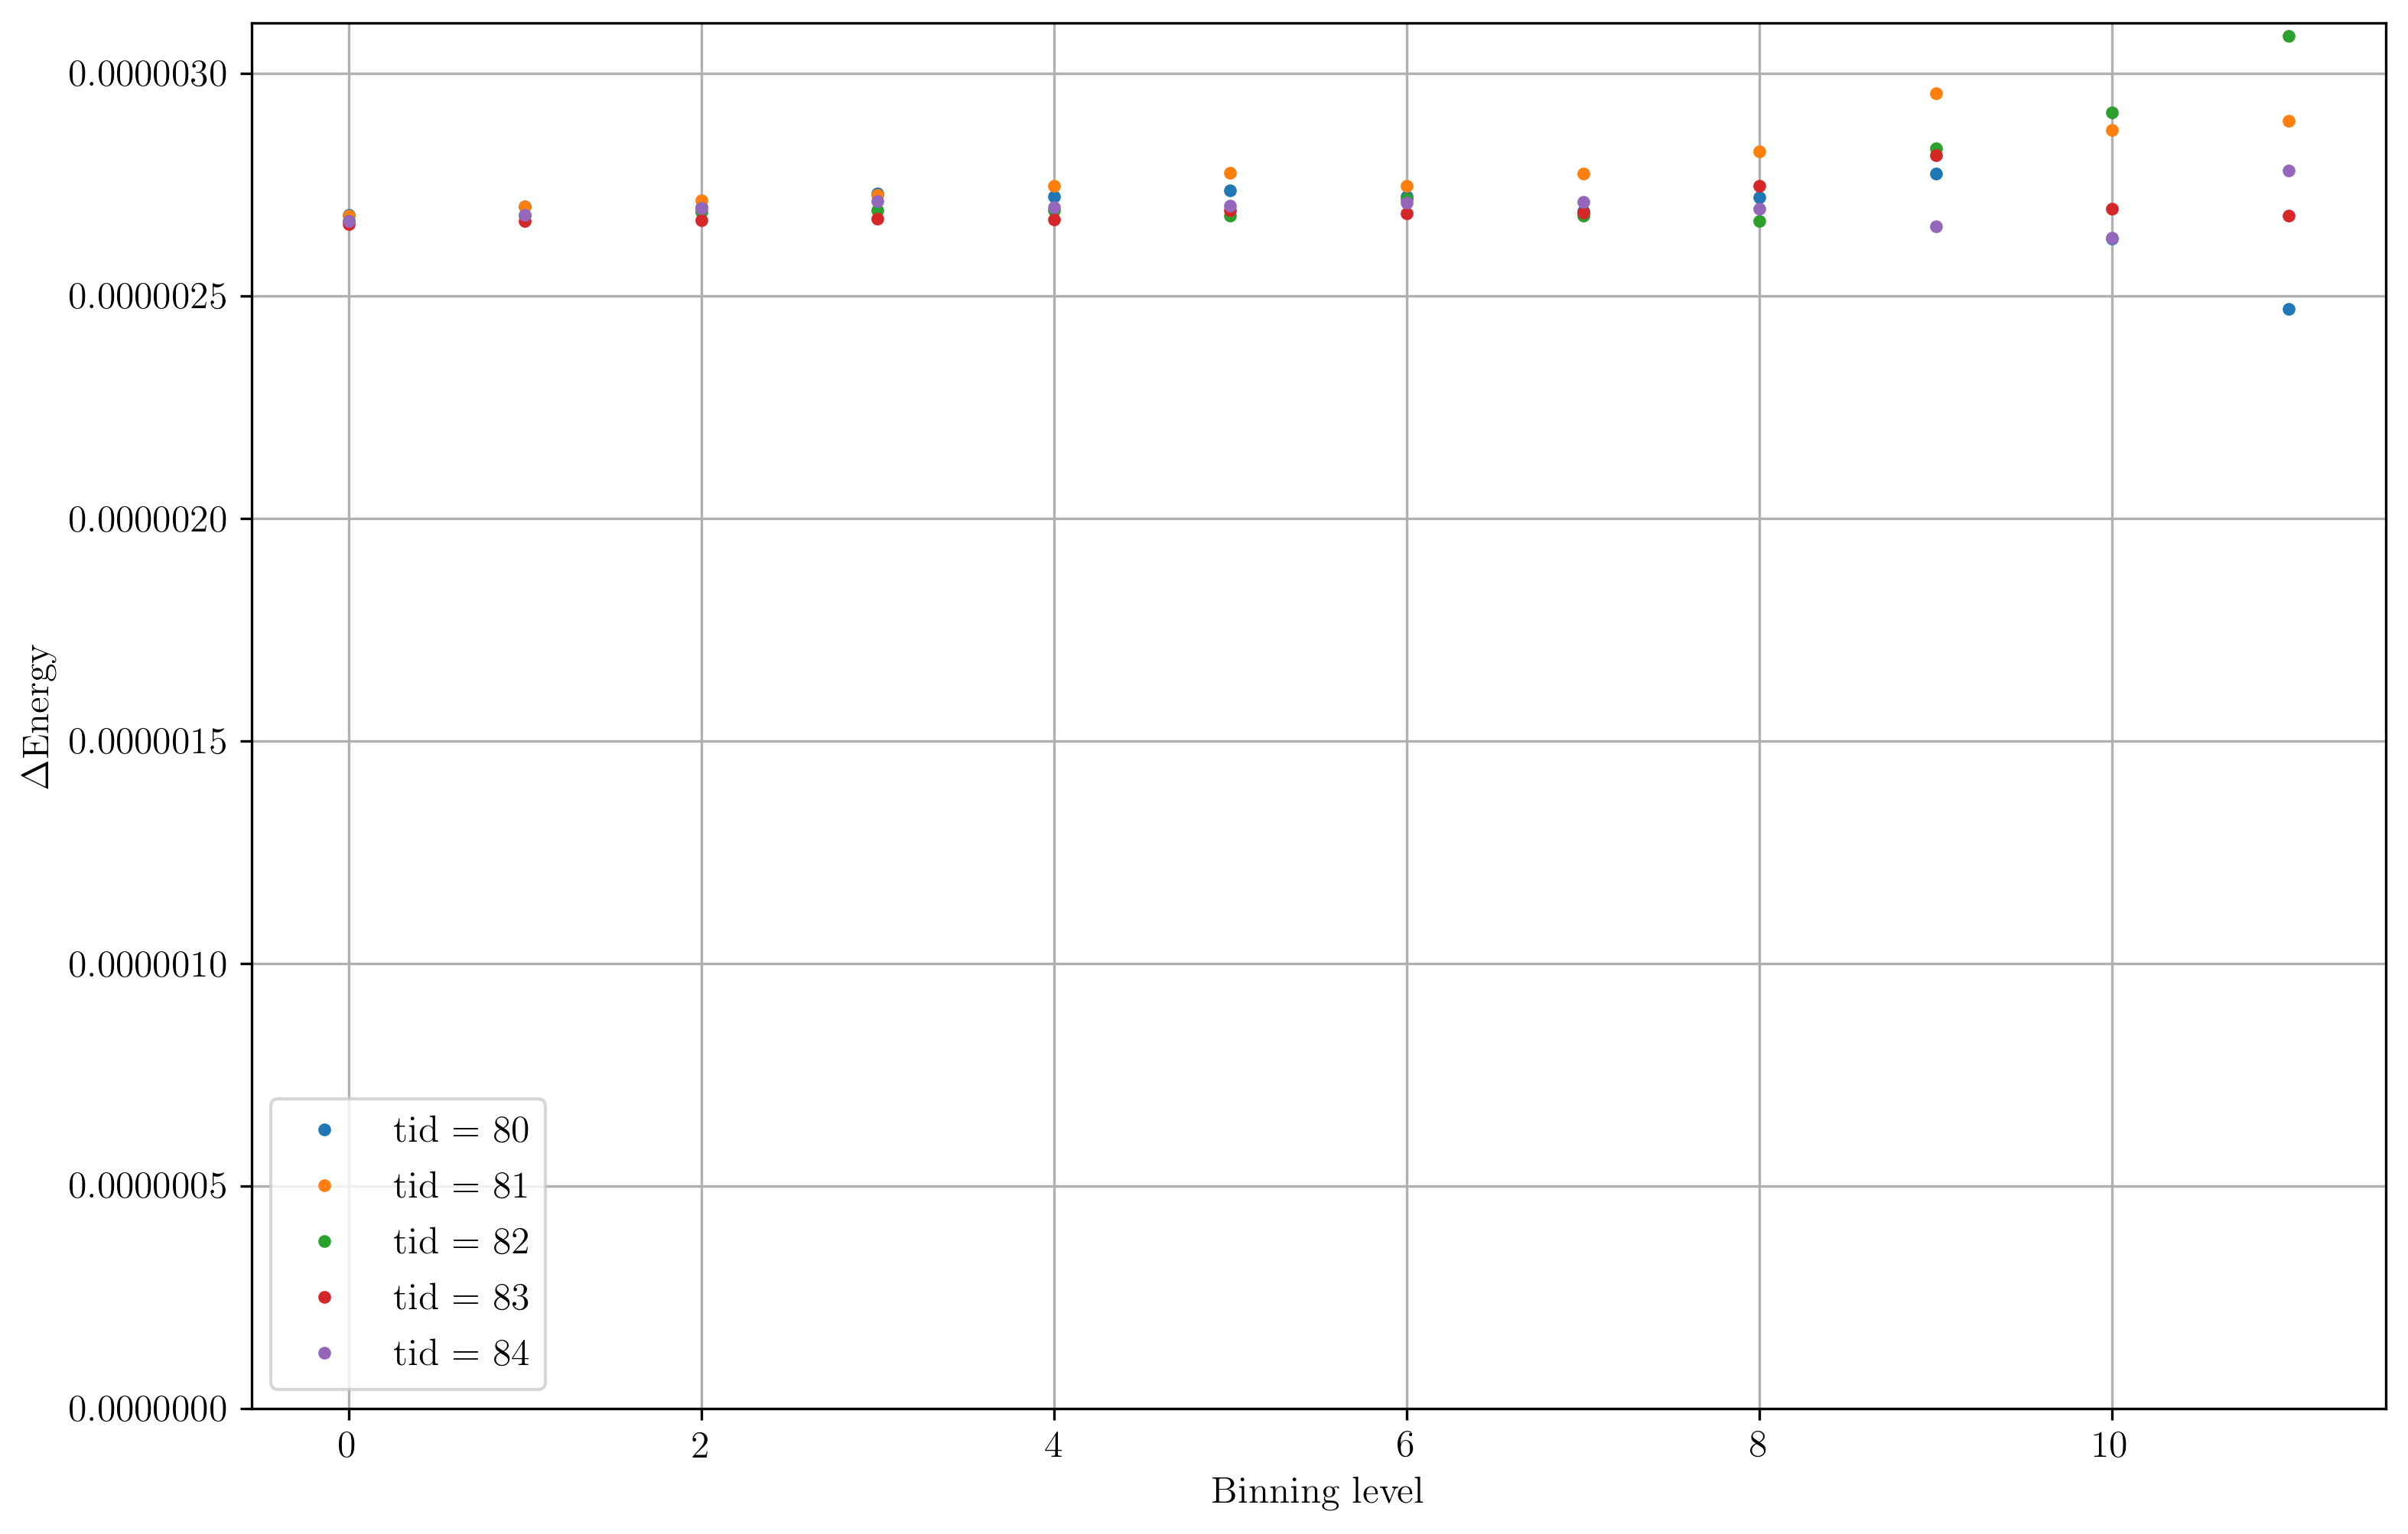

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


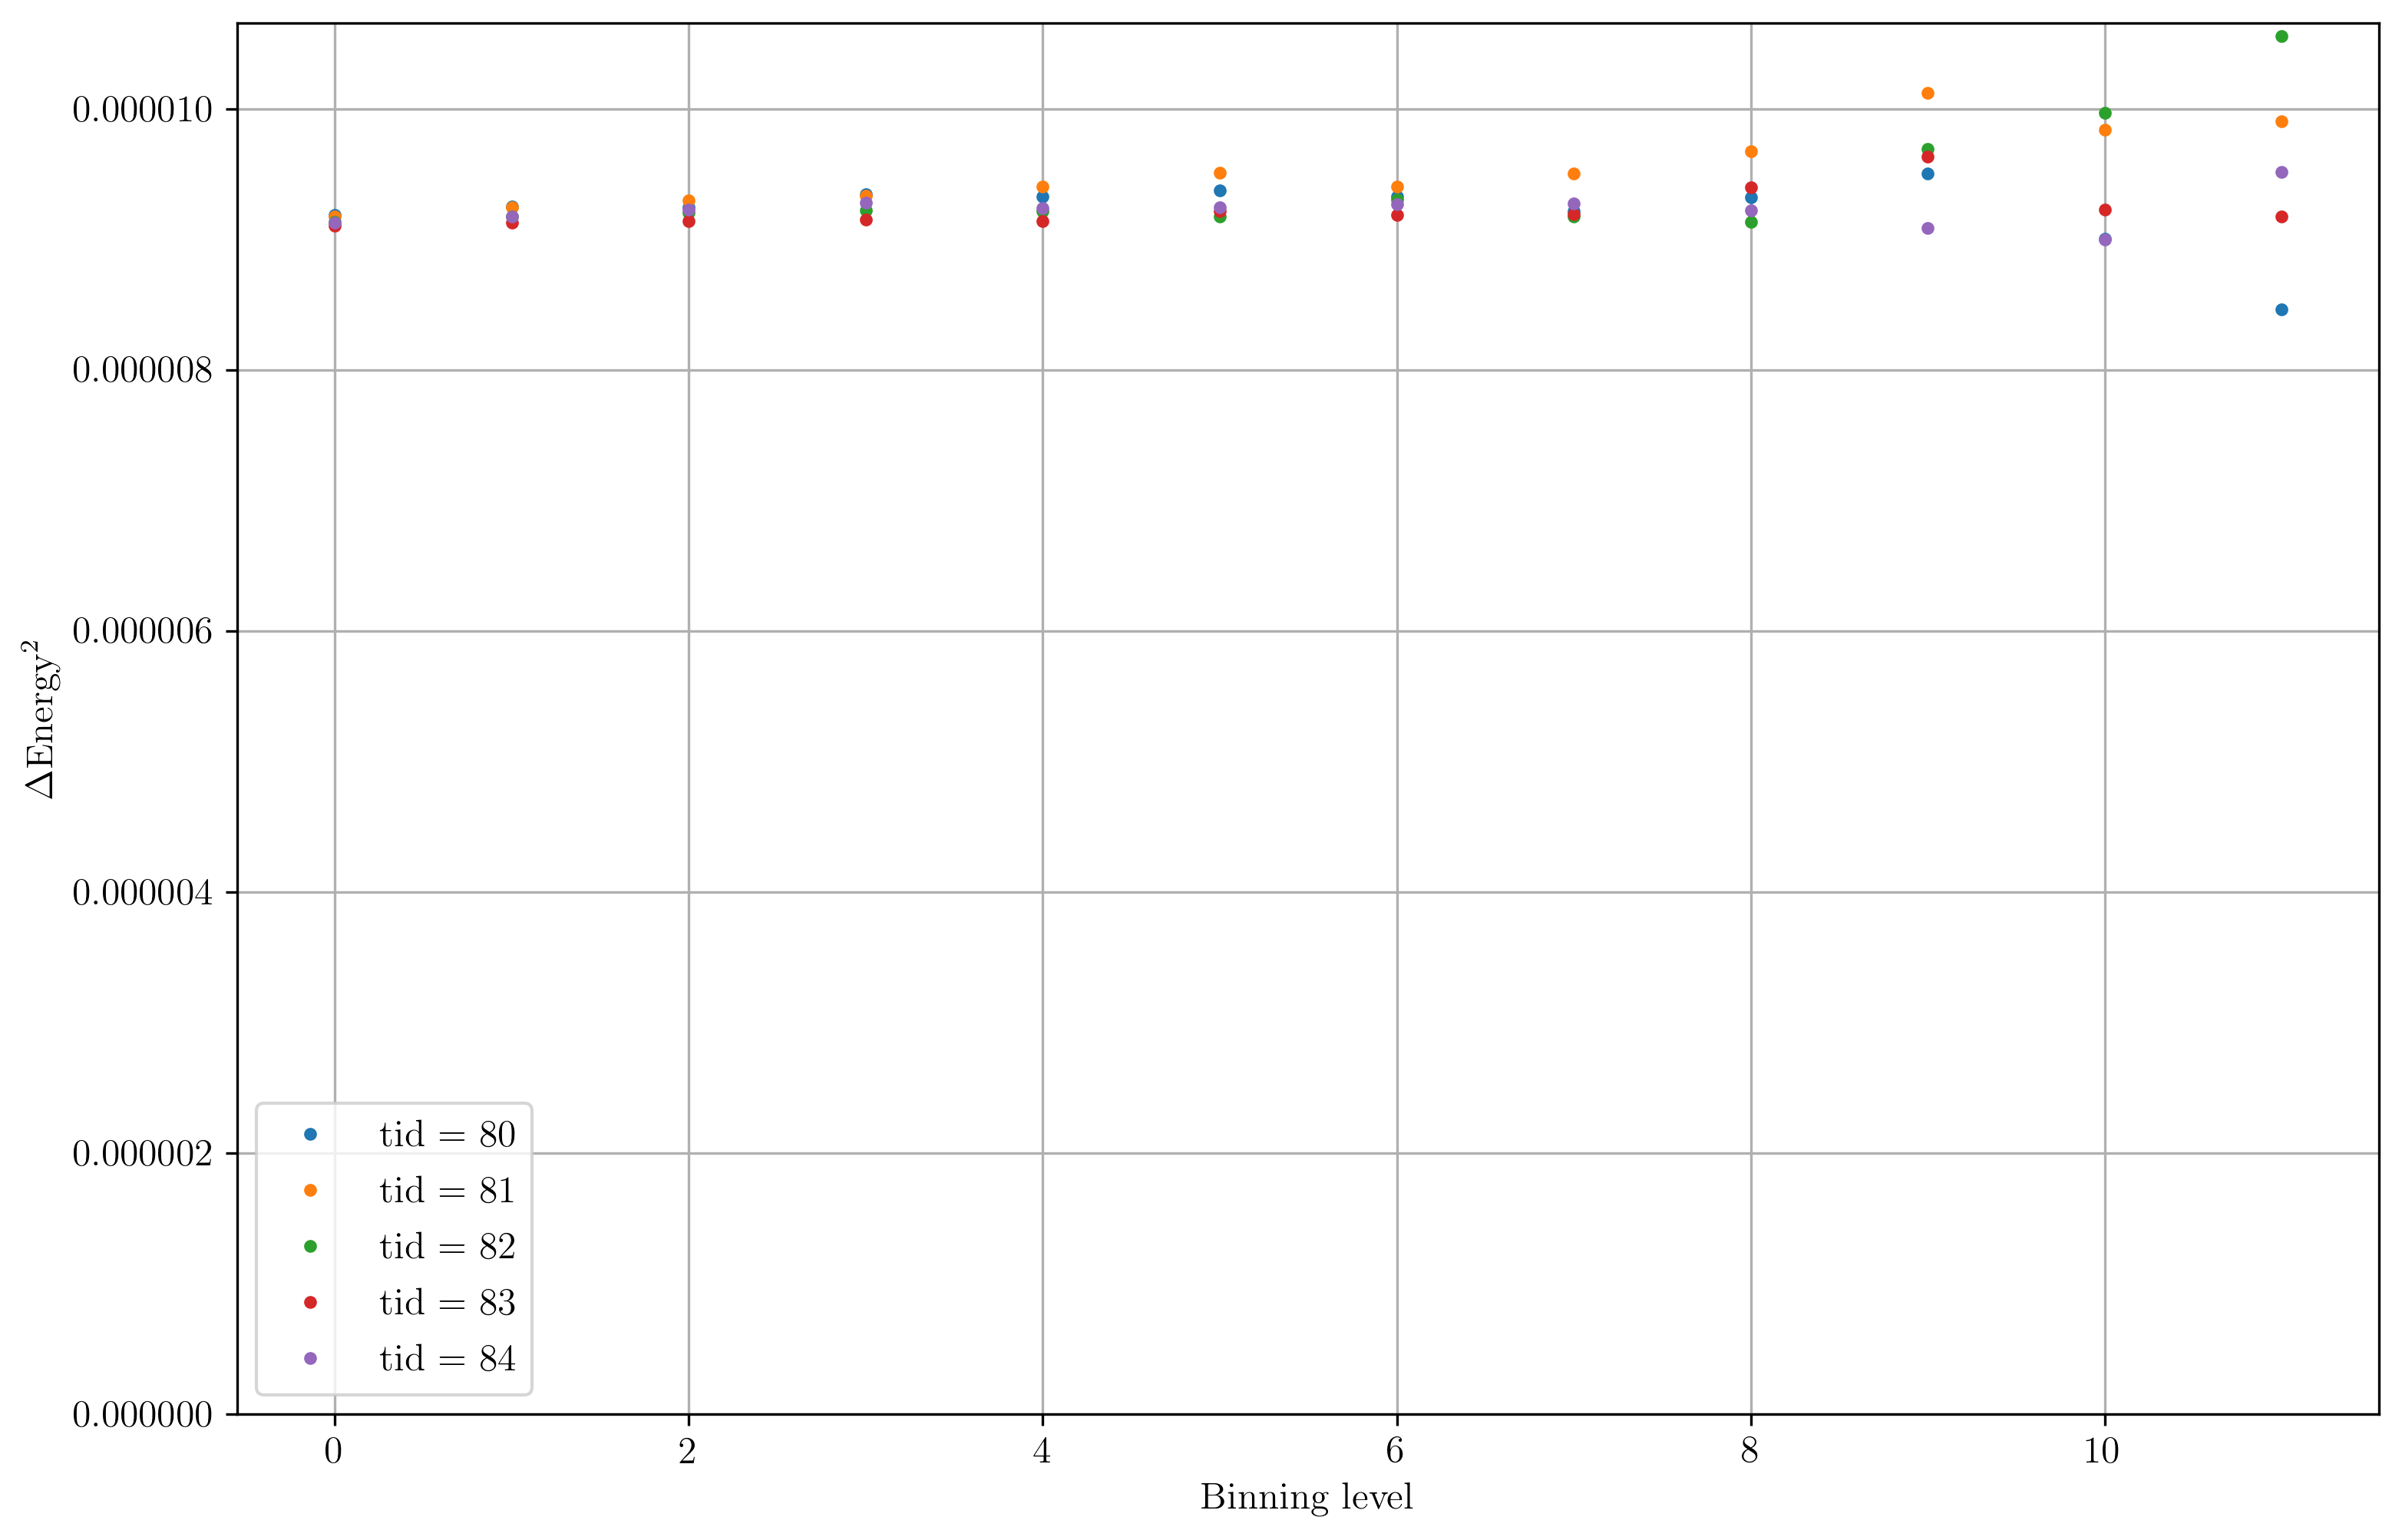

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.470902E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


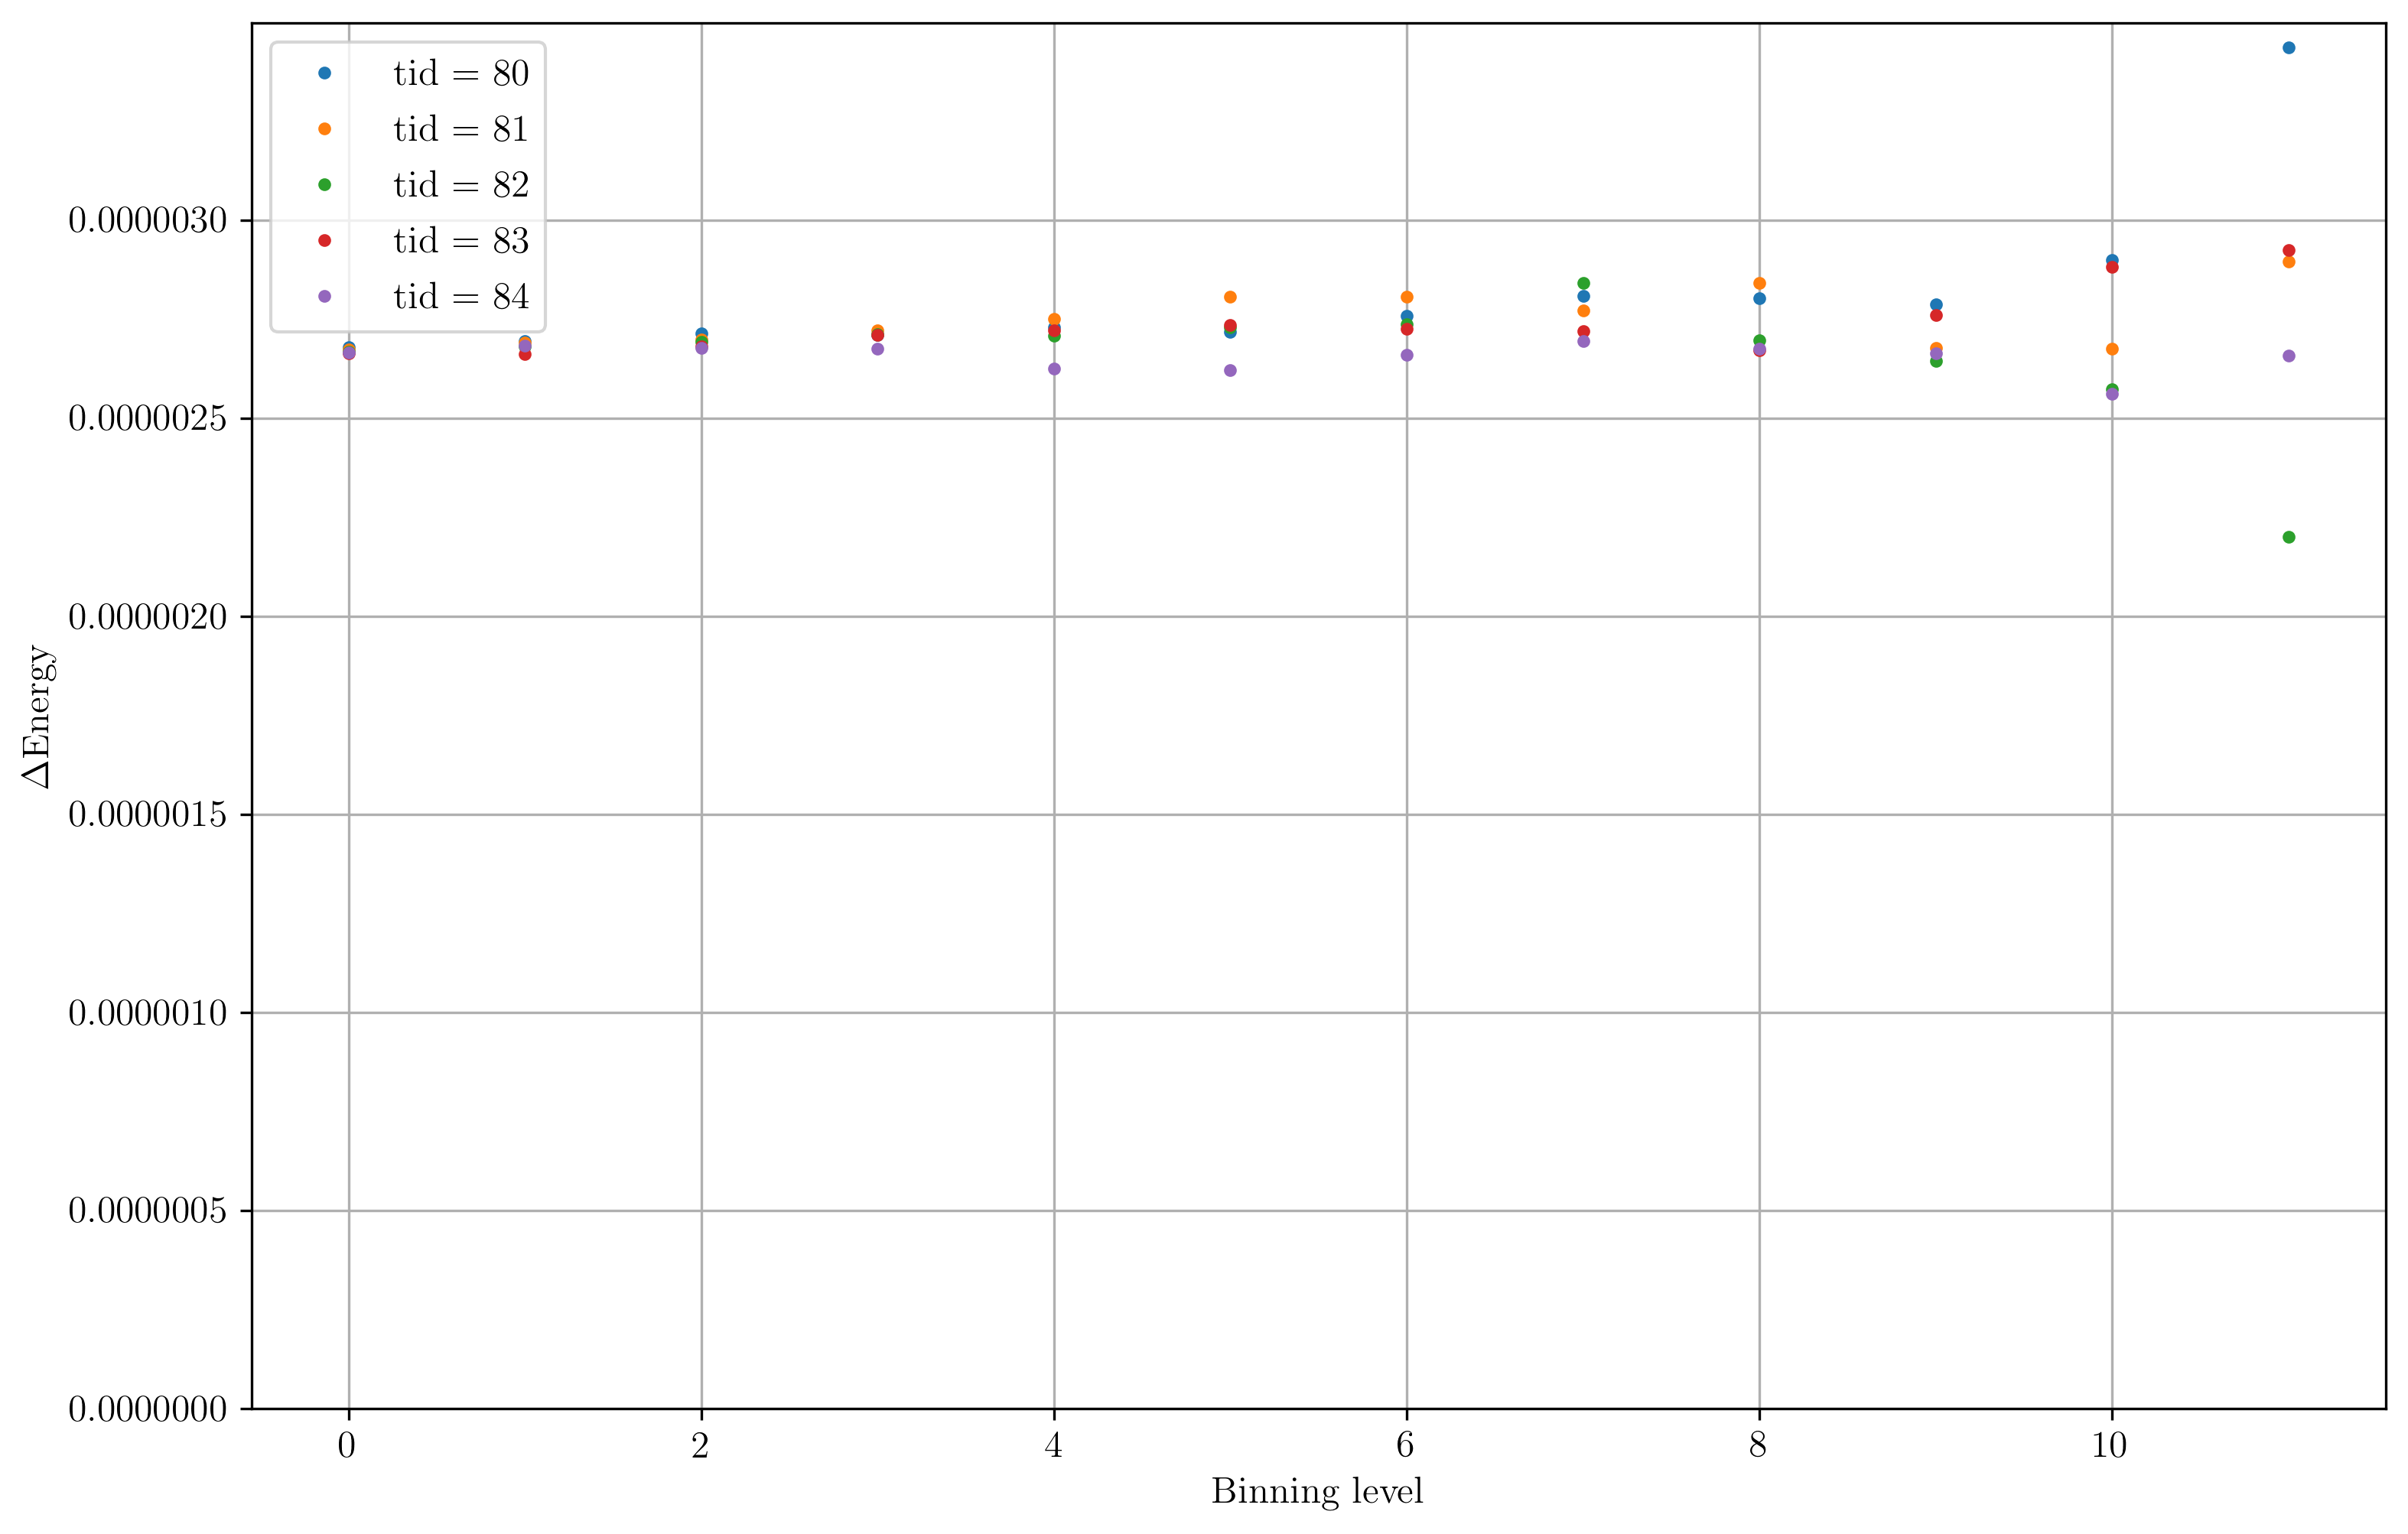

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


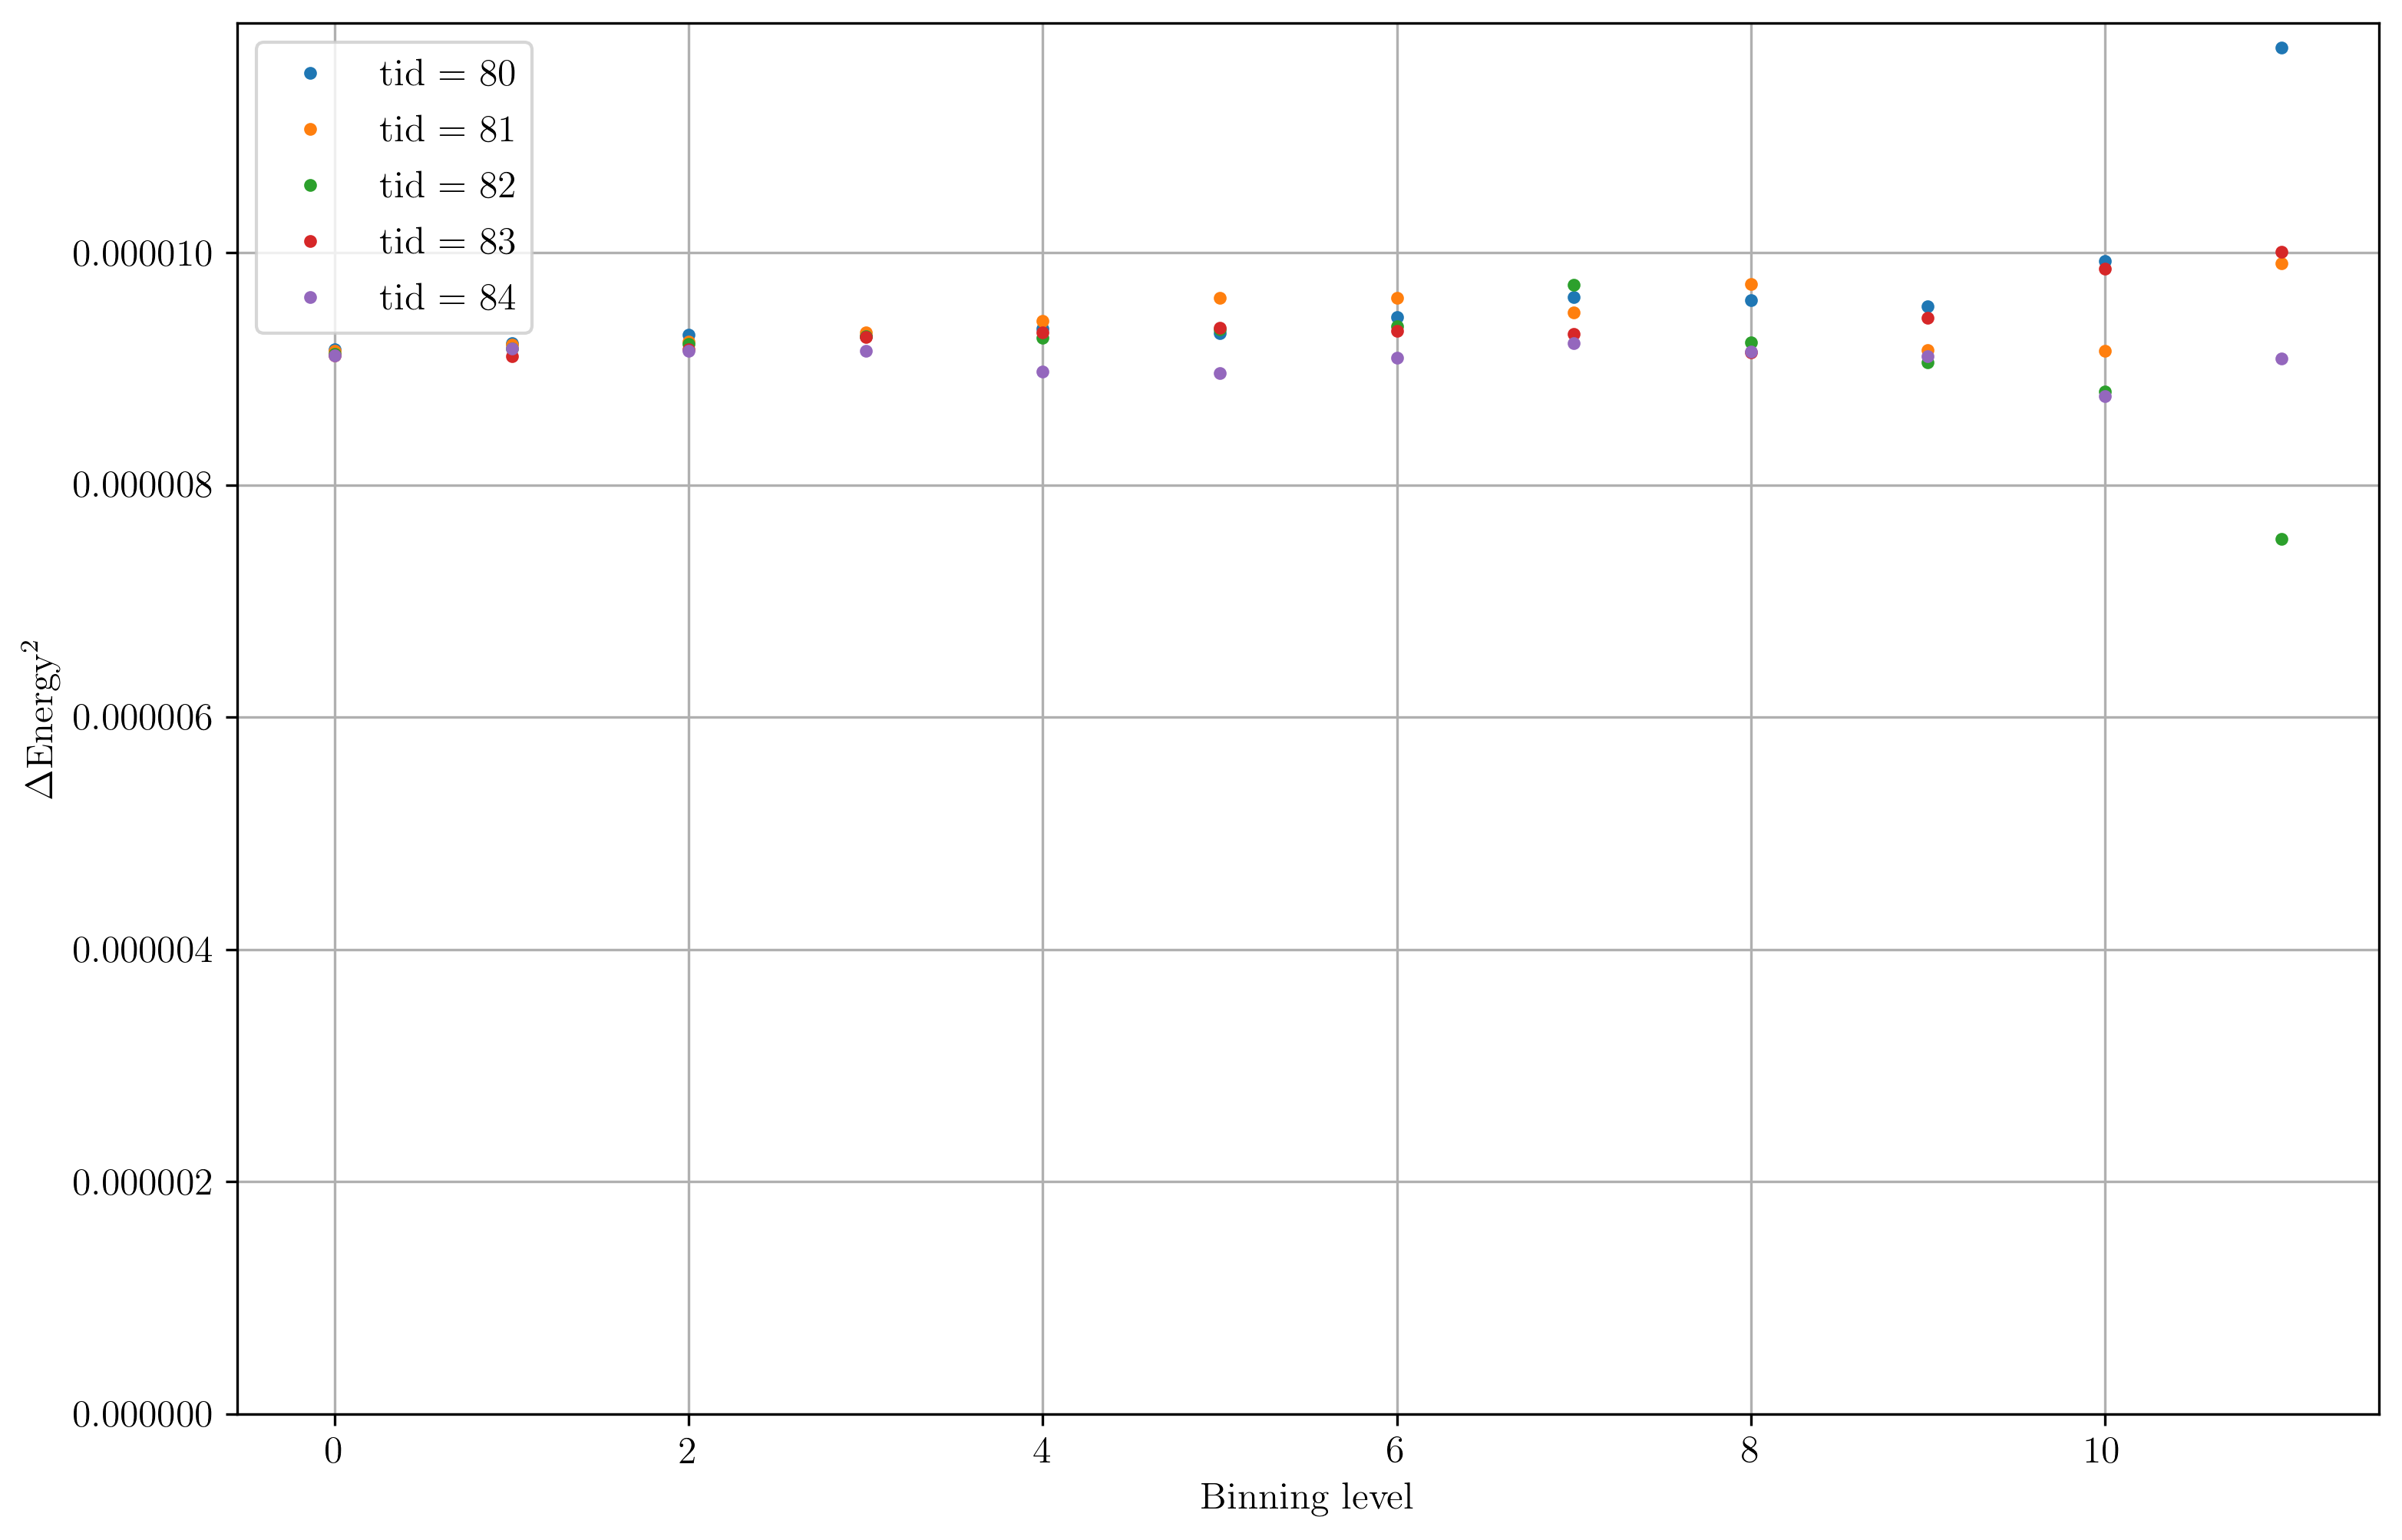

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 4.586249E-12
  warnings.warn("Negative variances num error: %E" % err)


Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


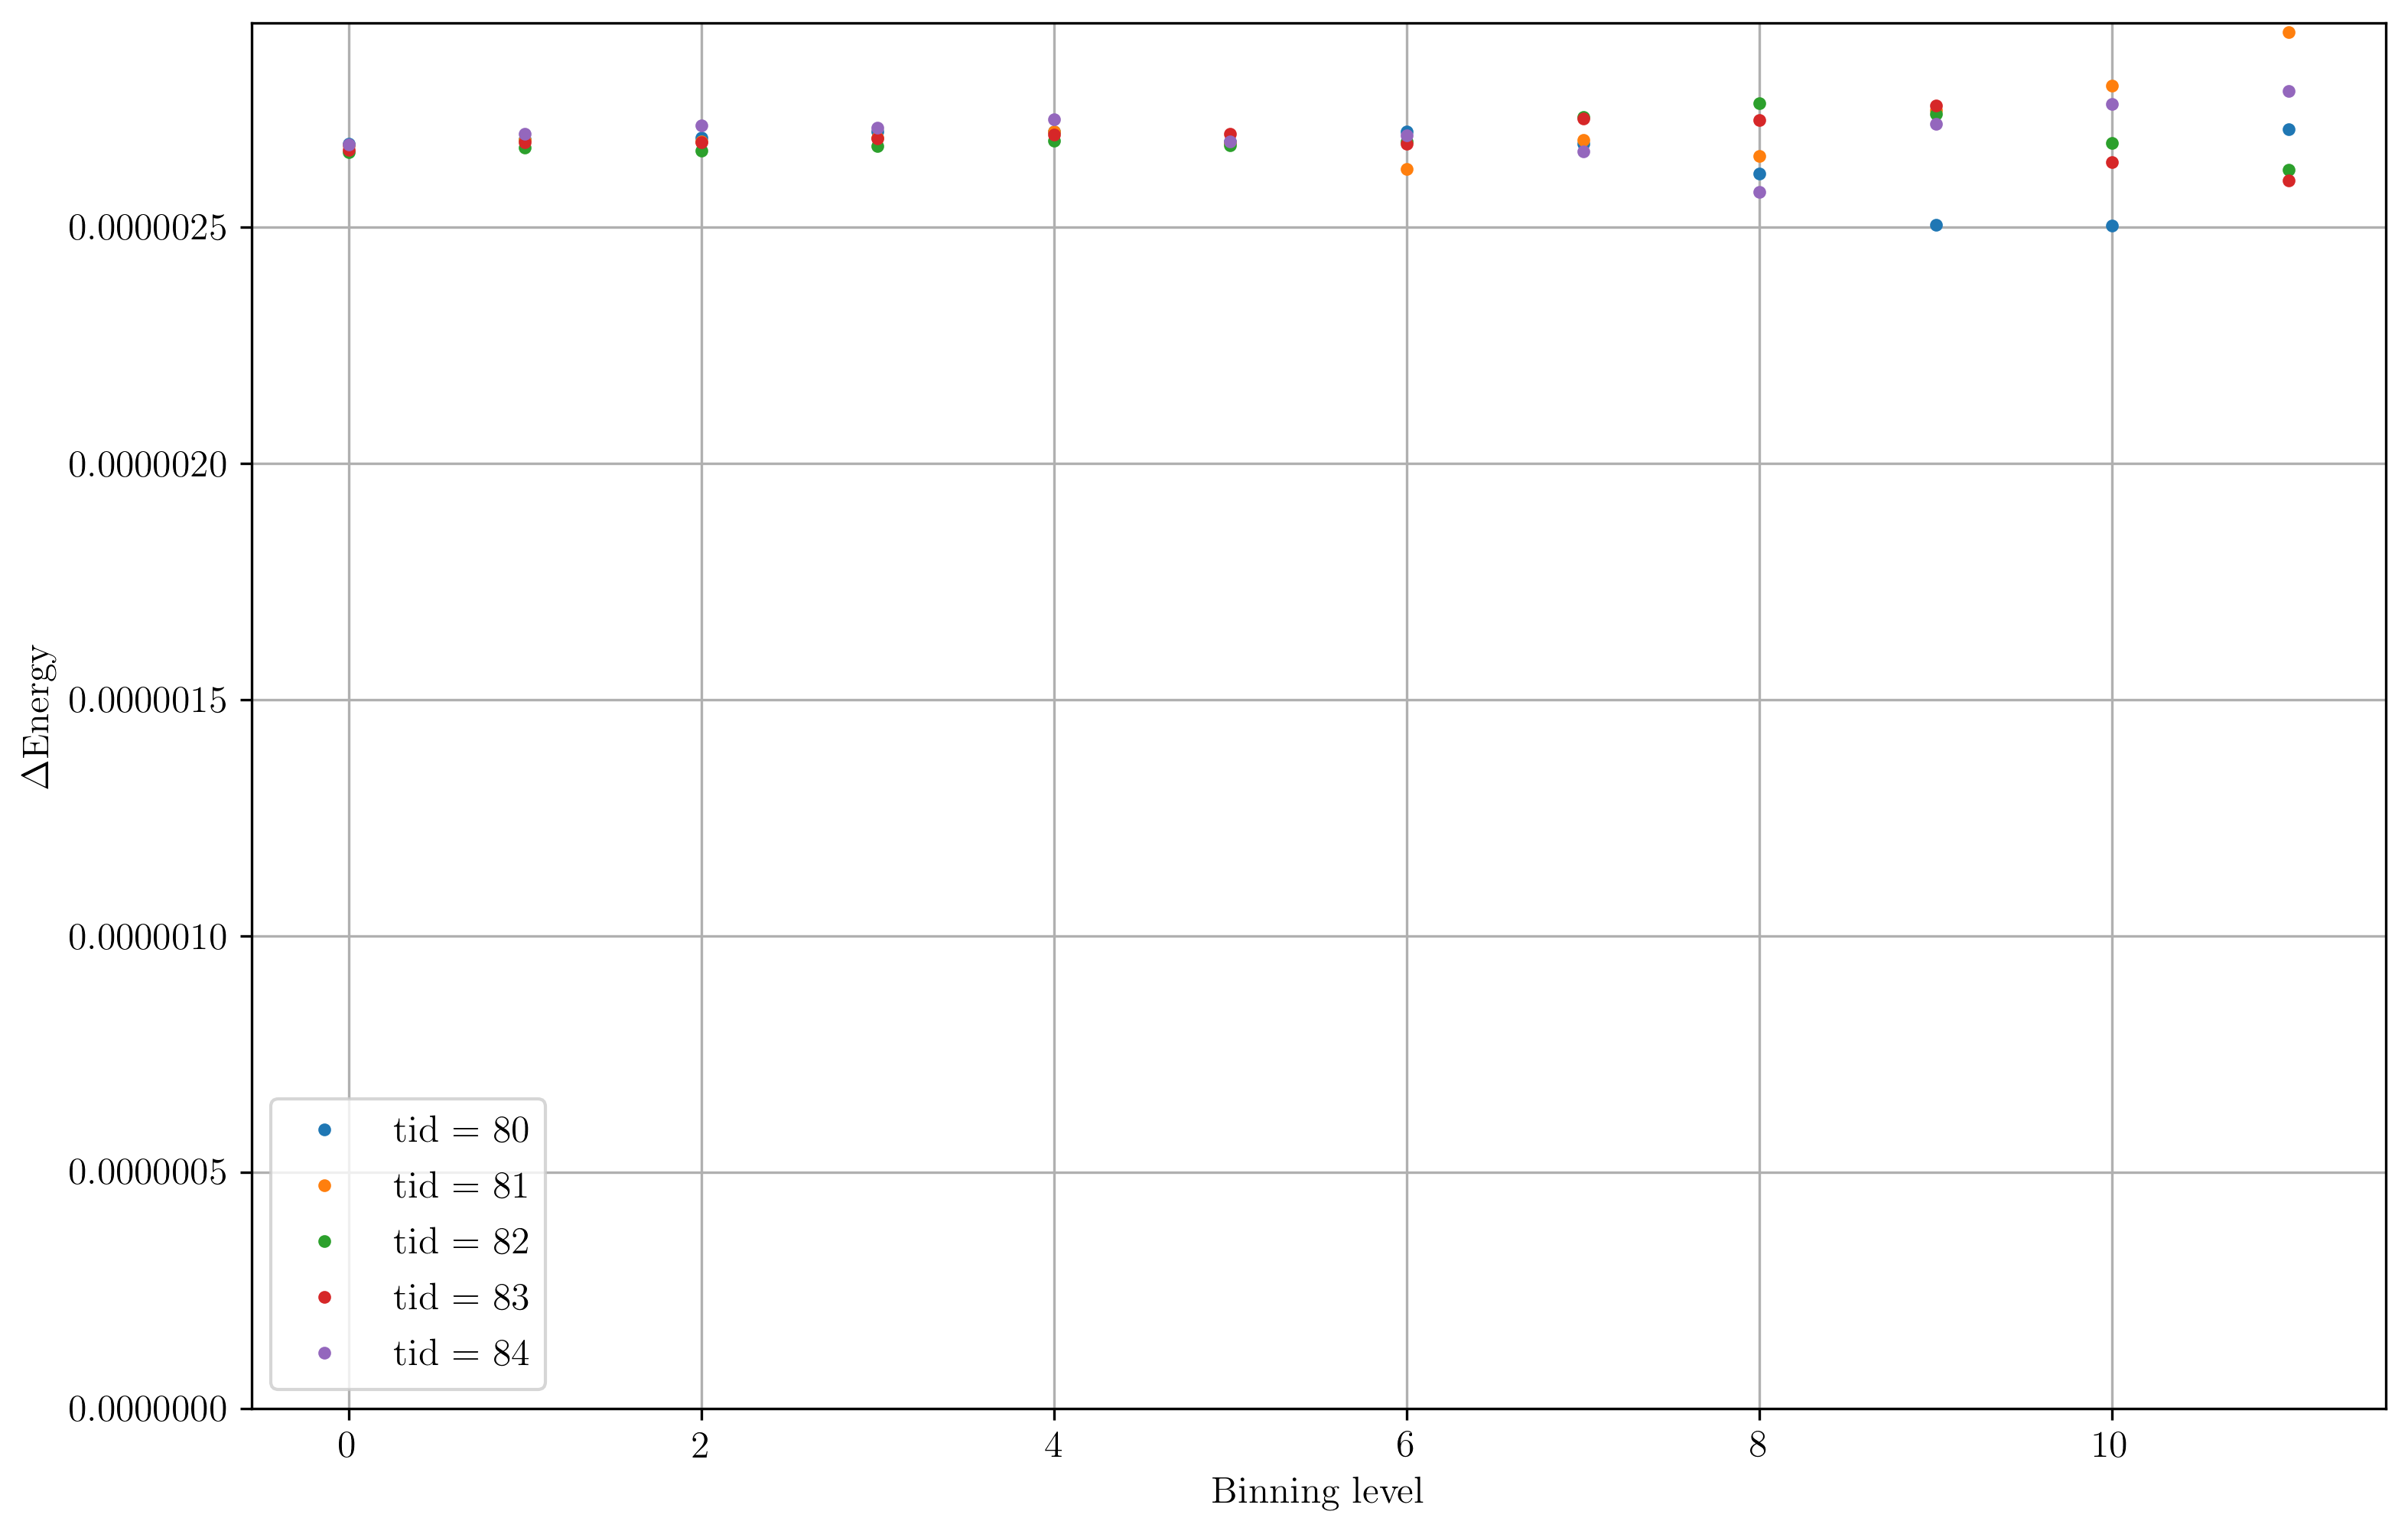

[-1.73333333]
Binning...Energy
 bins list for binning:  [131072, 65536, 32768, 16384, 8192, 4096, 2048, 1024, 512, 256, 128, 64]
(131072, 216, 1)
(131072, 216, 1)
(65536, 216, 1)
(32768, 216, 1)
(16384, 216, 1)
(8192, 216, 1)
(4096, 216, 1)
(2048, 216, 1)
(1024, 216, 1)
(512, 216, 1)
(256, 216, 1)
(128, 216, 1)
(64, 216, 1)
plotting!


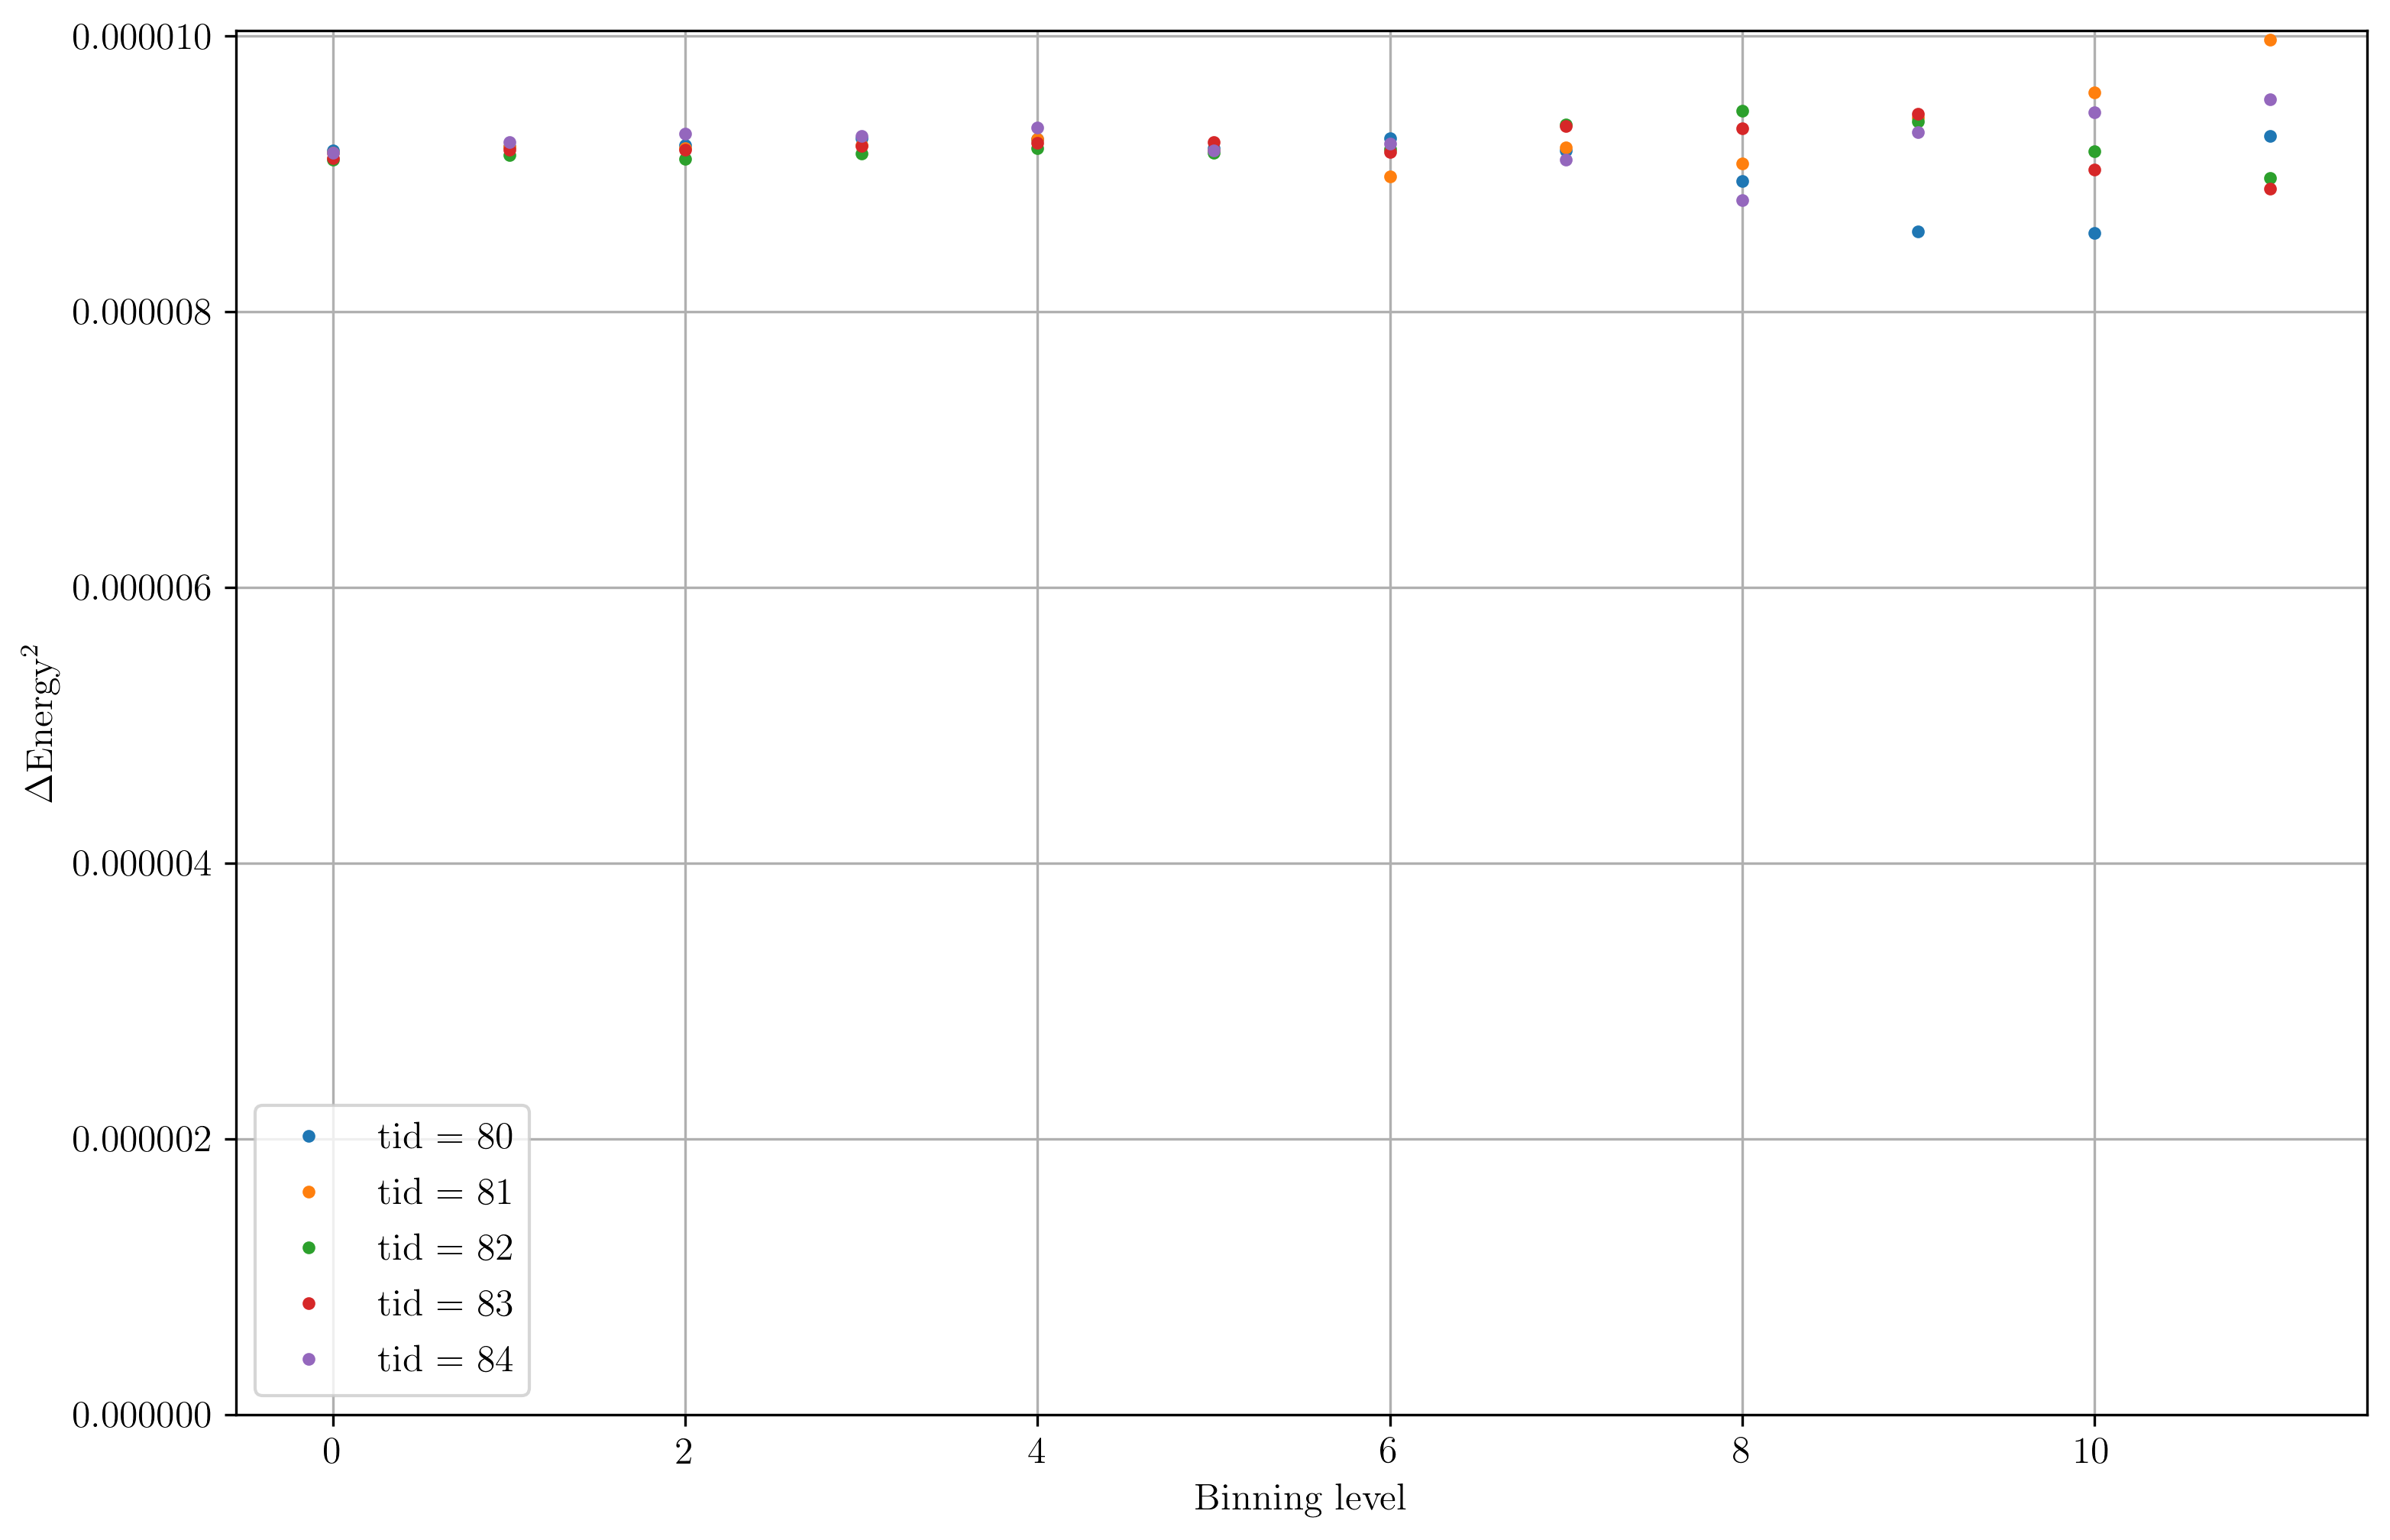

No jackknife analysis -- binning level:  2  -- number of bins:  32768
(131072, 2, 216, 1)


/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py:694: UserWarning: Negative variances num error: 5.723152E-12
  warnings.warn("Negative variances num error: %E" % err)


In [21]:
kw = {'binning':True, 'plzplot': True, 'minbin':63, 'RS':True, 
      'S0':np.log(2), 'mergeruns':mergeruns, 'nb_drop':nb_drop,
     'plotmin':80, 'plotmax':85, 'binning_level':2, 'jackknife': False}
[t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, t_h_VarE, t_h_ErrVarE, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax, MergedData ] = \
 af.LoadEnergy(foldername, filenamelist, numsites,
               nb, stat_temps, temperatures, stat_hfields, listfunctions, **kw)

if mergeruns:
    [t_h_MeanE, t_h_MeanEsq, t_h_varMeanE, t_h_varMeanEsq, C, ErrC,
 t_h_S, t_h_Smin, t_h_Smax] = MergedData

In [22]:
#t_MeanM, t_MeanMsq, t_varMeanM, t_varMeanMsq, Chi, ErrChi = \
# af.LoadMagnetisation(foldername, filenamelist, numsites, nb,
#                      stat_temps, temperatures, listfunctions, **kw)

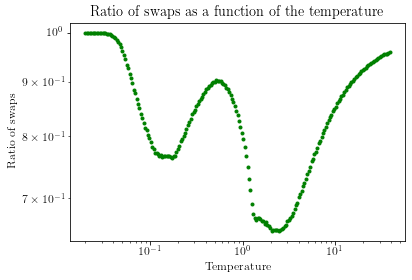

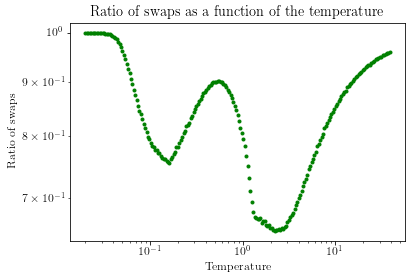

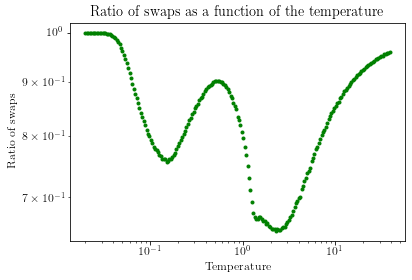

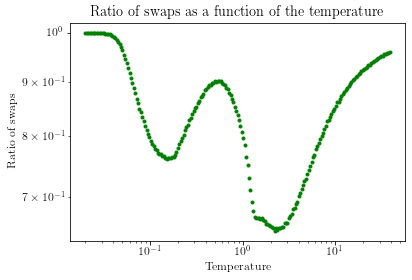

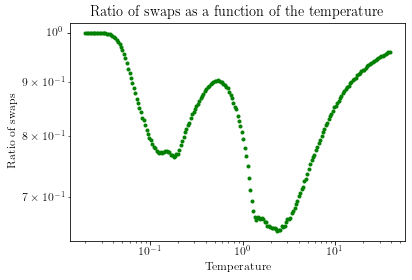

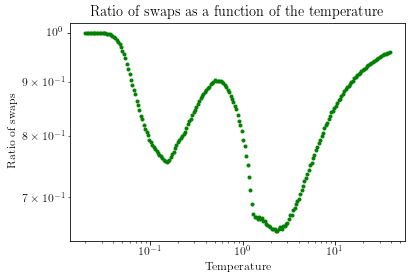

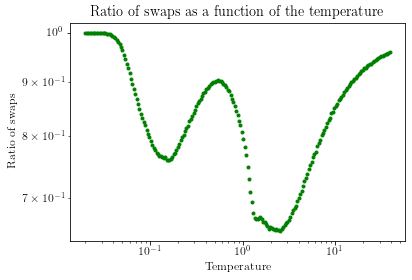

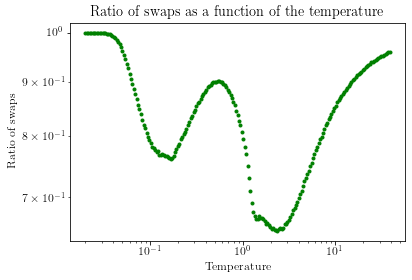

In [23]:
###########################################
        ## ALGORITHM ANALYSIS ##
###########################################
tidmin = 0
tidmax = nt
af.SwapsAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername, swapst, swapsh)

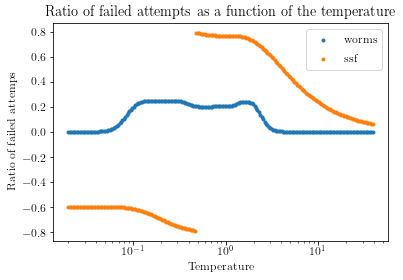

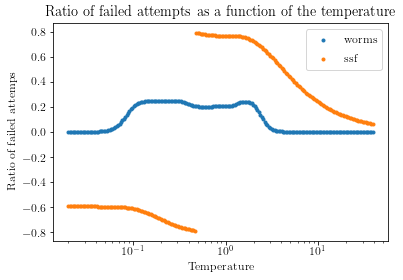

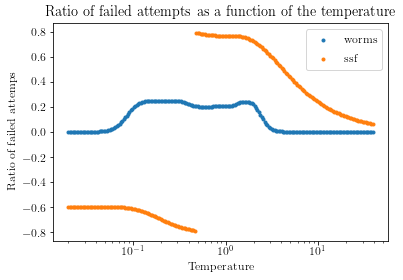

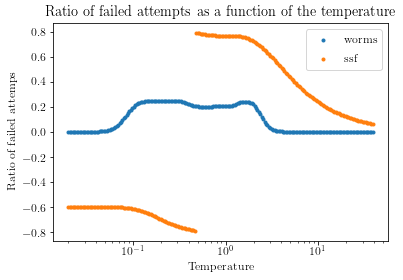

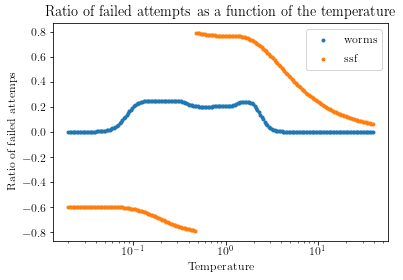

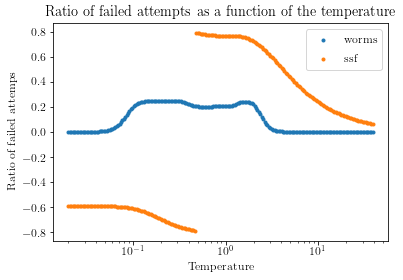

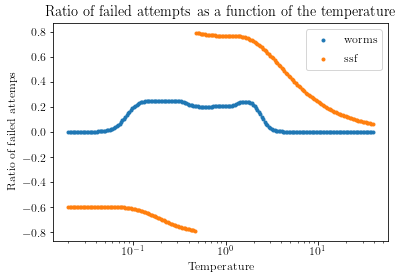

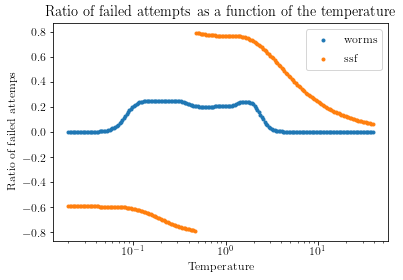

In [24]:
af.FailedAnalysis(L, n, tidmin, tidmax, temperatures, hfields,
                 foldername, results_foldername,failedth, failedssf)

In [36]:
import importlib
importlib.reload(af)

<module 'AnalysisFunctions' from '/home/jcolbois/Documents/Codes_DipolarIsingModel/myopic-dual-worm/dualworm-kagome/AnalysisFunctions.py'>

In [26]:
tidmin = 0
tidmax = [len(stat_temps[i]) for i in range(n)]
temperatures_plots = np.array(temperatures_plots)
S0 = np.log(2)
kw = {'gscheck': True, 'S0': S0, 'RS': True, 't_h_EntropyData': (t_h_S, t_h_Smin, t_h_Smax) }

print(t_h_Smin[0][0:5,0])
print(t_h_S[0][0:5,0])
print(t_h_Smax[0][0:5,0])

[0.11111029 0.1111103  0.11111033 0.11111035 0.11111038]
[0.11224291 0.11224291 0.11224291 0.11224291 0.11224291]
[0.11337553 0.11337552 0.1133755  0.11337548 0.11337544]


In [27]:
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Time New Roman'],'size':12})
rc('text', usetex=True)
import os
fm = matplotlib.font_manager.json_load(os.path.expanduser("~/.cache/matplotlib/fontlist-v310.json"))

fm.findfont("serif", rebuild_if_missing=False)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'

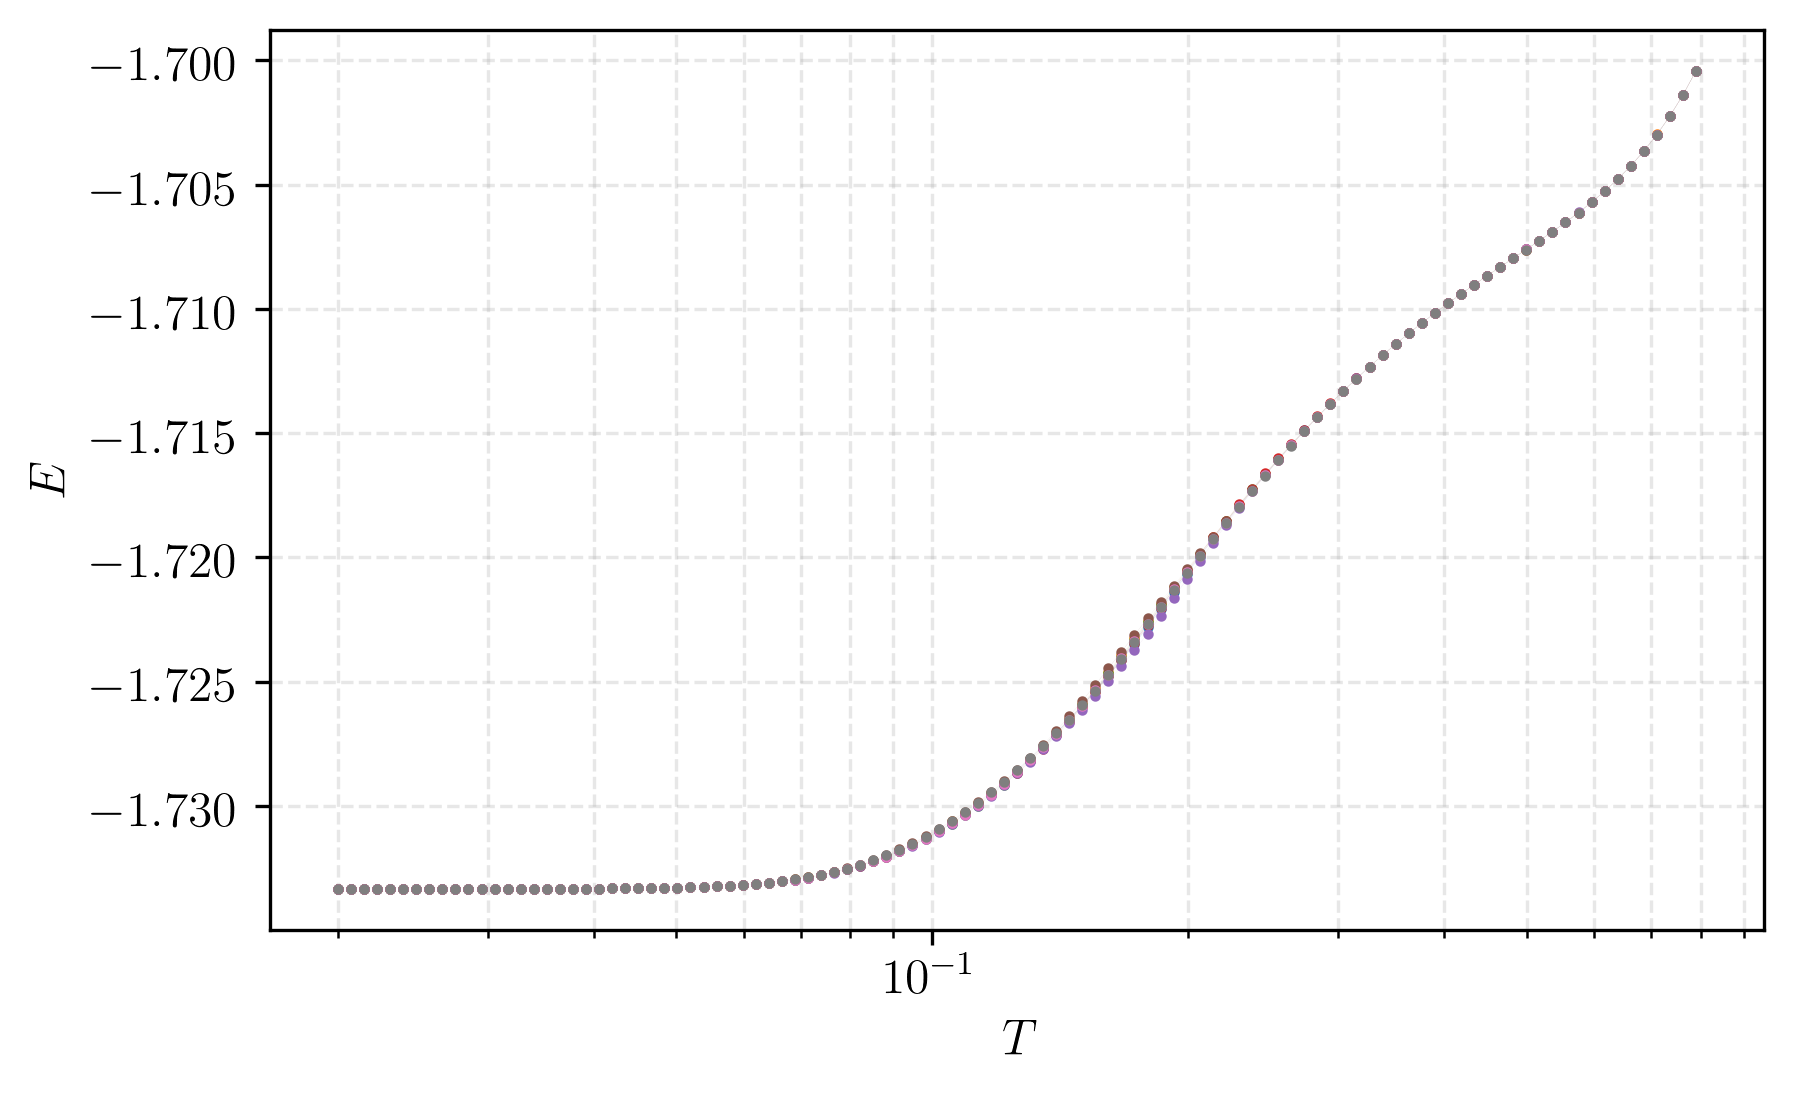

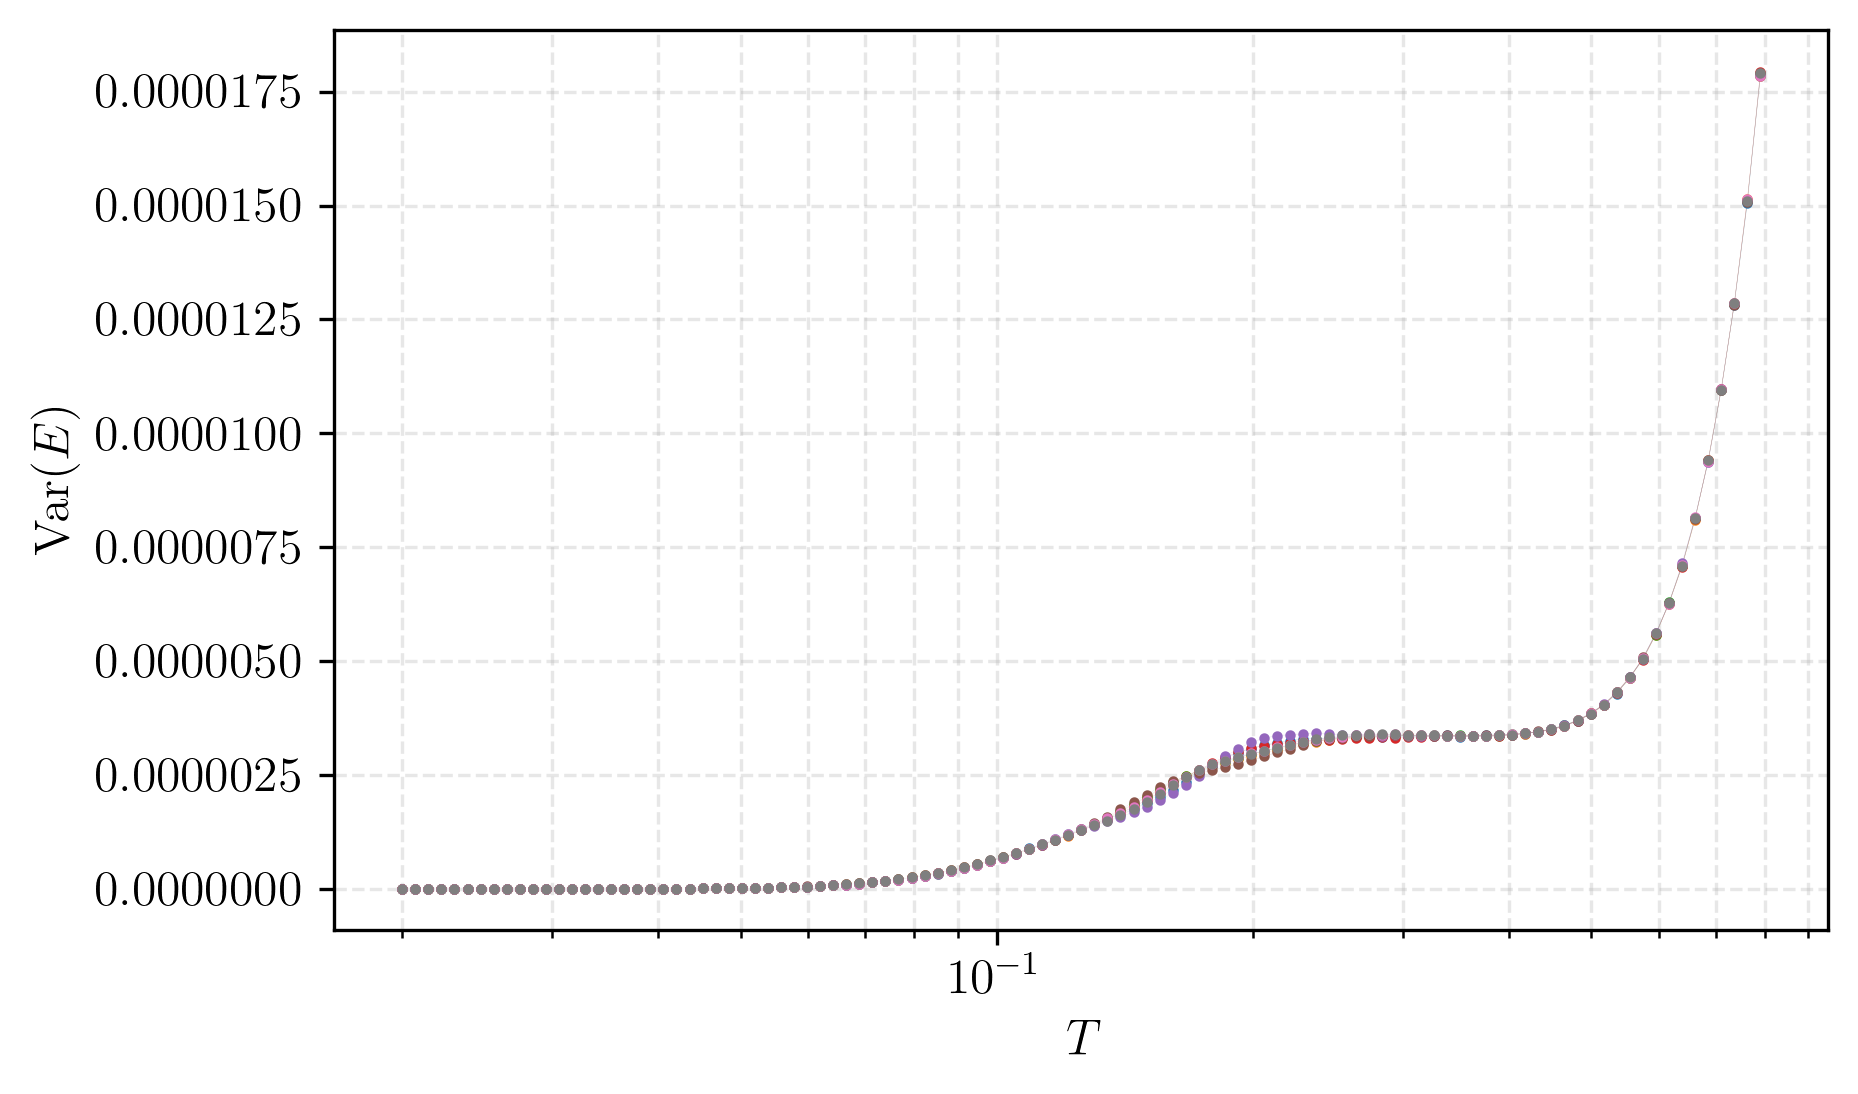

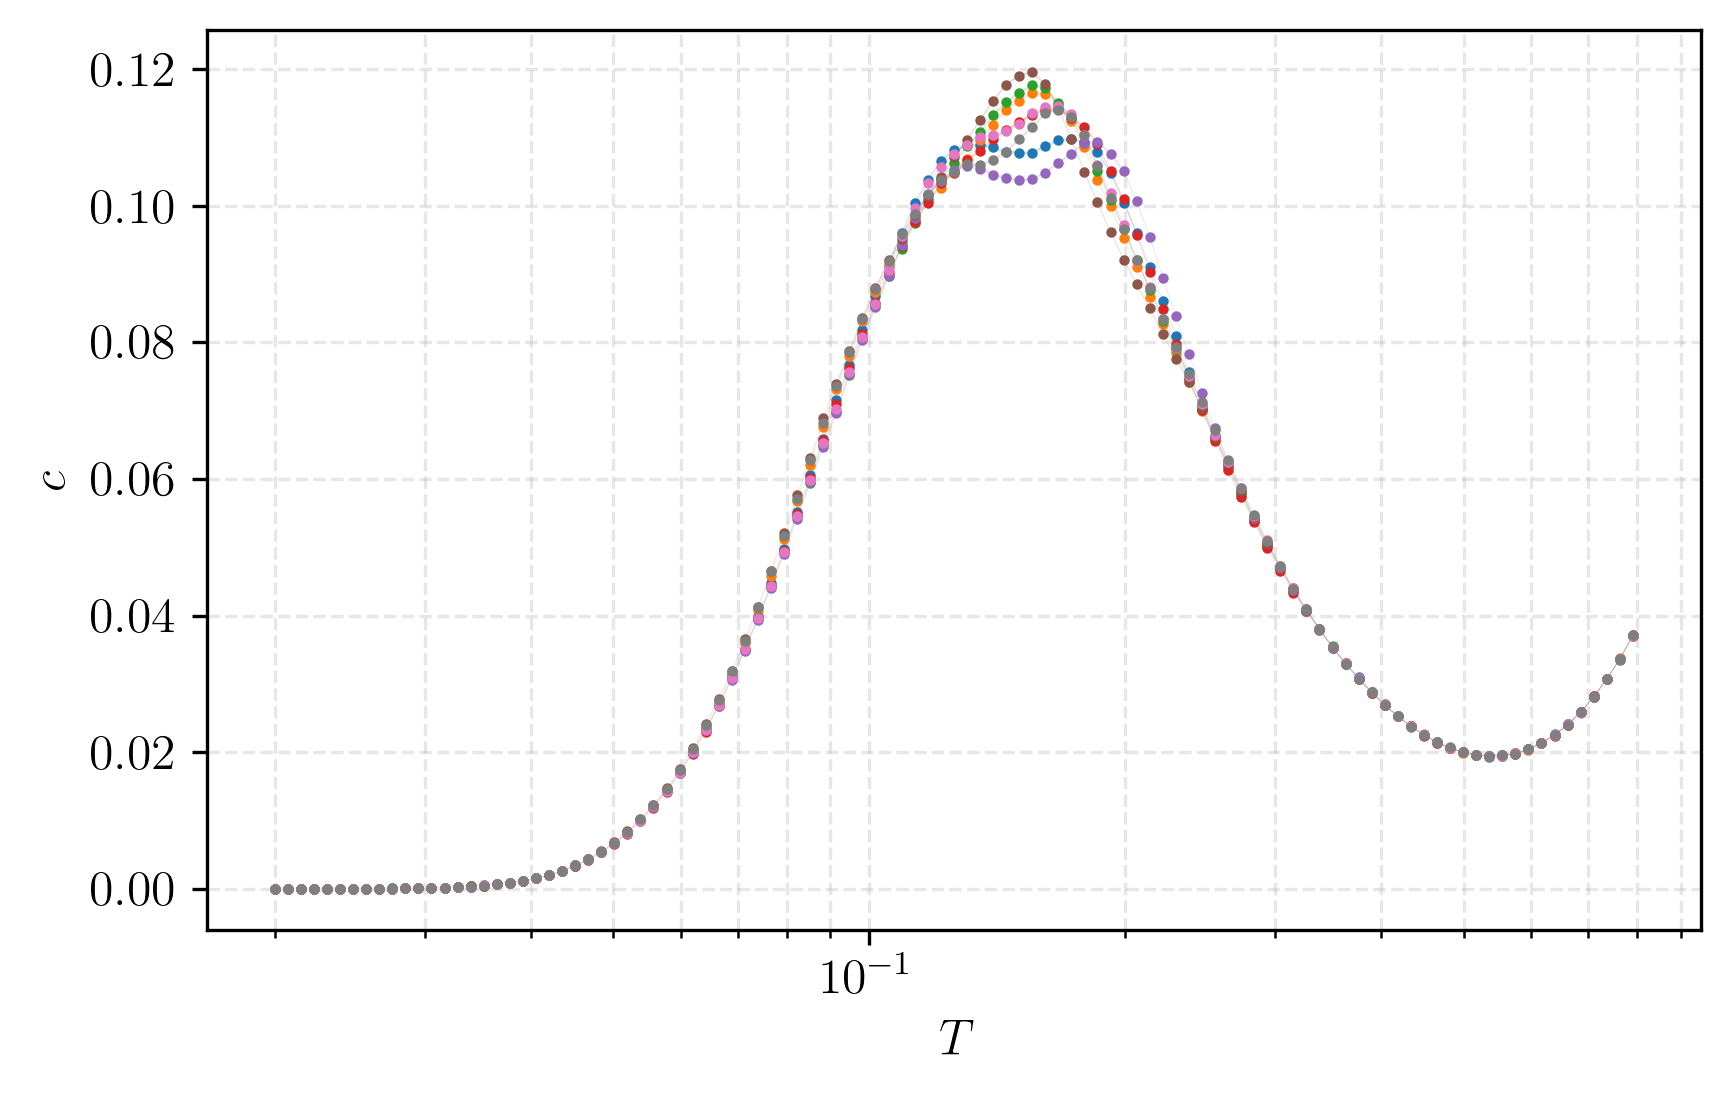

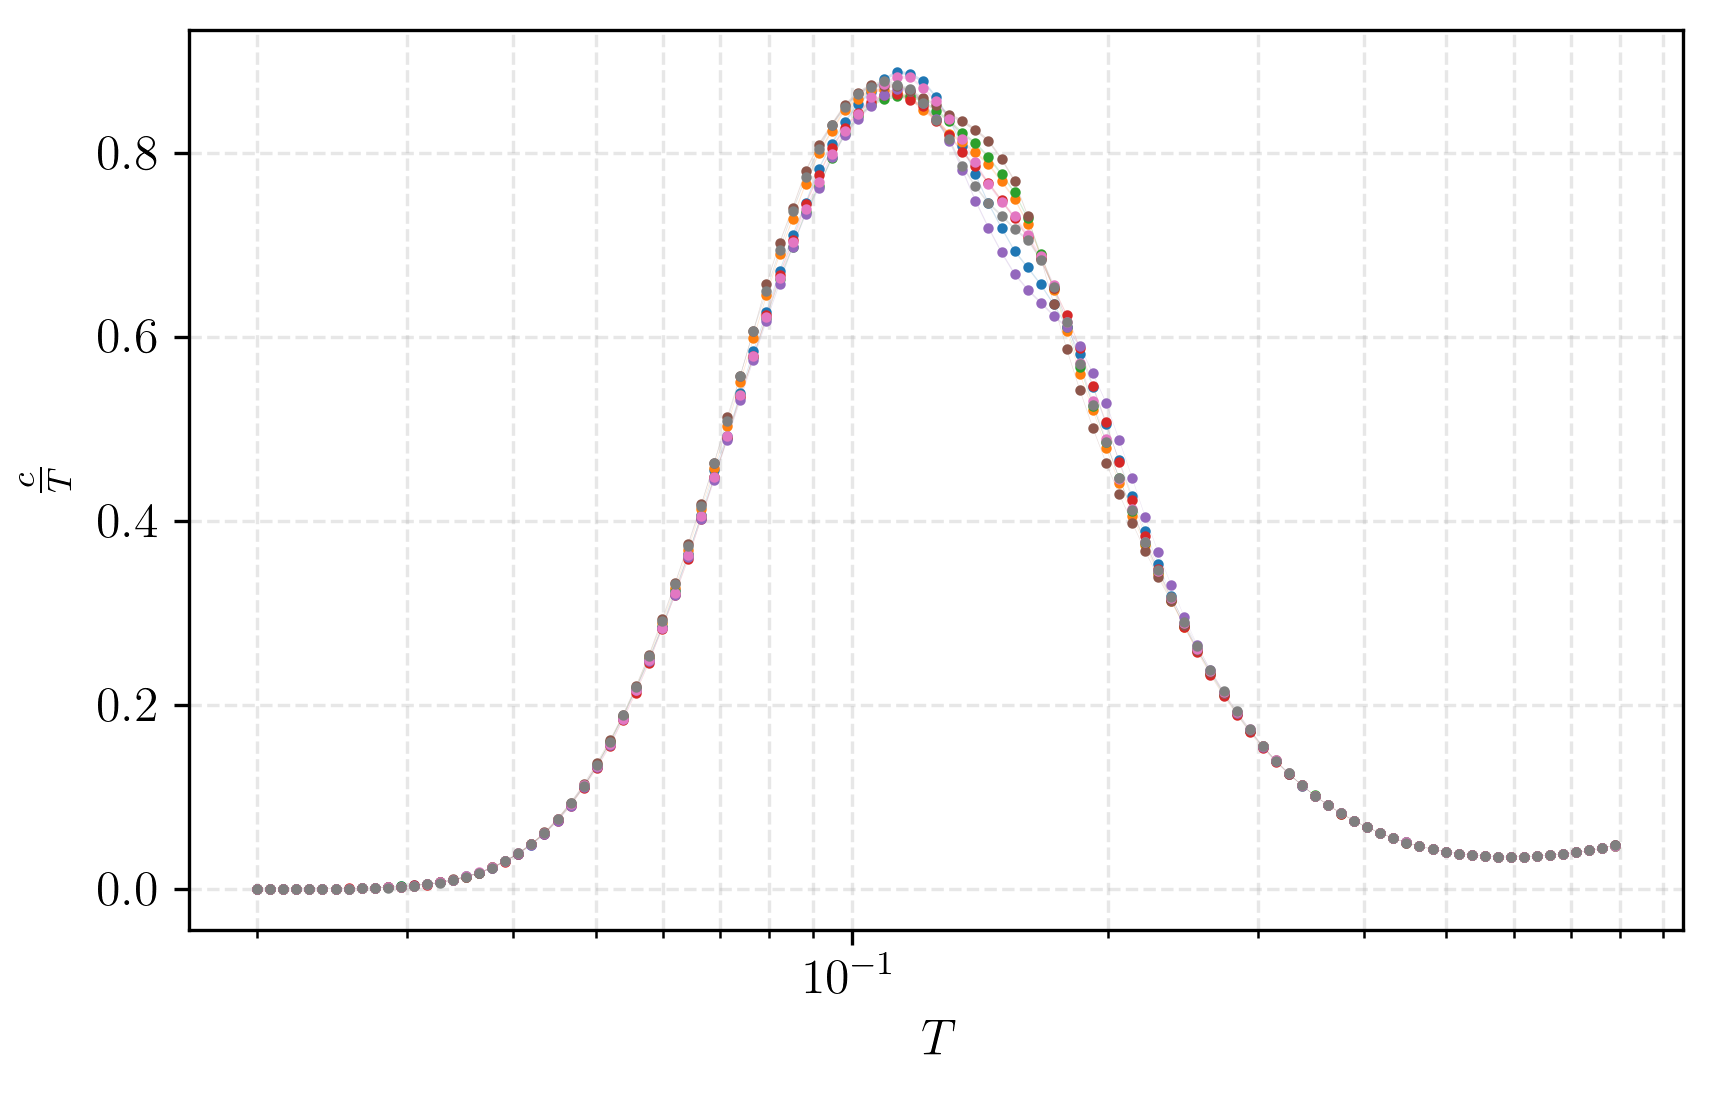

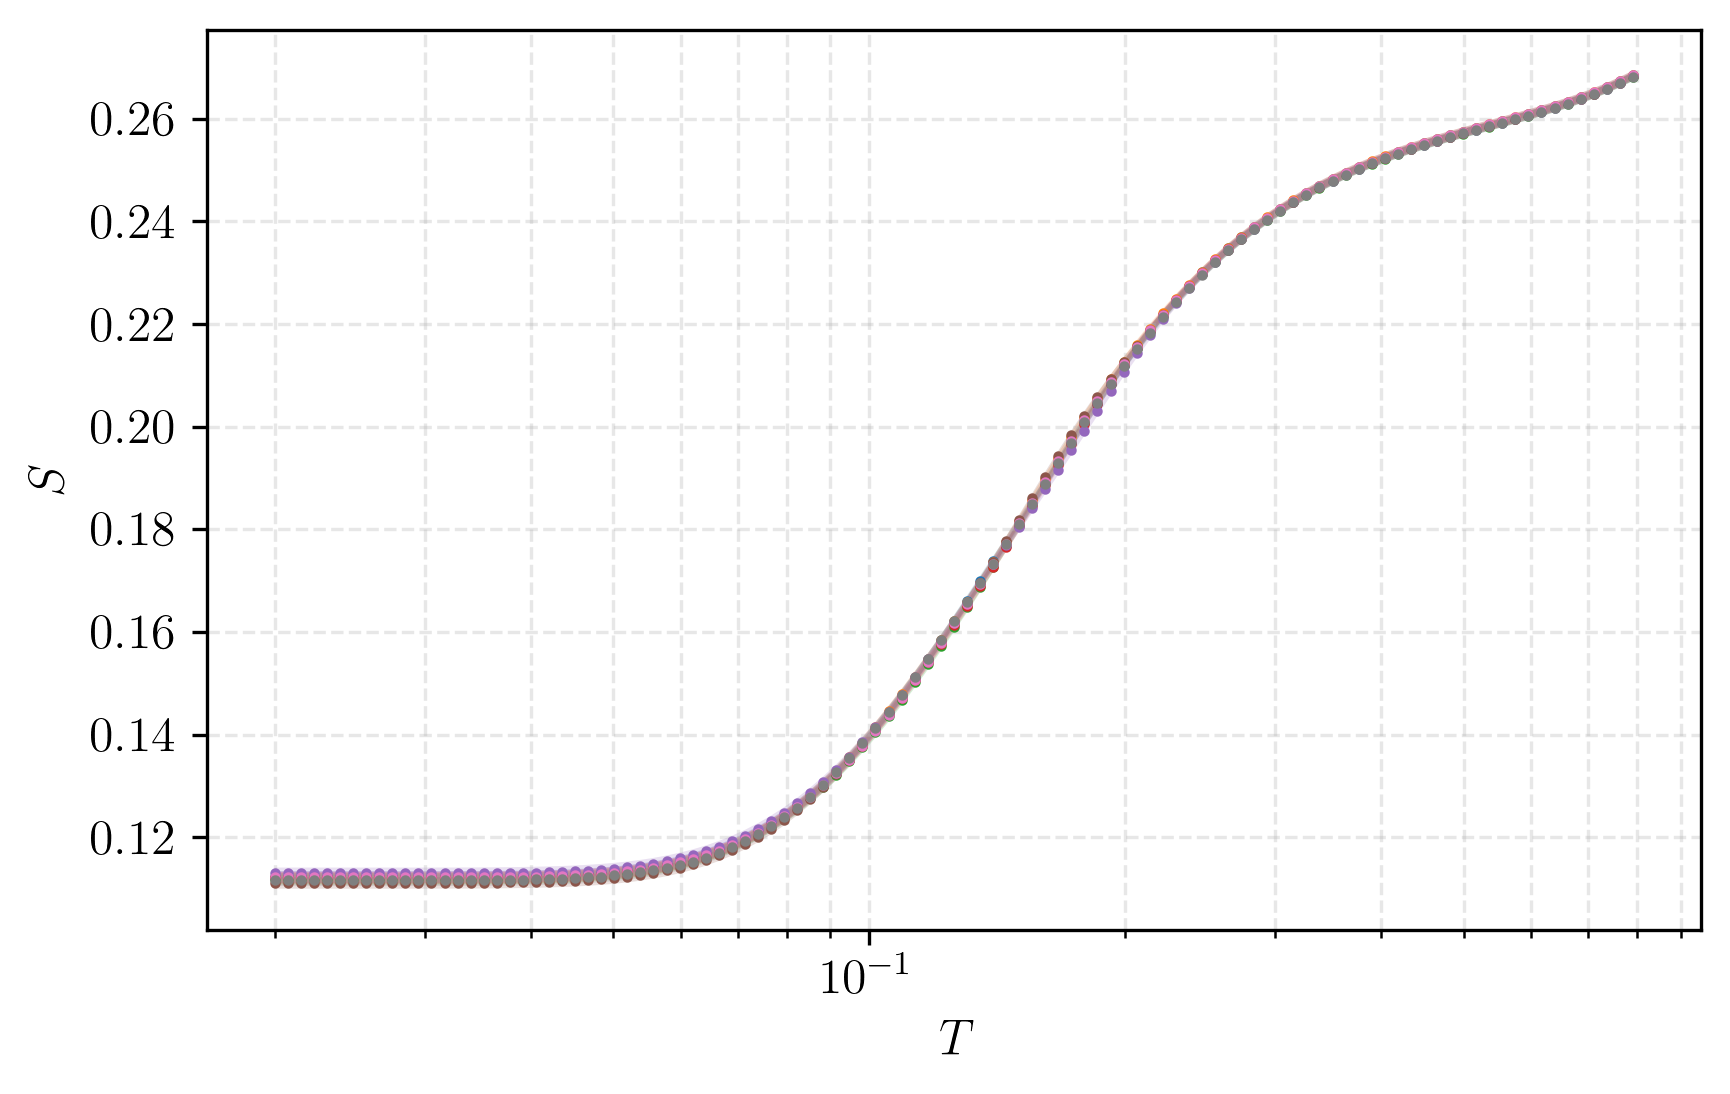

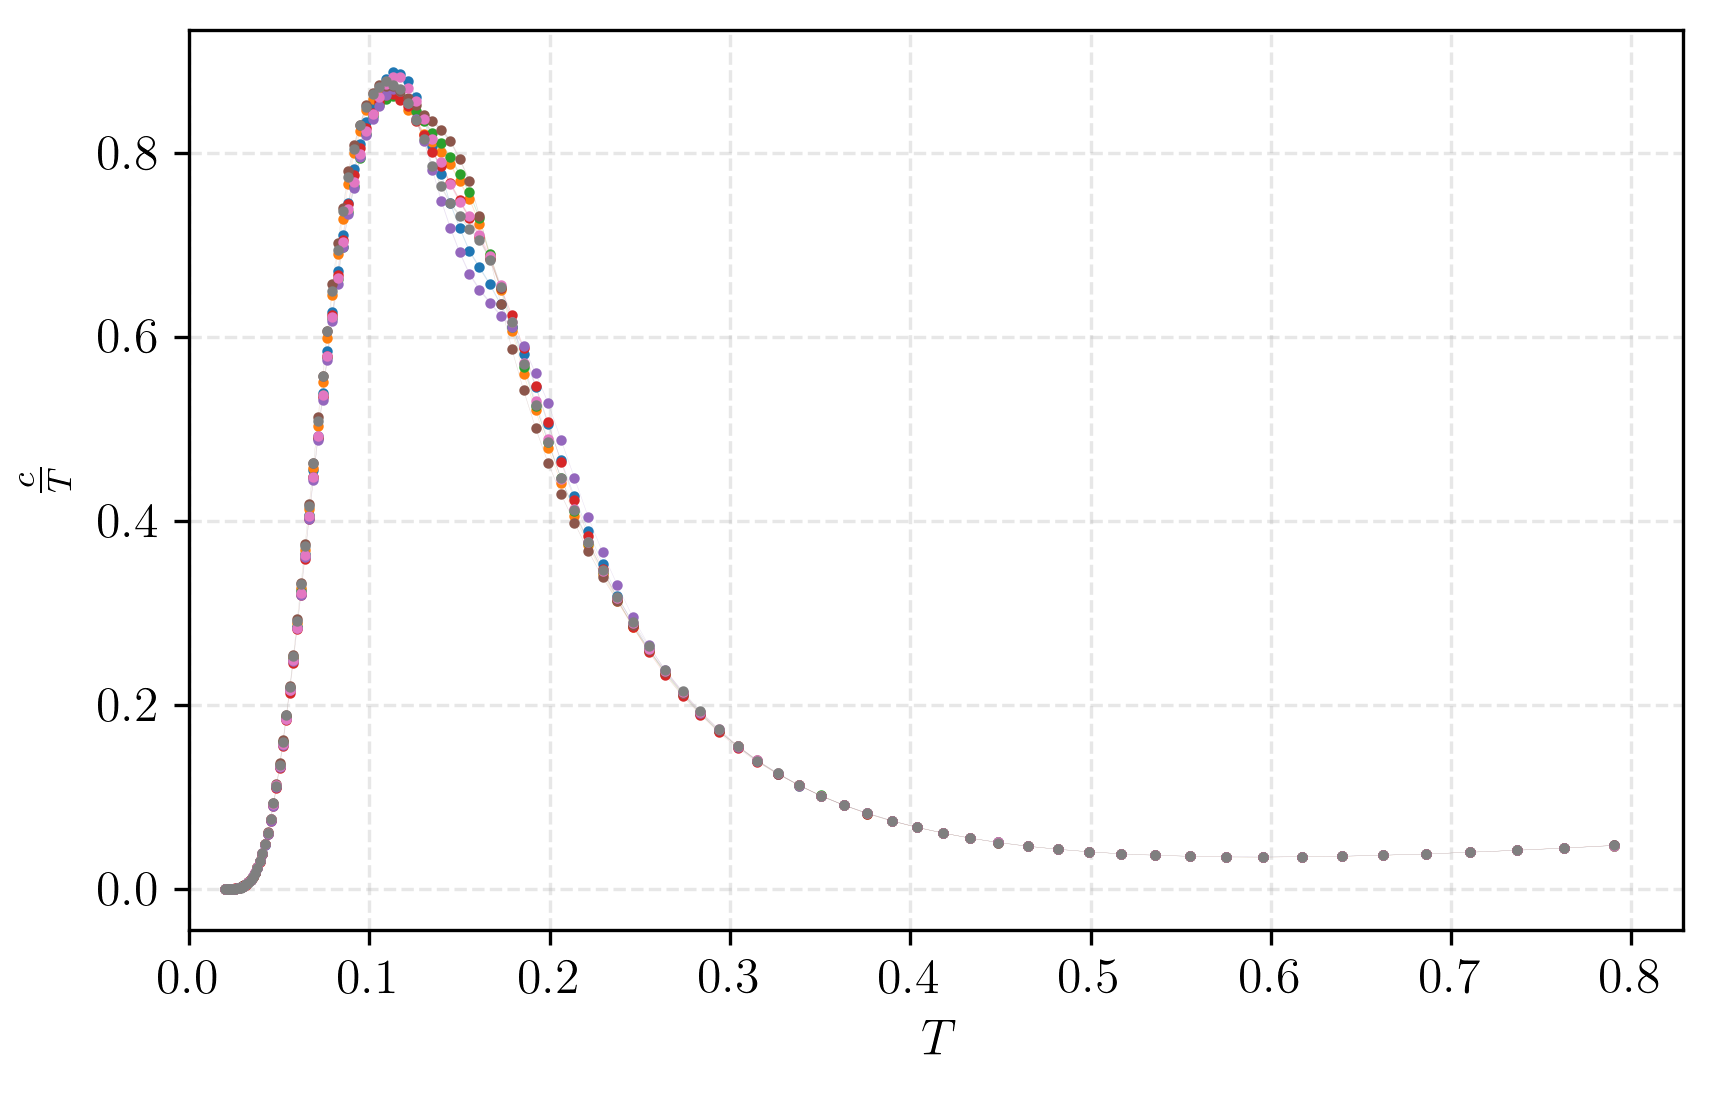

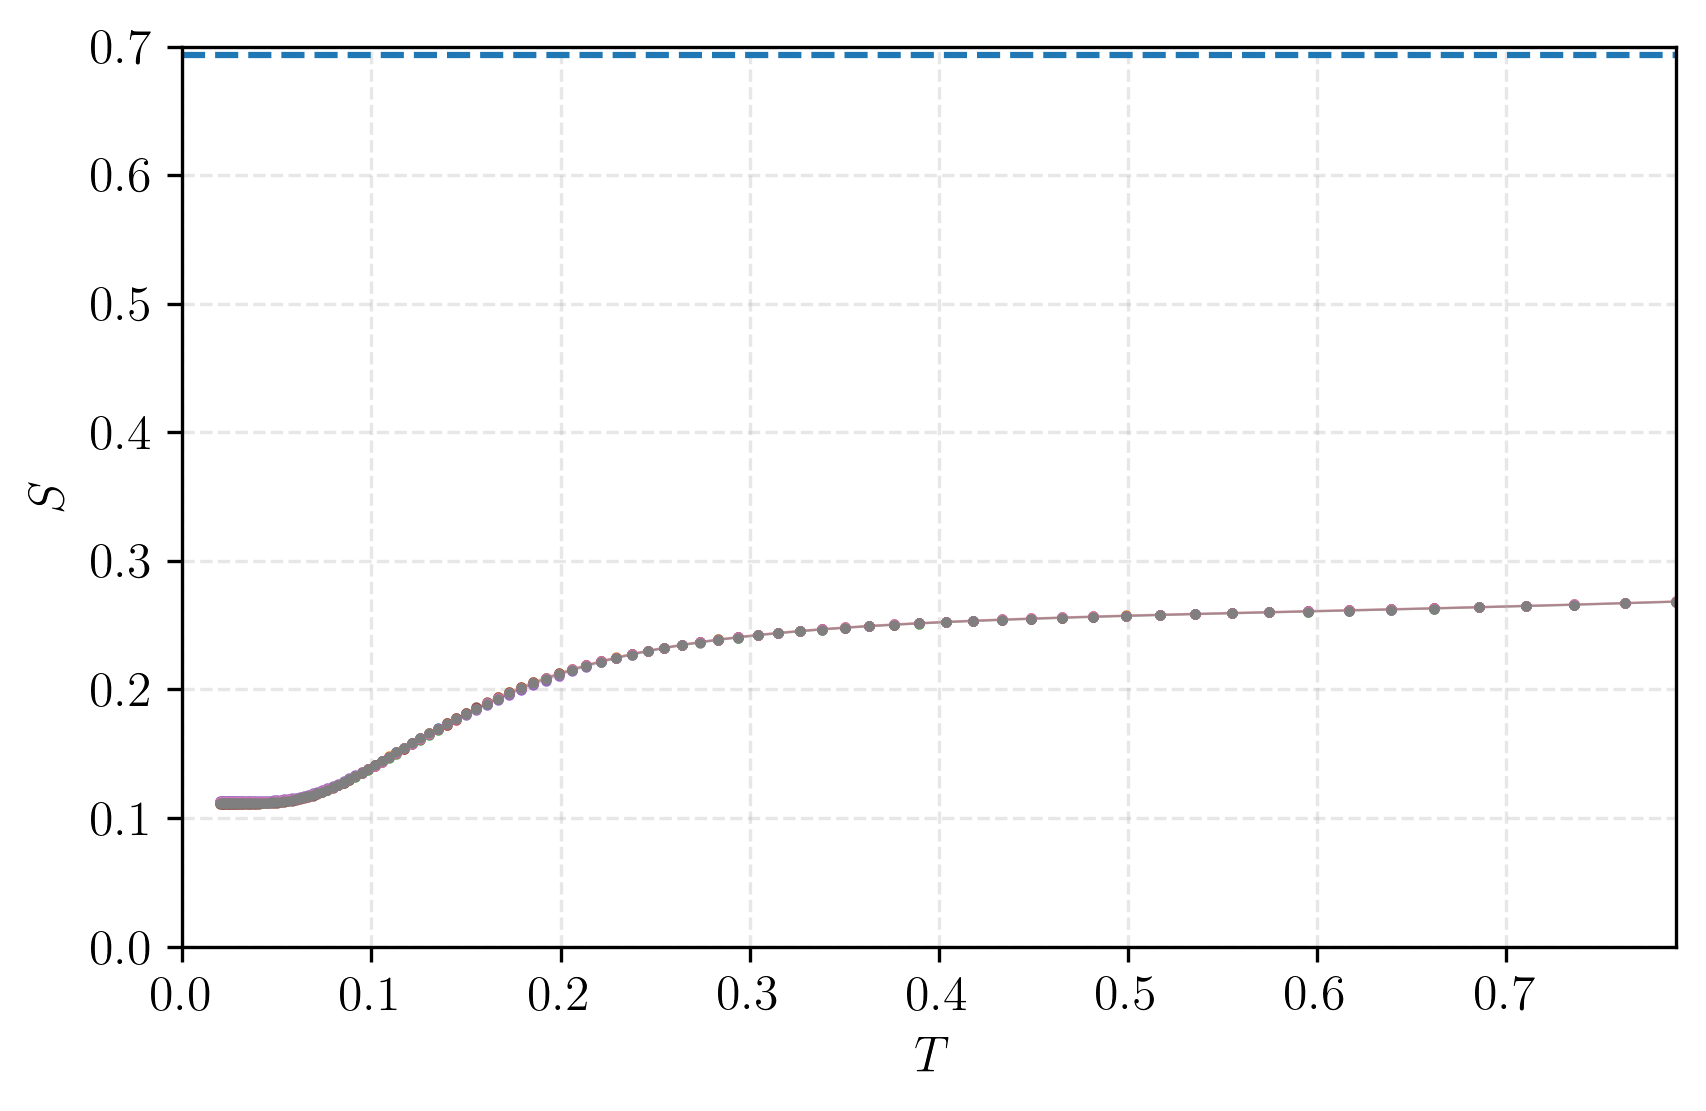

In [37]:
###########################################
        ## STATISTICS ANALYSIS ##
###########################################
#for i in range(n):
#    af.BasicPlotsE(L, i, tidmin, tidmax, temperatures_plots, hfields_plots, foldername,
#                    results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
#                    t_h_varMeanEsq, C, ErrC, J1, J2, J3, J4, **kw)
#
#
if mergeruns:
    nplots = 1
    addsave = "_Merged_"
else:
    nplots = n
    addsave = "_IndependentRuns_"
    
tidmin = 0
tidmax = [105 for i in range(n)]
#tidmax = [len(stat_temps[i]) for i in range(n)]
put_legend = False
af.BulkPlotsE(L, nplots, 0, tidmin, tidmax, temperatures_plots, foldername,
                results_foldername, filenamelist, t_h_MeanE, t_h_MeanEsq, t_h_varMeanE,
                t_h_varMeanEsq,  t_h_VarE, t_h_ErrVarE,C, ErrC, J1, J2, J3, J4,
              t_h_S, t_h_Smin, t_h_Smax, addsave = addsave,
              figsize = (6,4), markersize = 3, ncol = 2, loc = 'upper right',
              put_legend = put_legend)

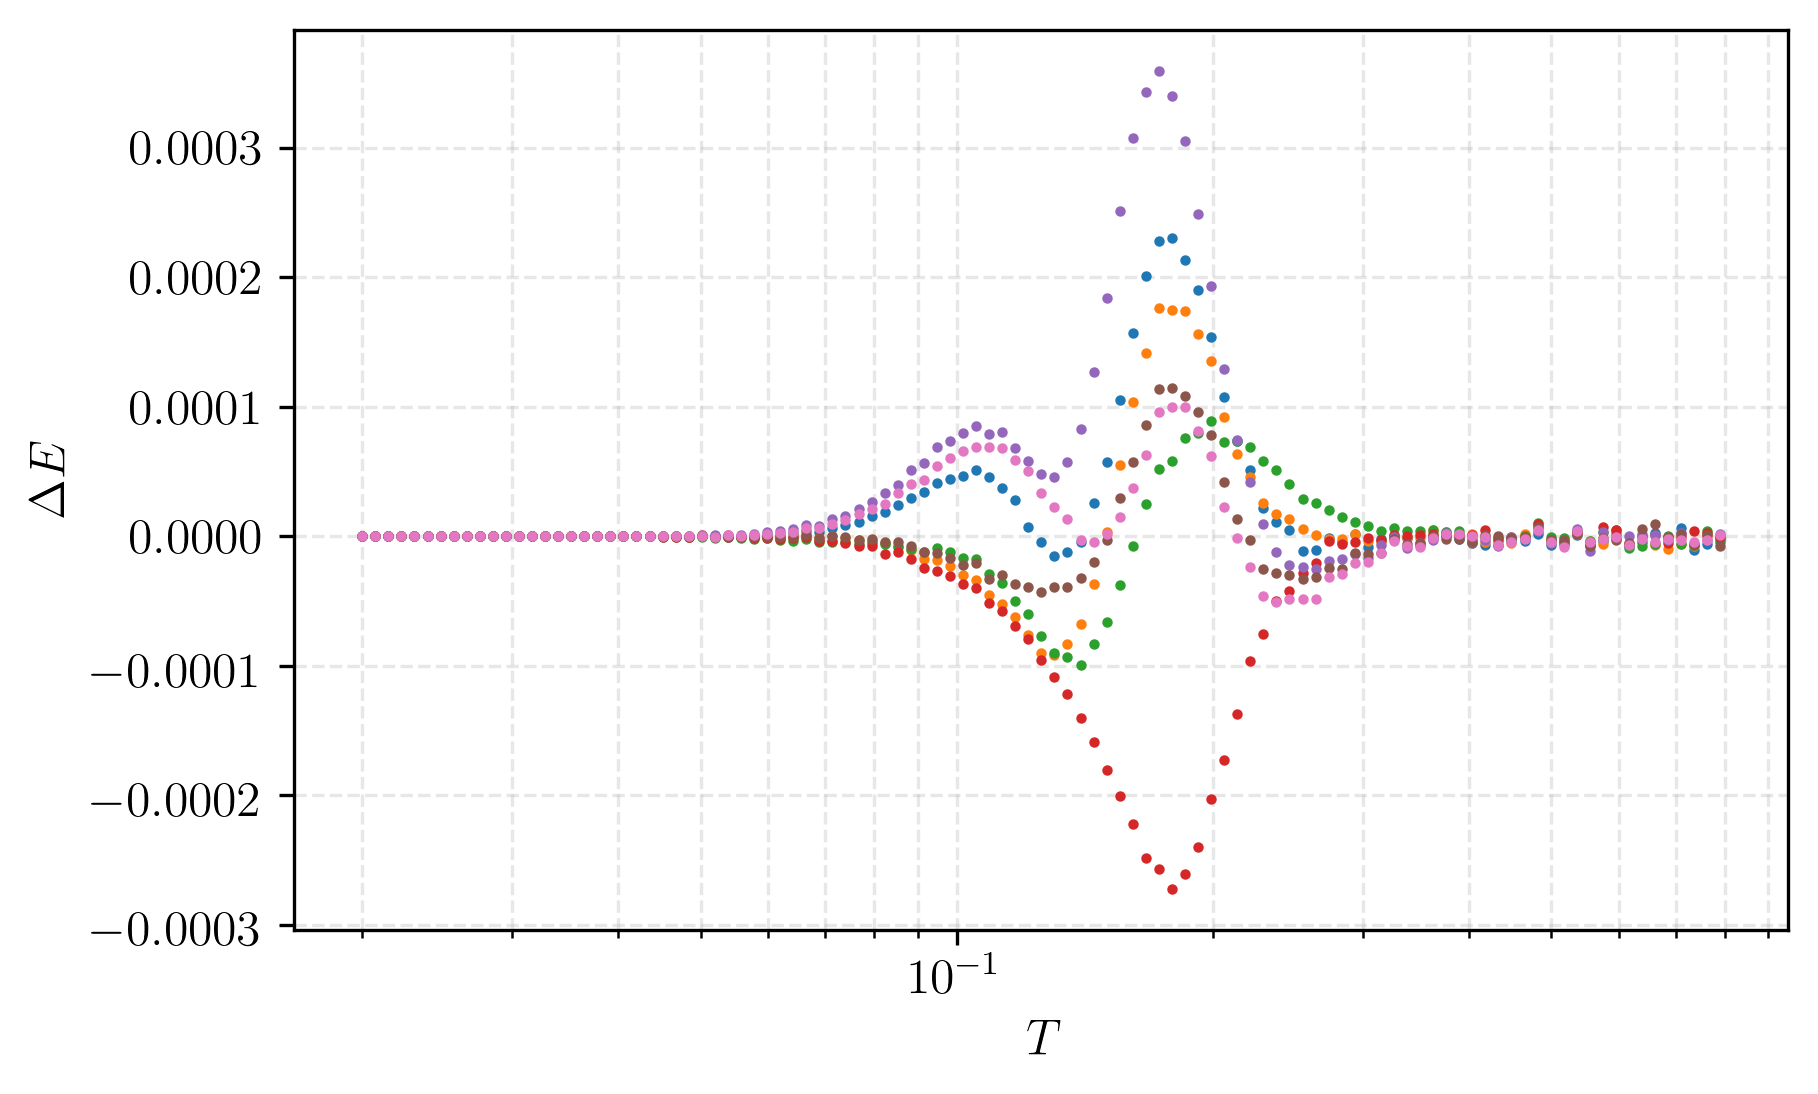

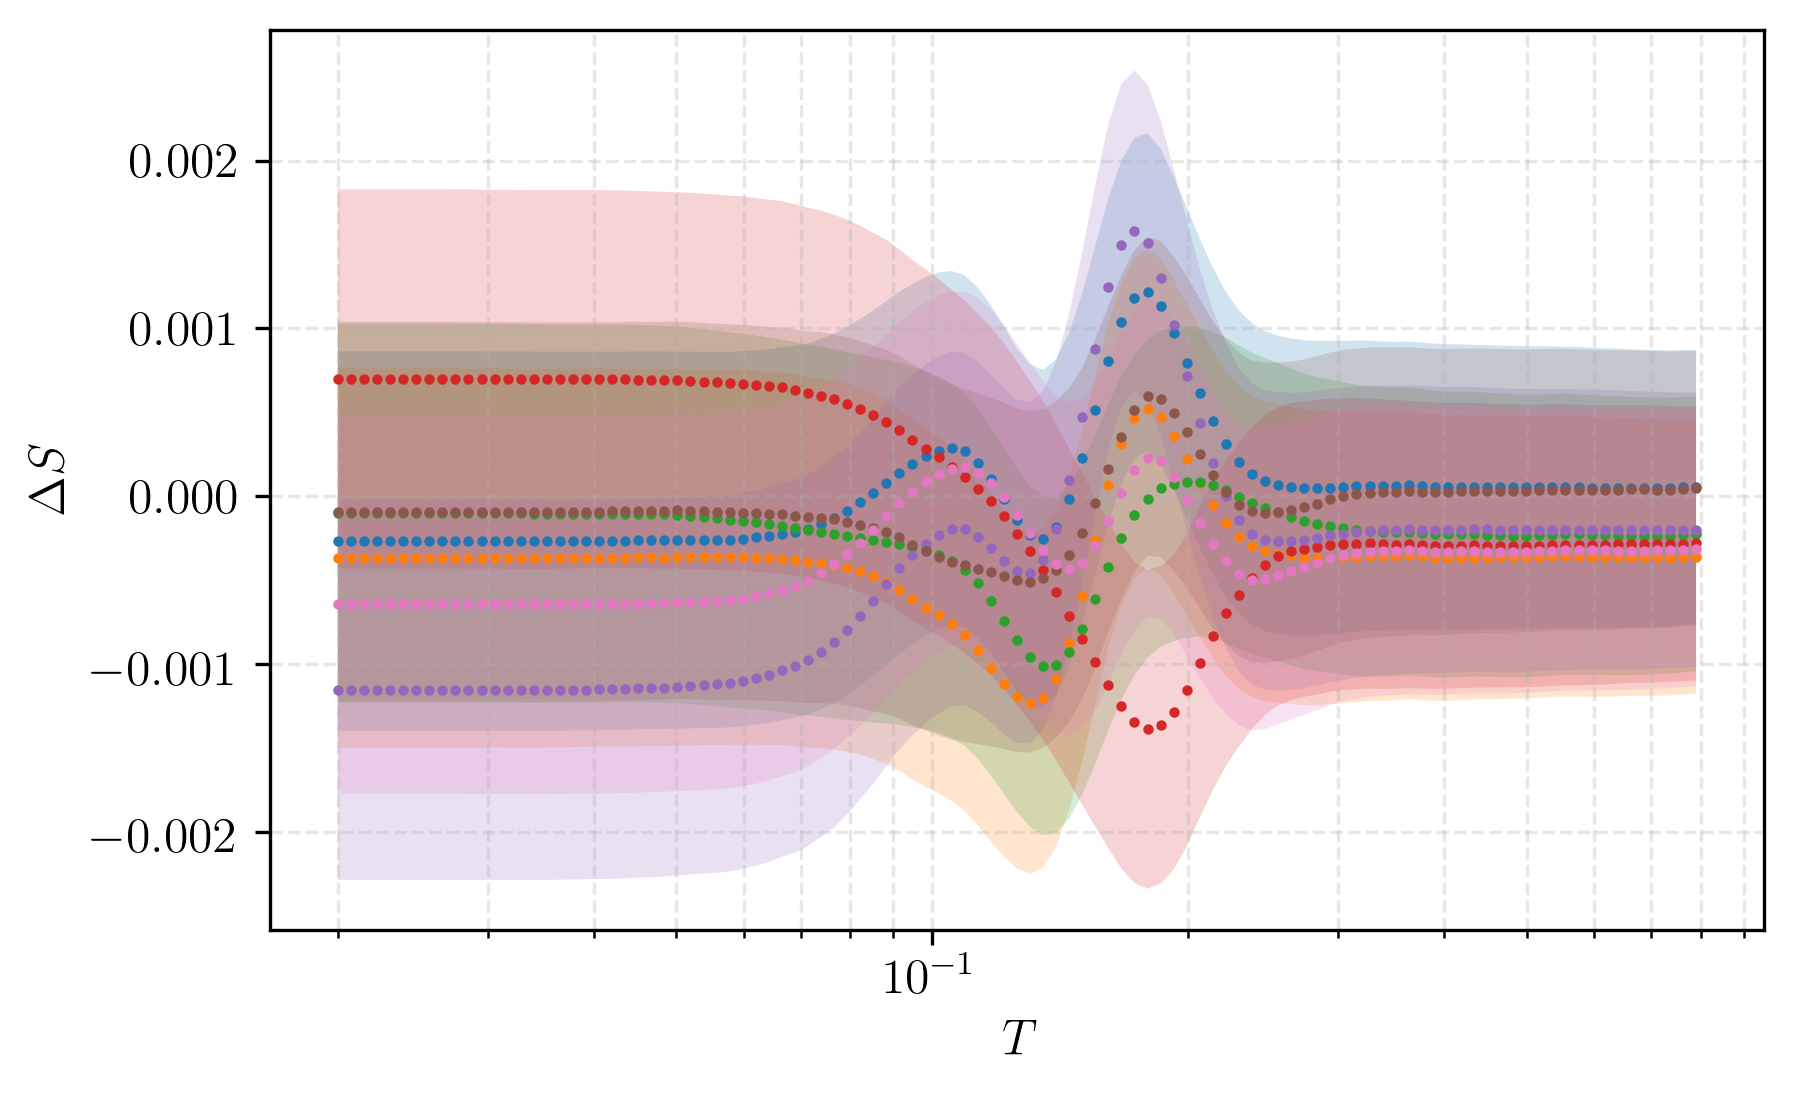

In [33]:
if not mergeruns:
    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_MeanE[i][tidmin:tidmax[i]][:,hid]-t_h_MeanE[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        #plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  - np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),
        #                 (t_h_MeanE[i][tidmin:tidmax[i]][:,hid]
        #                  + np.sqrt(t_h_varMeanE[i][tidmin:tidmax[i]][:,hid])),\
        #                 alpha=alpha)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta E$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorE.png')

    margin = [0.15, 0.15, 0.02, 0.1]
    figsize = (6,4)
    markersize = 3
    ncol = 4
    hid = 0
    plt.figure(figsize=figsize,dpi=300)
    plt.axes(margin[:2] + [1-margin[0]-margin[2], 1-margin[1]-margin[3]])
    for i in range(1,n):
        plt.semilogx(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_S[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],'.', markersize=markersize,\
                          label = r'$it$ = {0}'.format(i))
        plt.fill_between(temperatures_plots[i][tidmin:tidmax[i]],
                         t_h_Smin[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],
                         t_h_Smax[i][tidmin:tidmax[i]][:,hid]-t_h_S[0][tidmin:tidmax[0]][:,hid],\
                         alpha=0.2)
    plt.xlabel(r'$T$')
    plt.ylabel(r'$\Delta S$')
    plt.grid(which = 'both', linestyle = '--', alpha = 0.3)
    if put_legend:
        plt.legend(loc= 'best', ncol = 4, framealpha=0.5)
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.pdf')
    plt.savefig('./' + foldername  + results_foldername+ '/ErrorS.png')

else:
    print("S = %f" % t_h_S[0][0], r"+/-", "%f" % max(abs(t_h_S[0][0]-t_h_Smin[0][0]),abs(t_h_S[0][0]-t_h_Smax[0][0])))

In [30]:
if mergeruns:
    np.savetxt(foldername + results_foldername + "/AvgS.txt", t_h_S[0])
    np.savetxt(foldername + results_foldername + "/AvgSmin.txt", t_h_Smin[0])
    np.savetxt(foldername + results_foldername + "/AvgSmax.txt", t_h_Smax[0])
    np.savetxt(foldername + results_foldername + "/AvgC.txt", C[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])
    np.savetxt(foldername + results_foldername + "/ErrC.txt", ErrC[0])

In [31]:
print(foldername + results_foldername)

../../MFUs/Runs_15-09-20_EasyPhase_L12/Results_21-09-20_nsms524288_nips4/
